In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import (plot_categorical_numerical_relationship,
    plot_categorical_relationship_fin,
    plot_categorical_numerical_relationship,
    plot_grouped_boxplots,
    plot_grouped_histograms,
    grafico_dispersion_con_correlacion, 
    bubble_plot,
    pinta_distribucion_categoricas
)
# importamos las librerias que vamos a usar en el proyecto

In [5]:
# guardamos en 3 variables las estadisticas de las diferentes ligas que vamos a analizar. Utilizamos 
# read_html para poder leer los datos de la página FBREF.com
df_1 = pd.read_html("https://fbref.com/es/comps/12/2020-2021/Estadisticas-2020-2021-La-Liga")
df_2 = pd.read_html("https://fbref.com/es/comps/12/2021-2022/Estadisticas-2021-2022-La-Liga")
df_3 = pd.read_html("https://fbref.com/es/comps/12/2022-2023/Estadisticas-2022-2023-La-Liga")

In [6]:
# guardamos en variables las primeras tablas, que corresponden con los ligas de los años 2021-2122-2223.
df_1_0 = df_1[0]
df_2_0 = df_2[0]
df_3_0 = df_3[0]

In [7]:
# observamos las columnas de la tabla  
df_1_0.columns

Index(['RL', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts',
       'Pts/PJ', 'xG', 'xGA', 'xGD', 'xGD/90', 'Asistencia',
       'Máximo Goleador del Equipo', 'Portero', 'Notas'],
      dtype='object')

In [8]:
df_1_0.head()

RL           Equipo  PJ  PG  PE  PP  GF  GC  DG  Pts  Pts/PJ    xG   xGA  \
0   1  Atlético Madrid  38  26   8   4  67  25  42   86    2.26  52.8  37.1   
1   2      Real Madrid  38  25   9   4  67  28  39   84    2.21  61.5  37.6   
2   3        Barcelona  38  24   7   7  85  38  47   79    2.08  73.5  40.8   
3   4          Sevilla  38  24   5   9  53  33  20   77    2.03  54.4  34.8   
4   5    Real Sociedad  38  17  11  10  59  38  21   62    1.63  60.7  39.2   

    xGD  xGD/90  Asistencia Máximo Goleador del Equipo                Portero  \
0  15.7    0.41         NaN           Luis Suárez - 21              Jan Oblak   
1  23.9    0.63         NaN         Karim Benzema - 23       Thibaut Courtois   
2  32.7    0.86         NaN          Lionel Messi - 30  Marc-André ter Stegen   
3  19.6    0.52         NaN     Youssef En-Nesyri - 18         Yassine Bounou   
4  21.5    0.57         NaN        Alexander Isak - 17            Álex Remiro   

                                     Notas  
0  → Champions League Por el final de liga  
1  → Champions League Por el final de liga  
2  → Champions League Por el final de liga  
3  → Champions League Por el final de liga  
4     → Europa League Por el final de liga

In [9]:
#hacemos una primera selección de columnas que no vamos a utilizar
eliminar_columna = ['PJ', 'PG', 'PE', 'PP', 'DG', 'Pts/PJ', 'xGD', 'xGD/90', 'Asistencia',
       'Máximo Goleador del Equipo', 'Portero', 'Notas']

In [10]:
# eliminamos esas columnas en las tres variables
df_1_0 = df_1_0.drop(eliminar_columna, axis=1)
df_2_0 = df_2_0.drop(eliminar_columna, axis=1)
df_3_0 = df_3_0.drop(eliminar_columna, axis=1)

In [11]:
nuevo_nombre = {'Cádiz': 'Cadiz'}

In [12]:
df_1_0 = df_1_0.replace({'Equipo': nuevo_nombre})

In [13]:
# ordenamos las tablas por equipo, de manera que queda ordenado alfabeticamente.
df_1_01 = df_1_0.sort_values(by="Equipo")
df_1_01

RL           Equipo  GF  GC  Pts    xG   xGA
15  16           Alavés  36  57   38  42.6  49.9
9   10    Athletic Club  46  42   46  43.1  37.7
0    1  Atlético Madrid  67  25   86  52.8  37.1
2    3        Barcelona  85  38   79  73.5  40.8
5    6            Betis  50  50   61  49.1  46.8
11  12            Cadiz  36  58   44  34.7  55.4
7    8       Celta Vigo  55  57   53  50.4  51.0
19  20            Eibar  29  52   30  45.2  45.7
16  17            Elche  34  55   36  29.9  60.9
14  15           Getafe  28  43   38  34.4  40.3
8    9          Granada  47  65   46  41.1  56.2
17  18           Huesca  34  53   34  38.9  48.4
13  14          Levante  46  57   41  40.4  53.4
10  11          Osasuna  37  48   44  38.7  47.8
1    2      Real Madrid  67  28   84  61.5  37.6
4    5    Real Sociedad  59  38   62  60.7  39.2
3    4          Sevilla  53  33   77  54.4  34.8
12  13         Valencia  50  53   43  42.6  52.2
18  19       Valladolid  34  57   31  40.1  52.9
6    7       Villarreal  60  44   58  56.4  42.5

In [14]:
# y le aplicamos un reset al indice para que nos coincida en la concatenación que haremos mas adelante 
df_1_01.reset_index(drop=True, inplace=True)

In [15]:
df_1_01

RL           Equipo  GF  GC  Pts    xG   xGA
0   16           Alavés  36  57   38  42.6  49.9
1   10    Athletic Club  46  42   46  43.1  37.7
2    1  Atlético Madrid  67  25   86  52.8  37.1
3    3        Barcelona  85  38   79  73.5  40.8
4    6            Betis  50  50   61  49.1  46.8
5   12            Cadiz  36  58   44  34.7  55.4
6    8       Celta Vigo  55  57   53  50.4  51.0
7   20            Eibar  29  52   30  45.2  45.7
8   17            Elche  34  55   36  29.9  60.9
9   15           Getafe  28  43   38  34.4  40.3
10   9          Granada  47  65   46  41.1  56.2
11  18           Huesca  34  53   34  38.9  48.4
12  14          Levante  46  57   41  40.4  53.4
13  11          Osasuna  37  48   44  38.7  47.8
14   2      Real Madrid  67  28   84  61.5  37.6
15   5    Real Sociedad  59  38   62  60.7  39.2
16   4          Sevilla  53  33   77  54.4  34.8
17  13         Valencia  50  53   43  42.6  52.2
18  19       Valladolid  34  57   31  40.1  52.9
19   7       Villarreal  60  44   58  56.4  42.5

In [16]:
df_2_0 = df_2_0.replace({'Equipo': nuevo_nombre})

In [17]:
df_2_01 = df_2_0.sort_values(by="Equipo")
df_2_01

RL           Equipo  GF  GC  Pts    xG   xGA
19  20           Alavés  31  65   31  37.3  57.0
7    8    Athletic Club  43  36   55  49.6  38.4
2    3  Atlético Madrid  65  43   71  54.4  33.4
1    2        Barcelona  68  38   73  63.4  34.4
4    5            Betis  62  40   65  53.5  43.4
16  17            Cadiz  35  51   39  39.5  48.3
10  11       Celta Vigo  43  43   46  43.1  45.7
12  13            Elche  40  52   42  33.7  59.1
13  14         Espanyol  40  53   42  36.7  51.2
14  15           Getafe  33  41   39  29.3  38.6
17  18          Granada  44  61   38  39.0  61.2
18  19          Levante  51  76   35  55.1  55.0
15  16         Mallorca  36  63   39  38.8  49.3
9   10          Osasuna  37  51   47  36.7  46.3
11  12   Rayo Vallecano  39  50   42  42.8  48.4
0    1      Real Madrid  80  31   86  71.7  43.9
5    6    Real Sociedad  40  37   62  51.5  38.7
3    4          Sevilla  53  30   70  42.4  36.9
8    9         Valencia  48  53   48  39.0  47.7
6    7       Villarreal  63  37   59  64.2  44.8

In [18]:
df_2_01.reset_index(drop=True, inplace=True)

In [19]:
df_2_01

RL           Equipo  GF  GC  Pts    xG   xGA
0   20           Alavés  31  65   31  37.3  57.0
1    8    Athletic Club  43  36   55  49.6  38.4
2    3  Atlético Madrid  65  43   71  54.4  33.4
3    2        Barcelona  68  38   73  63.4  34.4
4    5            Betis  62  40   65  53.5  43.4
5   17            Cadiz  35  51   39  39.5  48.3
6   11       Celta Vigo  43  43   46  43.1  45.7
7   13            Elche  40  52   42  33.7  59.1
8   14         Espanyol  40  53   42  36.7  51.2
9   15           Getafe  33  41   39  29.3  38.6
10  18          Granada  44  61   38  39.0  61.2
11  19          Levante  51  76   35  55.1  55.0
12  16         Mallorca  36  63   39  38.8  49.3
13  10          Osasuna  37  51   47  36.7  46.3
14  12   Rayo Vallecano  39  50   42  42.8  48.4
15   1      Real Madrid  80  31   86  71.7  43.9
16   6    Real Sociedad  40  37   62  51.5  38.7
17   4          Sevilla  53  30   70  42.4  36.9
18   9         Valencia  48  53   48  39.0  47.7
19   7       Villarreal  63  37   59  64.2  44.8

In [20]:
df_3_0 = df_3_0.replace({'Equipo': nuevo_nombre})

In [21]:
df_3_01 = df_3_0.sort_values(by="Equipo")
df_3_01

RL           Equipo  GF  GC  Pts    xG   xGA
16  17          Almería  49  65   41  45.5  62.5
7    8    Athletic Club  47  43   51  54.2  36.9
2    3  Atlético Madrid  70  33   77  61.9  41.1
0    1        Barcelona  70  20   88  75.5  33.2
5    6            Betis  46  41   60  51.3  50.0
13  14            Cadiz  30  53   42  41.5  61.6
12  13       Celta Vigo  43  53   43  42.6  45.4
19  20            Elche  30  67   25  37.5  70.0
18  19         Espanyol  52  69   37  48.3  59.8
14  15           Getafe  34  45   42  36.7  46.0
9   10           Girona  58  55   49  50.6  54.9
8    9         Mallorca  37  43   50  35.2  46.4
6    7          Osasuna  37  42   53  39.8  45.7
10  11   Rayo Vallecano  45  53   49  43.9  50.3
1    2      Real Madrid  75  36   78  75.5  38.9
3    4    Real Sociedad  51  35   71  52.9  33.0
11  12          Sevilla  47  54   49  46.3  54.2
15  16         Valencia  42  45   42  49.3  43.5
17  18       Valladolid  33  63   40  38.5  65.2
4    5       Villarreal  59  40   64  61.6  49.9

In [22]:
df_3_01.reset_index(drop=True, inplace=True)

In [23]:
df_3_01

RL           Equipo  GF  GC  Pts    xG   xGA
0   17          Almería  49  65   41  45.5  62.5
1    8    Athletic Club  47  43   51  54.2  36.9
2    3  Atlético Madrid  70  33   77  61.9  41.1
3    1        Barcelona  70  20   88  75.5  33.2
4    6            Betis  46  41   60  51.3  50.0
5   14            Cadiz  30  53   42  41.5  61.6
6   13       Celta Vigo  43  53   43  42.6  45.4
7   20            Elche  30  67   25  37.5  70.0
8   19         Espanyol  52  69   37  48.3  59.8
9   15           Getafe  34  45   42  36.7  46.0
10  10           Girona  58  55   49  50.6  54.9
11   9         Mallorca  37  43   50  35.2  46.4
12   7          Osasuna  37  42   53  39.8  45.7
13  11   Rayo Vallecano  45  53   49  43.9  50.3
14   2      Real Madrid  75  36   78  75.5  38.9
15   4    Real Sociedad  51  35   71  52.9  33.0
16  12          Sevilla  47  54   49  46.3  54.2
17  16         Valencia  42  45   42  49.3  43.5
18  18       Valladolid  33  63   40  38.5  65.2
19   5       Villarreal  59  40   64  61.6  49.9

In [24]:
# la siguiente tabla corresponde a estadisticas estandar
df_1_2 = df_1[2]
df_2_2 = df_2[2]
df_3_2 = df_3[2]

In [25]:
df_1_2.head(7)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Equipo                 PL               Edad               Pos.   
0             Alavés                 30               28.7               42.8   
1      Athletic Club                 27               26.6               49.9   
2    Atlético Madrid                 25               27.3               52.3   
3          Barcelona                 25               26.4               65.5   
4              Betis                 25               27.9               53.6   
5              Cádiz                 34               28.8               34.8   
6         Celta Vigo                 30               26.6               53.3   

  Tiempo Jugado                     Rendimiento      ... Por 90 Minutos        \
             PJ Titular   Mín  90 s        Gls. Ass  ...           Gls.   Ast   
0            38     418  3420  38.0          35  21  ...           0.92  0.55   
1            38     418  3420  38.0          43  31  ...           1.13  0.82   
2            38     418  3420  38.0          65  54  ...           1.71  1.42   
3            38     418  3420  38.0          80  51  ...           2.11  1.34   
4            38     418  3420  38.0          50  35  ...           1.32  0.92   
5            38     418  3420  38.0          33  16  ...           0.87  0.42   
6            38     418  3420  38.0          55  39  ...           1.45  1.03   

                                                        
    G+A  G-TP G+A-TP    xG   xAG xG+xAG  npxG npxG+xAG  
0  1.47  0.79   1.34  1.12  0.72   1.84  0.96     1.68  
1  1.95  1.03   1.84  1.13  0.82   1.96  1.03     1.86  
2  3.13  1.58   3.00  1.39  1.07   2.46  1.24     2.31  
3  3.45  2.00   3.34  1.94  1.40   3.33  1.77     3.16  
4  2.24  1.11   2.03  1.29  0.88   2.17  1.07     1.94  
5  1.29  0.76   1.18  0.91  0.54   1.45  0.83     1.37  
6  2.47  1.26   2.29  1.33  0.97   2.29  1.18     2.15  

[7 rows x 32 columns]

In [26]:
# eliminamos el primer nivel, y nos quedamos solamente con los nombres de las columnas
df_1_2.columns = df_1_2.columns.droplevel()
df_2_2.columns = df_2_2.columns.droplevel()
df_3_2.columns = df_3_2.columns.droplevel()

In [27]:
df_1_2.columns

Index(['Equipo', 'PL', 'Edad', 'Pos.', 'PJ', 'Titular', 'Mín', '90 s', 'Gls.',
       'Ass', 'G+A', 'G-TP', 'TP', 'TPint', 'TA', 'TR', 'xG', 'npxG', 'xAG',
       'npxG+xAG', 'PrgC', 'PrgP', 'Gls.', 'Ast', 'G+A', 'G-TP', 'G+A-TP',
       'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [28]:
eliminar = ['Equipo', 'PL', 'Edad', 'PJ', 'Titular', 'Mín', '90 s', 'Gls.',
       'Ass', 'G+A', 'G-TP', 'TP', 'TPint', 'TA', 'TR', 'xG', 'npxG', 'xAG',
       'npxG+xAG', 'PrgC', 'PrgP', 'Gls.', 'Ast', 'G+A', 'G-TP', 'G+A-TP',
       'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG']

In [29]:
df_1_2 = df_1_2.drop(eliminar, axis=1)
df_2_2 = df_2_2.drop(eliminar, axis=1)
df_3_2 = df_3_2.drop(eliminar, axis=1)

In [30]:
df_3_2

Pos.
0   45.1
1   51.6
2   50.6
3   64.3
4   50.6
5   41.9
6   50.2
7   45.5
8   43.1
9   39.9
10  51.3
11  41.1
12  48.0
13  51.2
14  60.9
15  54.6
16  52.6
17  52.0
18  48.7
19  56.9

In [31]:
# esta tabla corresponde con los disparos por equipo
df_1_8 = df_1[8]
df_2_8 = df_2[8]
df_3_8 = df_3[8]

In [32]:
df_1_8

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Estándar       \
               Equipo                 PL               90 s     Gls.  Dis   
0              Alavés                 30               38.0       35  339   
1       Athletic Club                 27               38.0       43  399   
2     Atlético Madrid                 25               38.0       65  452   
3           Barcelona                 25               38.0       80  575   
4               Betis                 25               38.0       50  432   
5               Cádiz                 34               38.0       33  299   
6          Celta Vigo                 30               38.0       55  350   
7               Eibar                 30               38.0       29  443   
8               Elche                 30               38.0       33  265   
9              Getafe                 31               38.0       27  355   
10            Granada                 34               38.0       47  354   
11             Huesca                 27               38.0       32  404   
12            Levante                 29               38.0       45  376   
13            Osasuna                 28               38.0       36  368   
14        Real Madrid                 30               38.0       64  544   
15      Real Sociedad                 30               38.0       58  417   
16            Sevilla                 26               38.0       52  454   
17           Valencia                 30               38.0       48  383   
18         Valladolid                 32               38.0       34  359   
19         Villarreal                 29               38.0       57  392   

                                                                     \
    DaP % de TT   T/90 TalArc/90   G/T G/TalArc  Dist  FK  TP TPint   
0    95    28.0   8.92      2.50  0.09     0.32  17.4  12   5     8   
1   128    32.1  10.50      3.37  0.10     0.30  17.4  15   4     5   
2   178    39.4  11.89      4.68  0.13     0.34  17.6  13   5     7   
3   231    40.2  15.13      6.08  0.13     0.33  17.1  43   4     8   
4   145    33.6  11.37      3.82  0.10     0.29  18.9  16   8    11   
5    97    32.4   7.87      2.55  0.10     0.30  17.6  14   4     4   
6   133    38.0   9.21      3.50  0.14     0.36  17.0  13   7     7   
7   127    28.7  11.66      3.34  0.06     0.20  18.1  14   4     9   
8    86    32.5   6.97      2.26  0.12     0.36  16.8  12   2     3   
9    97    27.3   9.34      2.55  0.07     0.25  18.8  24   3     5   
10  121    34.2   9.32      3.18  0.12     0.36  19.1  21   3     5   
11  130    32.2  10.63      3.42  0.07     0.22  18.0  13   3     4   
12  125    33.2   9.89      3.29  0.11     0.34  18.2  10   3     6   
13  114    31.0   9.68      3.00  0.08     0.27  18.8   7   5     6   
14  167    30.7  14.32      4.39  0.11     0.37  17.7  17   3     3   
15  139    33.3  10.97      3.66  0.12     0.35  16.5  20   9    12   
16  135    29.7  11.95      3.55  0.10     0.34  17.2  15   6     7   
17  129    33.7  10.08      3.39  0.10     0.31  20.1  32   8    10   
18  110    30.6   9.45      2.89  0.08     0.25  18.7  25   7     8   
19  146    37.2  10.32      3.84  0.11     0.31  17.0  13  12    13   

   Expectativa                              
            xG  npxG npxG/Sh  G-xG np:G-xG  
0         42.6  36.4    0.11  -7.6    -6.4  
1         43.1  39.2    0.10  -0.1    -0.2  
2         52.8  47.2    0.11  12.2    12.8  
3         73.5  67.1    0.12   6.5     8.9  
4         49.1  40.5    0.10   0.9     1.5  
5         34.7  31.6    0.11  -1.7    -2.6  
6         50.4  44.9    0.13   4.6     3.1  
7         45.2  38.3    0.09 -16.2   -13.3  
8         29.9  27.5    0.11   3.1     3.5  
9         34.4  30.5    0.09  -7.4    -6.5  
10        41.1  37.3    0.11   5.9     6.7  
11        38.9  36.1    0.09  -6.9    -7.1  
12        40.4  35.7    0.10   4.6     6.3  
13        38.7  34.7    0.10  -2.7    -3.7  
14        61.5  59.2    0

In [33]:
df_1_8.columns = df_1_8.columns.droplevel()
df_2_8.columns = df_2_8.columns.droplevel()
df_3_8.columns = df_3_8.columns.droplevel()

In [34]:
df_1_8.columns

Index(['Equipo', 'PL', '90 s', 'Gls.', 'Dis', 'DaP', '% de TT', 'T/90',
       'TalArc/90', 'G/T', 'G/TalArc', 'Dist', 'FK', 'TP', 'TPint', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'],
      dtype='object')

In [35]:
eliminar_columna = ['Equipo', 'PL', '90 s', 'Gls.', 'Dis', '% de TT', 'T/90',
       'TalArc/90', 'G/T', 'G/TalArc', 'Dist', 'FK', 'TP', 'TPint', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']

In [36]:
df_1_8 = df_1_8.drop(eliminar_columna, axis=1)
df_2_8 = df_2_8.drop(eliminar_columna, axis=1)
df_3_8 = df_3_8.drop(eliminar_columna, axis=1)

In [37]:
df_1_8

DaP
0    95
1   128
2   178
3   231
4   145
5    97
6   133
7   127
8    86
9    97
10  121
11  130
12  125
13  114
14  167
15  139
16  135
17  129
18  110
19  146

In [38]:
#en esta tabla podemos ver los pases del equipo
df_1_10 = df_1[10]
df_2_10 = df_2[10]
df_3_10 = df_3[10]

In [39]:
df_1_10

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  Total         \
               Equipo                 PL               90 s    Cmp   Int.   
0              Alavés                 30               38.0  10216  14388   
1       Athletic Club                 27               38.0  13578  17842   
2     Atlético Madrid                 25               38.0  16757  20680   
3           Barcelona                 25               38.0  25192  28488   
4               Betis                 25               38.0  15814  19679   
5               Cádiz                 34               38.0   7949  12067   
6          Celta Vigo                 30               38.0  15176  19318   
7               Eibar                 30               38.0  11810  16890   
8               Elche                 30               38.0  13481  17054   
9              Getafe                 31               38.0   8977  13863   
10            Granada                 34               38.0   9083  13336   
11             Huesca                 27               38.0  13507  17480   
12            Levante                 29               38.0  14190  18116   
13            Osasuna                 28               38.0  10233  15031   
14        Real Madrid                 30               38.0  20652  24119   
15      Real Sociedad                 30               38.0  14915  18995   
16            Sevilla                 26               38.0  19248  22873   
17           Valencia                 30               38.0  12755  16480   
18         Valladolid                 32               38.0  11145  15385   
19         Villarreal                 29               38.0  17508  21129   

                               Cortos         ... Largos Unnamed: 17_level_0  \
   % Cmp Dist. tot. Dist. prg.    Cmp   Int.  ...  % Cmp                 Ass   
0   71.0     196775      86618   4463   5484  ...   50.7                  21   
1   76.1     251137      91456   5873   6901  ...   57.4                  31   
2   81.0     276506      95008   8278   9219  ...   57.6                  54   
3   88.4     384110     119170  13304  14257  ...   69.9                  51   
4   80.4     273398      94327   7403   8309  ...   55.7                  35   
5   65.9     158876      72248   3244   4091  ...   44.1                  16   
6   78.6     263065      91357   6912   7946  ...   53.3                  39   
7   69.9     234607      92605   4840   5844  ...   49.7                  20   
8   79.0     244074      94227   6028   6753  ...   55.1                  25   
9   64.8     170990      76315   4043   5155  ...   44.0                  14   
10  68.1     173761      74249   3915   4776  ...   43.6                  30   
11  77.3     250921      87949   5692   6487  ...   52.5                  23   
12  78.3     257005      95976   6356   7202  ...   55.1                  35   
13  68.1     201352      91555   4401   5541  ...   49.5                  25   
14  85.6     352965     111437   9790  10620  ...   68.7                  53   
15  78.5     264692      91984   6592   7589  ...   55.7                  39   
16  84.2     342985     106478   8654   9471  ...   63.6                  36   
17  77.4     241622      89245   5332   6142  ...   56.5                  35   
18  72.4     206105      80260   4972   5863  ...   46.7                  21   
19  82.9     305401     104843   8074   8963  ...   62.6                  33   

   Unnamed: 18_level_0 Expectativa       Unnamed: 21_level_0  \
                   xAG          xA A-xAG                  PC   
0                 27.4        21.0  -6.4                 256   
1                 31.3        27.9  -0.3                 303   
2                 40.6        38.8  13.4                 347   
3                 53.2        63.6  -2.2                 452   
4                 33.4        30.5   1.6                 334   
5                 20.4        16.9  -4.4                 196   
6                 36.7        32.0 

In [40]:
df_1_10.columns = df_1_10.columns.droplevel()
df_2_10.columns = df_2_10.columns.droplevel()
df_3_10.columns = df_3_10.columns.droplevel()

In [41]:
# aqui estamos eliminando los valores duplicados, quedandonos solamente con la primera columna, que corresponde con 
# los pases totales. En mayor profundidad se podrá analizar mas adelante tambien, los pases largos, medios y cortos.
df_1_10 = df_1_10.loc[:, ~df_1_10.columns.duplicated()]

In [42]:
df_2_10 = df_2_10.loc[:, ~df_2_10.columns.duplicated()]

In [43]:
df_3_10 = df_3_10.loc[:, ~df_3_10.columns.duplicated()]

In [44]:
df_1_10

Equipo  PL  90 s    Cmp   Int.  % Cmp  Dist. tot.  Dist. prg.  \
0            Alavés  30  38.0  10216  14388   71.0      196775       86618   
1     Athletic Club  27  38.0  13578  17842   76.1      251137       91456   
2   Atlético Madrid  25  38.0  16757  20680   81.0      276506       95008   
3         Barcelona  25  38.0  25192  28488   88.4      384110      119170   
4             Betis  25  38.0  15814  19679   80.4      273398       94327   
5             Cádiz  34  38.0   7949  12067   65.9      158876       72248   
6        Celta Vigo  30  38.0  15176  19318   78.6      263065       91357   
7             Eibar  30  38.0  11810  16890   69.9      234607       92605   
8             Elche  30  38.0  13481  17054   79.0      244074       94227   
9            Getafe  31  38.0   8977  13863   64.8      170990       76315   
10          Granada  34  38.0   9083  13336   68.1      173761       74249   
11           Huesca  27  38.0  13507  17480   77.3      250921       87949   
12          Levante  29  38.0  14190  18116   78.3      257005       95976   
13          Osasuna  28  38.0  10233  15031   68.1      201352       91555   
14      Real Madrid  30  38.0  20652  24119   85.6      352965      111437   
15    Real Sociedad  30  38.0  14915  18995   78.5      264692       91984   
16          Sevilla  26  38.0  19248  22873   84.2      342985      106478   
17         Valencia  30  38.0  12755  16480   77.4      241622       89245   
18       Valladolid  32  38.0  11145  15385   72.4      206105       80260   
19       Villarreal  29  38.0  17508  21129   82.9      305401      104843   

    Ass   xAG    xA  A-xAG   PC   1/3  PPA  CrAP  PrgP  
0    21  27.4  21.0   -6.4  256   789  189    82   938  
1    31  31.3  27.9   -0.3  303  1054  284    79  1496  
2    54  40.6  38.8   13.4  347  1144  370    53  1604  
3    51  53.2  63.6   -2.2  452  1874  517    52  2157  
4    35  33.4  30.5    1.6  334  1048  298    80  1441  
5    16  20.4  16.9   -4.4  196   653  152    73   854  
6    39  36.7  32.0    2.3  267   978  248    48  1308  
7    20  29.9  28.5   -9.9  309  1119  254   118  1295  
8    25  21.8  19.8    3.2  190   784  148    79   927  
9    14  23.6  24.0   -9.6  261   863  225   102  1090  
10   30  26.8  22.6    3.2  224   813  173    58   975  
11   23  26.7  25.3   -3.7  295   898  221   113  1185  
12   35  29.6  30.0    5.4  286  1087  306    83  1537  
13   25  24.9  27.9    0.1  259   968  261   101  1220  
14   53  47.4  48.8    5.6  438  1525  401    77  1920  
15   39  39.6  39.7   -0.6  308  1100  343    64  1554  
16   36  41.0  40.1   -5.0  387  1234  346   122  1627  
17   35  27.3  24.8    7.7  283   926  239    62  1180  
18   21  24.2  25.7   -3.2  263   873  213    90  1101  
19   33  40.5  40.7   -7.5  317  1175  358    81  1628

In [45]:
df_1_10.columns

Index(['Equipo', 'PL', '90 s', 'Cmp', 'Int.', '% Cmp', 'Dist. tot.',
       'Dist. prg.', 'Ass', 'xAG', 'xA', 'A-xAG', 'PC', '1/3', 'PPA', 'CrAP',
       'PrgP'],
      dtype='object')

In [46]:
eliminar_c = ['Equipo', 'PL', '90 s', 'Cmp', 'Int.', 'Dist. tot.',
       'Dist. prg.', 'Ass', 'xAG', 'xA', 'A-xAG', 'PC', 'CrAP',
       'PrgP']

In [47]:
df_1_10 = df_1_10.drop(eliminar_c, axis=1)
df_2_10 = df_2_10.drop(eliminar_c, axis=1)
df_3_10 = df_3_10.drop(eliminar_c, axis=1)

In [48]:
df_1_10.head(8)

% Cmp   1/3  PPA
0   71.0   789  189
1   76.1  1054  284
2   81.0  1144  370
3   88.4  1874  517
4   80.4  1048  298
5   65.9   653  152
6   78.6   978  248
7   69.9  1119  254

In [49]:
# modificamos el nombre de esta columna porque mas adelante tendremos otra con el mismo nombre que tambien vamos a usar
df_1_10 = df_1_10.rename(columns={'1/3': 'pase'})
df_2_10 = df_2_10.rename(columns={'1/3': 'pase'})
df_3_10 = df_3_10.rename(columns={'1/3': 'pase'})

In [50]:
df_2_10

% Cmp  pase  PPA
0    68.3   835  199
1    74.9  1056  306
2    78.9   989  325
3    85.9  1698  390
4    80.8  1136  294
5    70.3   829  233
6    77.7  1105  285
7    76.9   861  204
8    79.0   993  212
9    70.4   808  166
10   71.1   840  205
11   76.6   968  254
12   73.5   806  235
13   72.0  1099  298
14   75.3  1012  267
15   87.2  1694  455
16   79.8  1067  315
17   82.4  1207  305
18   69.9   900  256
19   81.8  1278  349

In [51]:
# creacion de goles y tiros del equipo
df_1_12 = df_1[14]
df_2_12 = df_2[14]
df_3_12 = df_3[14]

In [52]:
df_1_12

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0   ACT         \
               Equipo                 PL               90 s   ACT  SCA90   
0              Alavés                 30               38.0   595  15.66   
1       Athletic Club                 27               38.0   723  19.03   
2     Atlético Madrid                 25               38.0   796  20.95   
3           Barcelona                 25               38.0  1064  28.00   
4               Betis                 25               38.0   799  21.03   
5               Cádiz                 34               38.0   517  13.61   
6          Celta Vigo                 30               38.0   624  16.42   
7               Eibar                 30               38.0   758  19.95   
8               Elche                 30               38.0   460  12.11   
9              Getafe                 31               38.0   618  16.26   
10            Granada                 34               38.0   592  15.58   
11             Huesca                 27               38.0   719  18.92   
12            Levante                 29               38.0   671  17.66   
13            Osasuna                 28               38.0   615  16.18   
14        Real Madrid                 30               38.0   981  25.82   
15      Real Sociedad                 30               38.0   749  19.71   
16            Sevilla                 26               38.0   830  21.84   
17           Valencia                 30               38.0   687  18.08   
18         Valladolid                 32               38.0   652  17.16   
19         Villarreal                 29               38.0   742  19.53   

   Tipos de SCA                             ACG       Tipos de GCA           \
       PassLive PassDead HASTA Dis  FR Def  ACG GCA90     PassLive PassDead   
0           375       98    24  35  50  13   59  1.55           28       10   
1           539       66    37  25  43  13   73  1.92           52        5   
2           585       71    55  42  35   8  120  3.16           90        7   
3           833       50    76  34  61  10  136  3.58          105        2   
4           578       74    59  39  36  13   91  2.39           58       12   
5           330       65    38  27  42  15   53  1.39           37        2   
6           460       51    31  36  38   8   98  2.58           69        6   
7           503       88    49  52  51  15   48  1.26           30        3   
8           318       60    22  25  30   5   54  1.42           35        8   
9           413       70    37  37  52   9   38  1.00           22        0   
10          387       66    37  43  50   9   69  1.82           45        4   
11          517       71    44  34  43  10   56  1.47           41        6   
12          519       48    36  25  29  14   80  2.11           60        4   
13          441       70    31  35  30   8   61  1.61           45        4   
14          745       79    55  51  41  10  114  3.00           89        6   
15          532       76    35  45  48  13  100  2.63           72        9   
16          635       61    55  36  35   8   87  2.29           65        4   
17          482       58    47  34  59   7   86  2.26           58       10   
18          471       50    33  31  55  12   56  1.47           36        2   
19          576       46    49  27  37   7   99  2.61           69        3   

                      
   HASTA Dis  FR Def  
0      3   5   9   4  
1      3   5   7   1  
2     12   3   7   1  
3     12   9   7   1  
4      6   5   9   1  
5      3   6   4   1  
6      5   6  10   2  
7      6   4   2   3  
8      3   4   3   1  
9      6   6   4   0  
10     5   9   4   2  
11     2   4   1   2  
12     5   4   3   4  
13     0   6   3   3  
14     8   5   4   2  
15     2   9   8   0  
16     8   6   4   0  
17     5   5   8   0  
18     3   5   9   1  
19    12   7   7   1

In [53]:
df_1_12.columns = df_1_12.columns.droplevel()
df_2_12.columns = df_2_12.columns.droplevel()
df_3_12.columns = df_3_12.columns.droplevel()

In [54]:
df_1_12.columns

Index(['Equipo', 'PL', '90 s', 'ACT', 'SCA90', 'PassLive', 'PassDead', 'HASTA',
       'Dis', 'FR', 'Def', 'ACG', 'GCA90', 'PassLive', 'PassDead', 'HASTA',
       'Dis', 'FR', 'Def'],
      dtype='object')

In [55]:
eliminar_co = ['Equipo', 'PL', '90 s', 'ACT', 'SCA90', 'PassLive', 'PassDead', 'HASTA',
       'Dis', 'FR', 'Def', 'GCA90', 'PassLive', 'PassDead', 'HASTA',
       'Dis', 'FR', 'Def']

In [56]:
df_1_12 = df_1_12.drop(eliminar_co, axis=1)
df_2_12 = df_2_12.drop(eliminar_co, axis=1)
df_3_12 = df_3_12.drop(eliminar_co, axis=1)

In [57]:
df_1_12.head(8)

ACG
0   59
1   73
2  120
3  136
4   91
5   53
6   98
7   48

In [58]:
# posesión de el equipo
df_1_18 = df_1[18]
df_2_18 = df_2[18]
df_3_18 = df_3[18]

In [59]:
df_1_18.columns = df_1_18.columns.droplevel()
df_2_18.columns = df_2_18.columns.droplevel()
df_3_18.columns = df_3_18.columns.droplevel()

In [60]:
df_1_18.columns

Index(['Equipo', 'PL', 'Pos.', '90 s', 'Toques', 'Def. pen.', '3.º def.',
       '3.º cent.', '3.º ataq.', 'Ataq. pen.', 'Balón vivo', 'Att', 'Succ',
       'Exitosa%', 'Tkld', 'Tkld%', 'Transportes', 'Dist. tot.', 'Dist. prg.',
       'PrgC', '1/3', 'TAP', 'Errores de control', 'Des', 'Rec', 'PrgR'],
      dtype='object')

In [61]:
columnas_eli = ['Equipo', 'PL', 'Pos.', '90 s', 'Toques', 'Def. pen.', '3.º def.',
       '3.º cent.', '3.º ataq.', 'Ataq. pen.', 'Balón vivo', 'Att', 'Succ',
       'Exitosa%', 'Tkld', 'Tkld%', 'Transportes', 'Dist. tot.', 'Dist. prg.',
       'PrgC', 'Errores de control', 'Des', 'Rec', 'PrgR']

In [62]:
df_1_18 = df_1_18.drop(columnas_eli, axis=1)
df_2_18 = df_2_18.drop(columnas_eli, axis=1)
df_3_18 = df_3_18.drop(columnas_eli, axis=1)

In [63]:
df_1_18.head(8)

1/3  TAP
0  315  104
1  510  147
2  483  190
3  930  276
4  547  172
5  358   79
6  431  109
7  374  102

In [64]:
df_liga20 = pd.concat([df_1_01, df_1_2, df_1_8, df_1_10, df_1_12, df_1_18], axis=1)

In [65]:
# Aquí ya podemos ver los DataFrame de la liga casi terminados

In [66]:
df_liga20

RL           Equipo  GF  GC  Pts    xG   xGA  Pos.  DaP  % Cmp  pase  PPA  \
0   16           Alavés  36  57   38  42.6  49.9  42.8   95   71.0   789  189   
1   10    Athletic Club  46  42   46  43.1  37.7  49.9  128   76.1  1054  284   
2    1  Atlético Madrid  67  25   86  52.8  37.1  52.3  178   81.0  1144  370   
3    3        Barcelona  85  38   79  73.5  40.8  65.5  231   88.4  1874  517   
4    6            Betis  50  50   61  49.1  46.8  53.6  145   80.4  1048  298   
5   12            Cadiz  36  58   44  34.7  55.4  34.8   97   65.9   653  152   
6    8       Celta Vigo  55  57   53  50.4  51.0  53.3  133   78.6   978  248   
7   20            Eibar  29  52   30  45.2  45.7  49.3  127   69.9  1119  254   
8   17            Elche  34  55   36  29.9  60.9  47.5   86   79.0   784  148   
9   15           Getafe  28  43   38  34.4  40.3  43.3   97   64.8   863  225   
10   9          Granada  47  65   46  41.1  56.2  41.4  121   68.1   813  173   
11  18           Huesca  34  53   34  38.9  48.4  48.3  130   77.3   898  221   
12  14          Levante  46  57   41  40.4  53.4  52.2  125   78.3  1087  306   
13  11          Osasuna  37  48   44  38.7  47.8  43.2  114   68.1   968  261   
14   2      Real Madrid  67  28   84  61.5  37.6  59.3  167   85.6  1525  401   
15   5    Real Sociedad  59  38   62  60.7  39.2  54.9  139   78.5  1100  343   
16   4          Sevilla  53  33   77  54.4  34.8  60.9  135   84.2  1234  346   
17  13         Valencia  50  53   43  42.6  52.2  46.9  129   77.4   926  239   
18  19       Valladolid  34  57   31  40.1  52.9  45.2  110   72.4   873  213   
19   7       Villarreal  60  44   58  56.4  42.5  55.2  146   82.9  1175  358   

    ACG  1/3  TAP  
0    59  315  104  
1    73  510  147  
2   120  483  190  
3   136  930  276  
4    91  547  172  
5    53  358   79  
6    98  431  109  
7    48  374  102  
8    54  366   73  
9    38  390  116  
10   69  288  105  
11   56  452  113  
12   80  446  136  
13   61  315   64  
14  114  739  242  
15  100  492  125  
16   87  552  151  
17   86  468  102  
18   56  423  112  
19   99  558  185

In [67]:
df_liga21 = pd.concat([df_2_01, df_2_2, df_2_8, df_2_10, df_2_12, df_2_18], axis=1)

In [68]:
df_liga21

RL           Equipo  GF  GC  Pts    xG   xGA  Pos.  DaP  % Cmp  pase  PPA  \
0   20           Alavés  31  65   31  37.3  57.0  42.0  111   68.3   835  199   
1    8    Athletic Club  43  36   55  49.6  38.4  48.1  150   74.9  1056  306   
2    3  Atlético Madrid  65  43   71  54.4  33.4  50.6  152   78.9   989  325   
3    2        Barcelona  68  38   73  63.4  34.4  64.2  177   85.9  1698  390   
4    5            Betis  62  40   65  53.5  43.4  53.7  182   80.8  1136  294   
5   17            Cadiz  35  51   39  39.5  48.3  41.3  118   70.3   829  233   
6   11       Celta Vigo  43  43   46  43.1  45.7  55.2  135   77.7  1105  285   
7   13            Elche  40  52   42  33.7  59.1  48.4  106   76.9   861  204   
8   14         Espanyol  40  53   42  36.7  51.2  46.9  128   79.0   993  212   
9   15           Getafe  33  41   39  29.3  38.6  41.5  111   70.4   808  166   
10  18          Granada  44  61   38  39.0  61.2  44.7  131   71.1   840  205   
11  19          Levante  51  76   35  55.1  55.0  47.2  146   76.6   968  254   
12  16         Mallorca  36  63   39  38.8  49.3  45.3  131   73.5   806  235   
13  10          Osasuna  37  51   47  36.7  46.3  46.9  114   72.0  1099  298   
14  12   Rayo Vallecano  39  50   42  42.8  48.4  49.9  133   75.3  1012  267   
15   1      Real Madrid  80  31   86  71.7  43.9  59.9  243   87.2  1694  455   
16   6    Real Sociedad  40  37   62  51.5  38.7  54.3  143   79.8  1067  315   
17   4          Sevilla  53  30   70  42.4  36.9  59.4  139   82.4  1207  305   
18   9         Valencia  48  53   48  39.0  47.7  43.6  129   69.9   900  256   
19   7       Villarreal  63  37   59  64.2  44.8  56.8  164   81.8  1278  349   

    ACG  1/3  TAP  
0    48  310  102  
1    72  461  146  
2   111  531  164  
3   123  704  280  
4    94  482  187  
5    55  382  106  
6    70  544  125  
7    68  403   89  
8    67  468  119  
9    53  328   92  
10   68  354   96  
11   79  405  154  
12   59  449  112  
13   62  358   76  
14   63  497  151  
15  139  757  330  
16   69  546  178  
17   95  517  139  
18   83  449  109  
19  112  483  240

In [69]:
df_liga22 = pd.concat([df_3_01, df_3_2, df_3_8, df_3_10, df_3_12, df_3_18], axis=1)

In [70]:
df_liga22

RL           Equipo  GF  GC  Pts    xG   xGA  Pos.  DaP  % Cmp  pase  PPA  \
0   17          Almería  49  65   41  45.5  62.5  45.1  155   76.6   846  218   
1    8    Athletic Club  47  43   51  54.2  36.9  51.6  157   77.5  1385  341   
2    3  Atlético Madrid  70  33   77  61.9  41.1  50.6  195   82.1  1200  335   
3    1        Barcelona  70  20   88  75.5  33.2  64.3  187   86.1  1859  481   
4    6            Betis  46  41   60  51.3  50.0  50.6  138   80.4   988  270   
5   14            Cadiz  30  53   42  41.5  61.6  41.9  108   71.2   830  192   
6   13       Celta Vigo  43  53   43  42.6  45.4  50.2  160   79.5  1143  274   
7   20            Elche  30  67   25  37.5  70.0  45.5  124   76.5   941  211   
8   19         Espanyol  52  69   37  48.3  59.8  43.1  151   73.7   906  233   
9   15           Getafe  34  45   42  36.7  46.0  39.9  116   68.6   844  214   
10  10           Girona  58  55   49  50.6  54.9  51.3  160   81.4  1086  265   
11   9         Mallorca  37  43   50  35.2  46.4  41.1  107   73.3   815  182   
12   7          Osasuna  37  42   53  39.8  45.7  48.0  133   75.6  1140  271   
13  11   Rayo Vallecano  45  53   49  43.9  50.3  51.2  146   76.4  1247  269   
14   2      Real Madrid  75  36   78  75.5  38.9  60.9  206   88.3  1880  384   
15   4    Real Sociedad  51  35   71  52.9  33.0  54.6  173   80.1  1145  290   
16  12          Sevilla  47  54   49  46.3  54.2  52.6  141   80.1  1230  302   
17  16         Valencia  42  45   42  49.3  43.5  52.0  141   77.7  1155  302   
18  18       Valladolid  33  63   40  38.5  65.2  48.7  137   76.9   969  223   
19   5       Villarreal  59  40   64  61.6  49.9  56.9  188   83.7  1304  349   

    ACG  1/3  TAP  
0    76  432  131  
1    78  587  217  
2   116  473  200  
3   125  784  279  
4    69  492  156  
5    49  350   89  
6    70  558  161  
7    54  408  107  
8    84  385  111  
9    51  292   78  
10  102  497  167  
11   63  341   94  
12   69  416  128  
13   69  547  131  
14  134  735  338  
15   82  499  187  
16   82  520  122  
17   62  630  166  
18   59  451  147  
19   89  570  239

In [71]:
# creamos una nueva columna (PV), Posesion Value (Valor de la posesion), este parámetro lo sacamos de las veces que el balón
# llega a 3/4 de campo rival, ya sea con un pase o en progresión, y las veces que el balón entra al área rival, ya sea con
# un pase o una progresión. Multiplicamos los pases o progresiones al último tercio de campo por 0.007 y los pases y 
# progresiones al área rival por 0.077. 
# Esta columna junto a la de la posesión regular serán las bases de nuestro EDA, y trataré de apoyar esos datos con las 
# diferentes columnas que mantenemos en el dataset como pueden ser % de pases acertados, goles, goles esperados, puntos, etc...

df_liga20['PV'] = df_liga20['pase']*(0.007) + df_liga20['PPA']*(0.077) + df_liga20['1/3']*(0.007) + df_liga20['TAP']*(0.077)

In [72]:
df_liga20

RL           Equipo  GF  GC  Pts    xG   xGA  Pos.  DaP  % Cmp  pase  PPA  \
0   16           Alavés  36  57   38  42.6  49.9  42.8   95   71.0   789  189   
1   10    Athletic Club  46  42   46  43.1  37.7  49.9  128   76.1  1054  284   
2    1  Atlético Madrid  67  25   86  52.8  37.1  52.3  178   81.0  1144  370   
3    3        Barcelona  85  38   79  73.5  40.8  65.5  231   88.4  1874  517   
4    6            Betis  50  50   61  49.1  46.8  53.6  145   80.4  1048  298   
5   12            Cadiz  36  58   44  34.7  55.4  34.8   97   65.9   653  152   
6    8       Celta Vigo  55  57   53  50.4  51.0  53.3  133   78.6   978  248   
7   20            Eibar  29  52   30  45.2  45.7  49.3  127   69.9  1119  254   
8   17            Elche  34  55   36  29.9  60.9  47.5   86   79.0   784  148   
9   15           Getafe  28  43   38  34.4  40.3  43.3   97   64.8   863  225   
10   9          Granada  47  65   46  41.1  56.2  41.4  121   68.1   813  173   
11  18           Huesca  34  53   34  38.9  48.4  48.3  130   77.3   898  221   
12  14          Levante  46  57   41  40.4  53.4  52.2  125   78.3  1087  306   
13  11          Osasuna  37  48   44  38.7  47.8  43.2  114   68.1   968  261   
14   2      Real Madrid  67  28   84  61.5  37.6  59.3  167   85.6  1525  401   
15   5    Real Sociedad  59  38   62  60.7  39.2  54.9  139   78.5  1100  343   
16   4          Sevilla  53  33   77  54.4  34.8  60.9  135   84.2  1234  346   
17  13         Valencia  50  53   43  42.6  52.2  46.9  129   77.4   926  239   
18  19       Valladolid  34  57   31  40.1  52.9  45.2  110   72.4   873  213   
19   7       Villarreal  60  44   58  56.4  42.5  55.2  146   82.9  1175  358   

    ACG  1/3  TAP      PV  
0    59  315  104  30.289  
1    73  510  147  44.135  
2   120  483  190  54.509  
3   136  930  276  80.689  
4    91  547  172  47.355  
5    53  358   79  24.864  
6    98  431  109  37.352  
7    48  374  102  37.863  
8    54  366   73  25.067  
9    38  390  116  35.028  
10   69  288  105  29.113  
11   56  452  113  35.168  
12   80  446  136  44.765  
13   61  315   64  34.006  
14  114  739  242  65.359  
15  100  492  125  47.180  
16   87  552  151  50.771  
17   86  468  102  36.015  
18   56  423  112  34.097  
19   99  558  185  53.942

In [73]:
df_liga21['PV'] = df_liga21['pase']*(0.007) + df_liga21['PPA']*(0.077) + df_liga21['1/3']*(0.007) + df_liga21['TAP']*(0.077)
df_liga22['PV'] = df_liga22['pase']*(0.007) + df_liga22['PPA']*(0.077) + df_liga22['1/3']*(0.007) + df_liga22['TAP']*(0.077)

In [74]:
eliminar_columnas = ['pase', 'PPA', '1/3', 'TAP']

In [75]:
df_liga20 = df_liga20.drop(eliminar_columnas, axis=1)
df_liga21 = df_liga21.drop(eliminar_columnas, axis=1)
df_liga22 = df_liga22.drop(eliminar_columnas, axis=1)

In [76]:
df_liga20

RL           Equipo  GF  GC  Pts    xG   xGA  Pos.  DaP  % Cmp  ACG  \
0   16           Alavés  36  57   38  42.6  49.9  42.8   95   71.0   59   
1   10    Athletic Club  46  42   46  43.1  37.7  49.9  128   76.1   73   
2    1  Atlético Madrid  67  25   86  52.8  37.1  52.3  178   81.0  120   
3    3        Barcelona  85  38   79  73.5  40.8  65.5  231   88.4  136   
4    6            Betis  50  50   61  49.1  46.8  53.6  145   80.4   91   
5   12            Cadiz  36  58   44  34.7  55.4  34.8   97   65.9   53   
6    8       Celta Vigo  55  57   53  50.4  51.0  53.3  133   78.6   98   
7   20            Eibar  29  52   30  45.2  45.7  49.3  127   69.9   48   
8   17            Elche  34  55   36  29.9  60.9  47.5   86   79.0   54   
9   15           Getafe  28  43   38  34.4  40.3  43.3   97   64.8   38   
10   9          Granada  47  65   46  41.1  56.2  41.4  121   68.1   69   
11  18           Huesca  34  53   34  38.9  48.4  48.3  130   77.3   56   
12  14          Levante  46  57   41  40.4  53.4  52.2  125   78.3   80   
13  11          Osasuna  37  48   44  38.7  47.8  43.2  114   68.1   61   
14   2      Real Madrid  67  28   84  61.5  37.6  59.3  167   85.6  114   
15   5    Real Sociedad  59  38   62  60.7  39.2  54.9  139   78.5  100   
16   4          Sevilla  53  33   77  54.4  34.8  60.9  135   84.2   87   
17  13         Valencia  50  53   43  42.6  52.2  46.9  129   77.4   86   
18  19       Valladolid  34  57   31  40.1  52.9  45.2  110   72.4   56   
19   7       Villarreal  60  44   58  56.4  42.5  55.2  146   82.9   99   

        PV  
0   30.289  
1   44.135  
2   54.509  
3   80.689  
4   47.355  
5   24.864  
6   37.352  
7   37.863  
8   25.067  
9   35.028  
10  29.113  
11  35.168  
12  44.765  
13  34.006  
14  65.359  
15  47.180  
16  50.771  
17  36.015  
18  34.097  
19  53.942

In [77]:
# redondeamos la columna PV a 2 decimales
df_liga20['PV'] = df_liga20['PV'].round(2)
df_liga21['PV'] = df_liga21['PV'].round(2)
df_liga22['PV'] = df_liga22['PV'].round(2)

In [78]:
cambio_nombre = {
    'RL': 'Clasificacion',
    'Pos.': 'Posesion',
    'DaP': 'Tiros a puerta',
    '% Cmp': '% Acierto pase'
}

In [79]:
df_liga20.rename(columns=cambio_nombre, inplace=True)

In [80]:
# Despues de la limpieza, los cambios de nombre y la creación de una nueva columna tendríamos nuestros dataframe terminados

In [81]:
df_liga20

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
0              16           Alavés  36  57   38  42.6  49.9      42.8   
1              10    Athletic Club  46  42   46  43.1  37.7      49.9   
2               1  Atlético Madrid  67  25   86  52.8  37.1      52.3   
3               3        Barcelona  85  38   79  73.5  40.8      65.5   
4               6            Betis  50  50   61  49.1  46.8      53.6   
5              12            Cadiz  36  58   44  34.7  55.4      34.8   
6               8       Celta Vigo  55  57   53  50.4  51.0      53.3   
7              20            Eibar  29  52   30  45.2  45.7      49.3   
8              17            Elche  34  55   36  29.9  60.9      47.5   
9              15           Getafe  28  43   38  34.4  40.3      43.3   
10              9          Granada  47  65   46  41.1  56.2      41.4   
11             18           Huesca  34  53   34  38.9  48.4      48.3   
12             14          Levante  46  57   41  40.4  53.4      52.2   
13             11          Osasuna  37  48   44  38.7  47.8      43.2   
14              2      Real Madrid  67  28   84  61.5  37.6      59.3   
15              5    Real Sociedad  59  38   62  60.7  39.2      54.9   
16              4          Sevilla  53  33   77  54.4  34.8      60.9   
17             13         Valencia  50  53   43  42.6  52.2      46.9   
18             19       Valladolid  34  57   31  40.1  52.9      45.2   
19              7       Villarreal  60  44   58  56.4  42.5      55.2   

    Tiros a puerta  % Acierto pase  ACG     PV  
0               95            71.0   59  30.29  
1              128            76.1   73  44.14  
2              178            81.0  120  54.51  
3              231            88.4  136  80.69  
4              145            80.4   91  47.36  
5               97            65.9   53  24.86  
6              133            78.6   98  37.35  
7              127            69.9   48  37.86  
8               86            79.0   54  25.07  
9               97            64.8   38  35.03  
10             121            68.1   69  29.11  
11             130            77.3   56  35.17  
12             125            78.3   80  44.76  
13             114            68.1   61  34.01  
14             167            85.6  114  65.36  
15             139            78.5  100  47.18  
16             135            84.2   87  50.77  
17             129            77.4   86  36.02  
18             110            72.4   56  34.10  
19             146            82.9   99  53.94

In [82]:
df_liga21.rename(columns=cambio_nombre, inplace=True)
df_liga22.rename(columns=cambio_nombre, inplace=True)

In [83]:
df_liga21

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
0              20           Alavés  31  65   31  37.3  57.0      42.0   
1               8    Athletic Club  43  36   55  49.6  38.4      48.1   
2               3  Atlético Madrid  65  43   71  54.4  33.4      50.6   
3               2        Barcelona  68  38   73  63.4  34.4      64.2   
4               5            Betis  62  40   65  53.5  43.4      53.7   
5              17            Cadiz  35  51   39  39.5  48.3      41.3   
6              11       Celta Vigo  43  43   46  43.1  45.7      55.2   
7              13            Elche  40  52   42  33.7  59.1      48.4   
8              14         Espanyol  40  53   42  36.7  51.2      46.9   
9              15           Getafe  33  41   39  29.3  38.6      41.5   
10             18          Granada  44  61   38  39.0  61.2      44.7   
11             19          Levante  51  76   35  55.1  55.0      47.2   
12             16         Mallorca  36  63   39  38.8  49.3      45.3   
13             10          Osasuna  37  51   47  36.7  46.3      46.9   
14             12   Rayo Vallecano  39  50   42  42.8  48.4      49.9   
15              1      Real Madrid  80  31   86  71.7  43.9      59.9   
16              6    Real Sociedad  40  37   62  51.5  38.7      54.3   
17              4          Sevilla  53  30   70  42.4  36.9      59.4   
18              9         Valencia  48  53   48  39.0  47.7      43.6   
19              7       Villarreal  63  37   59  64.2  44.8      56.8   

    Tiros a puerta  % Acierto pase  ACG     PV  
0              111            68.3   48  31.19  
1              150            74.9   72  45.42  
2              152            78.9  111  48.29  
3              177            85.9  123  68.40  
4              182            80.8   94  48.36  
5              118            70.3   55  34.58  
6              135            77.7   70  43.11  
7              106            76.9   68  31.41  
8              128            79.0   67  35.71  
9              111            70.4   53  27.82  
10             131            71.1   68  31.54  
11             146            76.6   79  41.03  
12             131            73.5   59  35.50  
13             114            72.0   62  39.00  
14             133            75.3   63  42.75  
15             243            87.2  139  77.60  
16             143            79.8   69  49.25  
17             139            82.4   95  46.26  
18             129            69.9   83  37.55  
19             164            81.8  112  57.68

In [84]:
df_liga22

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
0              17          Almería  49  65   41  45.5  62.5      45.1   
1               8    Athletic Club  47  43   51  54.2  36.9      51.6   
2               3  Atlético Madrid  70  33   77  61.9  41.1      50.6   
3               1        Barcelona  70  20   88  75.5  33.2      64.3   
4               6            Betis  46  41   60  51.3  50.0      50.6   
5              14            Cadiz  30  53   42  41.5  61.6      41.9   
6              13       Celta Vigo  43  53   43  42.6  45.4      50.2   
7              20            Elche  30  67   25  37.5  70.0      45.5   
8              19         Espanyol  52  69   37  48.3  59.8      43.1   
9              15           Getafe  34  45   42  36.7  46.0      39.9   
10             10           Girona  58  55   49  50.6  54.9      51.3   
11              9         Mallorca  37  43   50  35.2  46.4      41.1   
12              7          Osasuna  37  42   53  39.8  45.7      48.0   
13             11   Rayo Vallecano  45  53   49  43.9  50.3      51.2   
14              2      Real Madrid  75  36   78  75.5  38.9      60.9   
15              4    Real Sociedad  51  35   71  52.9  33.0      54.6   
16             12          Sevilla  47  54   49  46.3  54.2      52.6   
17             16         Valencia  42  45   42  49.3  43.5      52.0   
18             18       Valladolid  33  63   40  38.5  65.2      48.7   
19              5       Villarreal  59  40   64  61.6  49.9      56.9   

    Tiros a puerta  % Acierto pase  ACG     PV  
0              155            76.6   76  35.82  
1              157            77.5   78  56.77  
2              195            82.1  116  52.91  
3              187            86.1  125  77.02  
4              138            80.4   69  43.16  
5              108            71.2   49  29.90  
6              160            79.5   70  45.40  
7              124            76.5   54  33.93  
8              151            73.7   84  35.53  
9              116            68.6   51  30.44  
10             160            81.4  102  44.34  
11             107            73.3   63  29.34  
12             133            75.6   69  41.62  
13             146            76.4   69  43.36  
14             206            88.3  134  73.90  
15             173            80.1   82  48.24  
16             141            80.1   82  44.90  
17             141            77.7   62  48.53  
18             137            76.9   59  38.43  
19             188            83.7   89  58.39

In [85]:
# Comprobamos que todo esté correcto, sin nulos, columnas duplicadas, y observamos el tipo de dato de cada columna
df_liga20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Clasificacion   20 non-null     int64  
 1   Equipo          20 non-null     object 
 2   GF              20 non-null     int64  
 3   GC              20 non-null     int64  
 4   Pts             20 non-null     int64  
 5   xG              20 non-null     float64
 6   xGA             20 non-null     float64
 7   Posesion        20 non-null     float64
 8   Tiros a puerta  20 non-null     int64  
 9   % Acierto pase  20 non-null     float64
 10  ACG             20 non-null     int64  
 11  PV              20 non-null     float64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.0+ KB


In [86]:
df_liga21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Clasificacion   20 non-null     int64  
 1   Equipo          20 non-null     object 
 2   GF              20 non-null     int64  
 3   GC              20 non-null     int64  
 4   Pts             20 non-null     int64  
 5   xG              20 non-null     float64
 6   xGA             20 non-null     float64
 7   Posesion        20 non-null     float64
 8   Tiros a puerta  20 non-null     int64  
 9   % Acierto pase  20 non-null     float64
 10  ACG             20 non-null     int64  
 11  PV              20 non-null     float64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.0+ KB


In [87]:
df_liga22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Clasificacion   20 non-null     int64  
 1   Equipo          20 non-null     object 
 2   GF              20 non-null     int64  
 3   GC              20 non-null     int64  
 4   Pts             20 non-null     int64  
 5   xG              20 non-null     float64
 6   xGA             20 non-null     float64
 7   Posesion        20 non-null     float64
 8   Tiros a puerta  20 non-null     int64  
 9   % Acierto pase  20 non-null     float64
 10  ACG             20 non-null     int64  
 11  PV              20 non-null     float64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.0+ KB


In [88]:
# Tabla descriptiva del dataframe
descripcion = pd.DataFrame(columns=['Nombre del campo', 'Descripcion', 'Tipo de variable', 'Importancia inicial', 'Notas'])

In [89]:
descripcion = descripcion.reset_index(drop=True)

In [90]:
descripcion['Nombre del campo'] = df_liga20.columns

In [91]:
descripcion['Tipo de variable'] = df_liga20.dtypes.values

In [92]:
descripcion['Descripcion'] = ['Posicion en la tabla al final de la liga',
                              'Nombre del equipo',
                              'Goles a favor',
                              'Goles en contra',
                              'Puntuacion al final de liga',
                              'Valor de los tios a porteria',
                              'Valor de los tios a porteria en contra',
                              'Posesion de balon media por equipo',
                              'Tiros a puerta totales',
                              'Porcentaje de acierto en el pase',
                              'Acciones para la creacion de goles',
                              'Valor de la posesion'
                             ]

In [93]:
descripcion['Importancia inicial'] = [1,1,1,1,1,2,2,0,1,1,1,0]

In [94]:
descripcion['Notas'] = ['Podrá corroborar si los datos nos avalan',
                        'Nombre del club',
                        'Relacionado con la calidad del ataque',
                        'Relacionado con la calidad de la defensa',
                        'Puntuacion final',
                        'Expected goal o goles esperados',
                        'Expected goal against o goles esperados en contra',
                        'Porcentaje de posesion',
                        'Tiros del equipo entre los tres palos',
                        'Acierto en el pase, incluye corto, medio y largo',
                        'Acciones que crean ocasiones de gol',
                        'Nos indica la calidad de la posesion']
                        
                        

In [95]:
descripcion

Nombre del campo                               Descripcion  \
0     Clasificacion  Posicion en la tabla al final de la liga   
1            Equipo                         Nombre del equipo   
2                GF                             Goles a favor   
3                GC                           Goles en contra   
4               Pts               Puntuacion al final de liga   
5                xG              Valor de los tios a porteria   
6               xGA    Valor de los tios a porteria en contra   
7          Posesion        Posesion de balon media por equipo   
8    Tiros a puerta                    Tiros a puerta totales   
9    % Acierto pase          Porcentaje de acierto en el pase   
10              ACG        Acciones para la creacion de goles   
11               PV                      Valor de la posesion   

   Tipo de variable  Importancia inicial  \
0             int64                    1   
1            object                    1   
2             int64                    1   
3             int64                    1   
4             int64                    1   
5           float64                    2   
6           float64                    2   
7           float64                    0   
8             int64                    1   
9           float64                    1   
10            int64                    1   
11          float64                    0   

                                                Notas  
0            Podrá corroborar si los datos nos avalan  
1                                     Nombre del club  
2               Relacionado con la calidad del ataque  
3            Relacionado con la calidad de la defensa  
4                                    Puntuacion final  
5                     Expected goal o goles esperados  
6   Expected goal against o goles esperados en contra  
7                              Porcentaje de posesion  
8               Tiros del equipo entre los tres palos  
9    Acierto en el pase, incluye corto, medio y largo  
10                Acciones que crean ocasiones de gol  
11               Nos indica la calidad de la posesion

In [96]:
# Cardinalidad y su porcentaje
cardinalidad = pd.DataFrame([df_liga20.nunique(), df_liga20.nunique()/len(df_liga20) *100, df_liga20.dtypes]).T.rename(columns = {
    0: 'Cardinalidad',
    1: '% Cardinalidad',
    2: 'Tipo'})
cardinalidad

Cardinalidad % Cardinalidad     Tipo
Clasificacion            20          100.0    int64
Equipo                   20          100.0   object
GF                       14           70.0    int64
GC                       15           75.0    int64
Pts                      17           85.0    int64
xG                       19           95.0  float64
xGA                      20          100.0  float64
Posesion                 20          100.0  float64
Tiros a puerta           19           95.0    int64
% Acierto pase           19           95.0  float64
ACG                      19           95.0    int64
PV                       20          100.0  float64

In [97]:
# clasificación cardinalidad
cardinalidad['Clasificada como'] = 'Categórica'
cardinalidad.loc[cardinalidad.Tipo == 'object', 'Clasificada como'] = 'Categorica'
cardinalidad.loc[cardinalidad.Cardinalidad == 2, 'Clasificada como'] = 'Binaria'
cardinalidad.loc[cardinalidad['Cardinalidad'] > 4, 'Clasificada como'] = 'Numerica discreta'
cardinalidad.loc[cardinalidad['Cardinalidad'] > 7, 'Clasificada como'] = 'Numerica continua'
cardinalidad

Cardinalidad % Cardinalidad     Tipo   Clasificada como
Clasificacion            20          100.0    int64  Numerica continua
Equipo                   20          100.0   object  Numerica continua
GF                       14           70.0    int64  Numerica continua
GC                       15           75.0    int64  Numerica continua
Pts                      17           85.0    int64  Numerica continua
xG                       19           95.0  float64  Numerica continua
xGA                      20          100.0  float64  Numerica continua
Posesion                 20          100.0  float64  Numerica continua
Tiros a puerta           19           95.0    int64  Numerica continua
% Acierto pase           19           95.0  float64  Numerica continua
ACG                      19           95.0    int64  Numerica continua
PV                       20          100.0  float64  Numerica continua

In [98]:
# media de las columnas numéricas
df_liga20.describe().loc['mean']

Clasificacion      10.500
GF                 47.650
GC                 47.650
Pts                51.550
xG                 46.525
xGA                46.530
Posesion           49.990
Tiros a puerta    131.650
% Acierto pase     76.395
ACG                78.900
PV                 42.379
Name: mean, dtype: float64

In [99]:
df_liga21.describe().loc['mean']

Clasificacion      10.5000
GF                 47.5500
GC                 47.5500
Pts                51.4500
xG                 46.0850
xGA                46.0850
Posesion           49.9950
Tiros a puerta    142.1500
% Acierto pase     76.6350
ACG                79.5000
PV                 43.6225
Name: mean, dtype: float64

In [100]:
df_liga22.describe().loc['mean']

Clasificacion      10.5000
GF                 47.7500
GC                 47.7500
Pts                52.5500
xG                 49.4300
xGA                49.4250
Posesion           50.0050
Tiros a puerta    151.1500
% Acierto pase     78.2850
ACG                79.1500
PV                 45.5965
Name: mean, dtype: float64

In [101]:
# Observando la media de las 3 últimas ligas podemos ver algunas diferencias, no definitivas, pero que nos dan algo de información.
# En primer lugar, el aumento del valor de la posesión (PV), aunque no es significativo, nos da una señal de que los equipos llegan
# a zona de finalización de manera mas notable. Esto lo podemos confirmar con los tios a puerta, dato que ha ido en aumento en esta 
# muestra. Estos datos parece que comienzan a darnos la razón en cuanto a que una mayor posesión y en particular una mayor posesión
# de valor, puede hacernos conseguir mas goles y por ende mas puntos.

In [102]:
df_liga20.describe().loc['50%']

Clasificacion      10.500
GF                 46.500
GC                 51.000
Pts                45.000
xG                 42.850
xGA                47.300
Posesion           49.600
Tiros a puerta    128.500
% Acierto pase     77.850
ACG                76.500
PV                 37.605
Name: 50%, dtype: float64

In [103]:
df_liga21.describe().loc['50%']

Clasificacion      10.50
GF                 43.00
GC                 46.50
Pts                46.50
xG                 42.60
xGA                46.00
Posesion           48.25
Tiros a puerta    134.00
% Acierto pase     76.75
ACG                69.50
PV                 41.89
Name: 50%, dtype: float64

In [104]:
df_liga22.describe().loc['50%']

Clasificacion      10.50
GF                 46.50
GC                 45.00
Pts                49.00
xG                 47.30
xGA                48.15
Posesion           50.60
Tiros a puerta    148.50
% Acierto pase     77.60
ACG                73.00
PV                 43.85
Name: 50%, dtype: float64

In [105]:
# Observando la mediana podemos confirmar lo que nos daba también la media, y es el aumento de el valor de la posesión 
# y de los tiros a puerta.

In [106]:
print("Percentil mínimo: ", df_liga20['Posesion'].min())
print("Percentil 10: ", df_liga20['Posesion'].quantile(0.1))
print("Percentil 50: ", df_liga20['Posesion'].quantile(0.5))
print("Percentil 90: ", df_liga20['Posesion'].quantile(0.9))
print("Percentil 95: ", df_liga20['Posesion'].quantile(0.95))
print("Percentil máximo: ", df_liga20['Posesion'].max())

Percentil mínimo:  34.8
Percentil 10:  42.66
Percentil 50:  49.599999999999994
Percentil 90:  59.46
Percentil 95:  61.13
Percentil máximo:  65.5


In [107]:
print("Percentil mínimo: ", df_liga21['Posesion'].min())
print("Percentil 10: ", df_liga21['Posesion'].quantile(0.1))
print("Percentil 50: ", df_liga21['Posesion'].quantile(0.5))
print("Percentil 90: ", df_liga21['Posesion'].quantile(0.9))
print("Percentil 95: ", df_liga21['Posesion'].quantile(0.95))
print("Percentil máximo: ", df_liga21['Posesion'].max())

Percentil mínimo:  41.3
Percentil 10:  41.95
Percentil 50:  48.25
Percentil 90:  59.45
Percentil 95:  60.115
Percentil máximo:  64.2


In [108]:
print("Percentil mínimo: ", df_liga22['Posesion'].min())
print("Percentil 10: ", df_liga22['Posesion'].quantile(0.1))
print("Percentil 50: ", df_liga22['Posesion'].quantile(0.5))
print("Percentil 90: ", df_liga22['Posesion'].quantile(0.9))
print("Percentil 95: ", df_liga22['Posesion'].quantile(0.95))
print("Percentil máximo: ", df_liga22['Posesion'].max())

Percentil mínimo:  39.9
Percentil 10:  41.82
Percentil 50:  50.6
Percentil 90:  57.300000000000004
Percentil 95:  61.07
Percentil máximo:  64.3


In [109]:
# En cuanto a los percentiles en base a la posesión de balón podemos ver un aumento en las dos últimas ligas, mientras que
# los demás valores permanecen muy similares

In [110]:
print("Percentil mínimo: ", df_liga20['PV'].min())
print("Percentil 10: ", df_liga20['PV'].quantile(0.1))
print("Percentil 50: ", df_liga20['PV'].quantile(0.5))
print("Percentil 90: ", df_liga20['PV'].quantile(0.9))
print("Percentil 95: ", df_liga20['PV'].quantile(0.95))
print("Percentil máximo: ", df_liga20['PV'].max())

Percentil mínimo:  24.86
Percentil 10:  28.706
Percentil 50:  37.605000000000004
Percentil 90:  55.59500000000001
Percentil 95:  66.12650000000001
Percentil máximo:  80.69


In [111]:
print("Percentil mínimo: ", df_liga21['PV'].min())
print("Percentil 10: ", df_liga21['PV'].quantile(0.1))
print("Percentil 50: ", df_liga21['PV'].quantile(0.5))
print("Percentil 90: ", df_liga21['PV'].quantile(0.9))
print("Percentil 95: ", df_liga21['PV'].quantile(0.95))
print("Percentil máximo: ", df_liga21['PV'].max())

Percentil mínimo:  27.82
Percentil 10:  31.388
Percentil 50:  41.89
Percentil 90:  58.75200000000002
Percentil 95:  68.86000000000001
Percentil máximo:  77.6


In [112]:
print("Percentil mínimo: ", df_liga22['PV'].min())
print("Percentil 10: ", df_liga22['PV'].quantile(0.1))
print("Percentil 50: ", df_liga22['PV'].quantile(0.5))
print("Percentil 90: ", df_liga22['PV'].quantile(0.9))
print("Percentil 95: ", df_liga22['PV'].quantile(0.95))
print("Percentil máximo: ", df_liga22['PV'].max())

Percentil mínimo:  29.34
Percentil 10:  30.386000000000003
Percentil 50:  43.85
Percentil 90:  59.941000000000024
Percentil 95:  74.05600000000001
Percentil máximo:  77.02


In [113]:
# Viendo los percentiles de la columna 'PV', vemos como sus máximos se mantinen, mientras que los mínimos van en aumento

In [114]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [115]:
get_IQR(df_liga20, 'Posesion').round(2)

9.2

In [116]:
get_IQR(df_liga21, 'Posesion').round(2)

9.38

In [117]:
get_IQR(df_liga22, 'Posesion').round(2)

6.75

In [118]:
get_IQR(df_liga20, 'PV').round(2)

14.13

In [119]:
get_IQR(df_liga21, 'PV').round(2)

13.04

In [120]:
get_IQR(df_liga22, 'PV').round(2)

13.88

In [121]:
# rangos
df_liga20.describe().loc['max'] - df_liga20.describe().loc['min']

Clasificacion      19.00
GF                 57.00
GC                 40.00
Pts                56.00
xG                 43.60
xGA                26.10
Posesion           30.70
Tiros a puerta    145.00
% Acierto pase     23.60
ACG                98.00
PV                 55.83
dtype: float64

In [122]:
df_liga21.describe().loc['max'] - df_liga21.describe().loc['min']

Clasificacion      19.00
GF                 49.00
GC                 46.00
Pts                55.00
xG                 42.40
xGA                27.80
Posesion           22.90
Tiros a puerta    137.00
% Acierto pase     18.90
ACG                91.00
PV                 49.78
dtype: float64

In [123]:
df_liga22.describe().loc['max'] - df_liga22.describe().loc['min']

Clasificacion     19.00
GF                45.00
GC                49.00
Pts               63.00
xG                40.30
xGA               37.00
Posesion          24.40
Tiros a puerta    99.00
% Acierto pase    19.70
ACG               85.00
PV                47.68
dtype: float64

In [124]:
# De la misma manera que con la media y la media, con el rango también podemos observar como se estrecha cada vez mas 
# la diferencia según pasan las temporadas. Esto nos puede dar una señal de que la liga se vuelve cada vez mas competitiva.
# 

In [125]:
df_liga20.describe().loc[['std', 'mean']].T

std     mean
Clasificacion    5.916080   10.500
GF              14.872352   47.650
GC              10.907626   47.650
Pts             17.839858   51.550
xG              10.781362   46.525
xGA              7.475088   46.530
Posesion         7.329960   49.990
Tiros a puerta  32.871800  131.650
% Acierto pase   6.729392   76.395
ACG             26.631797   78.900
PV              13.885153   42.379

In [126]:
df_liga21.describe().loc[['std', 'mean']].T

std      mean
Clasificacion    5.916080   10.5000
GF              13.476978   47.5500
GC              12.167580   47.5500
Pts             15.240096   51.4500
xG              11.354863   46.0850
xGA              7.983883   46.0850
Posesion         6.609998   49.9950
Tiros a puerta  31.634882  142.1500
% Acierto pase   5.415599   76.6350
ACG             25.042070   79.5000
PV              12.623806   43.6225

In [127]:
df_liga22.describe().loc[['std', 'mean']].T

std      mean
Clasificacion    5.916080   10.5000
GF              13.238202   47.7500
GC              12.594381   47.7500
Pts             15.882712   52.5500
xG              11.671562   49.4300
xGA             10.536047   49.4250
Posesion         6.298160   50.0050
Tiros a puerta  28.075603  151.1500
% Acierto pase   4.795971   78.2850
ACG             23.870870   79.1500
PV              13.178398   45.5965

In [128]:
def variabilidad(df):
    df_var = df.describe().loc[['std', 'mean']].T
    df_var['CV'] = df_var['std']/df_var['mean'] *100
    return df_var

In [129]:
variabilidad(df_liga20)

std     mean         CV
Clasificacion    5.916080   10.500  56.343617
GF              14.872352   47.650  31.211651
GC              10.907626   47.650  22.891136
Pts             17.839858   51.550  34.606902
xG              10.781362   46.525  23.173266
xGA              7.475088   46.530  16.065094
Posesion         7.329960   49.990  14.662853
Tiros a puerta  32.871800  131.650  24.969085
% Acierto pase   6.729392   76.395   8.808681
ACG             26.631797   78.900  33.753862
PV              13.885153   42.379  32.764229

In [130]:
variabilidad(df_liga21)

std      mean         CV
Clasificacion    5.916080   10.5000  56.343617
GF              13.476978   47.5500  28.342752
GC              12.167580   47.5500  25.589022
Pts             15.240096   51.4500  29.621178
xG              11.354863   46.0850  24.638957
xGA              7.983883   46.0850  17.324256
Posesion         6.609998   49.9950  13.221319
Tiros a puerta  31.634882  142.1500  22.254578
% Acierto pase   5.415599   76.6350   7.066743
ACG             25.042070   79.5000  31.499459
PV              12.623806   43.6225  28.938750

In [131]:
variabilidad(df_liga22)

std      mean         CV
Clasificacion    5.916080   10.5000  56.343617
GF              13.238202   47.7500  27.723984
GC              12.594381   47.7500  26.375666
Pts             15.882712   52.5500  30.223999
xG              11.671562   49.4300  23.612305
xGA             10.536047   49.4250  21.317243
Posesion         6.298160   50.0050  12.595060
Tiros a puerta  28.075603  151.1500  18.574663
% Acierto pase   4.795971   78.2850   6.126297
ACG             23.870870   79.1500  30.159027
PV              13.178398   45.5965  28.902214

In [132]:
# Cantidad de goles marcados a lo largo de la liga
goles_20 = df_liga20['GF'].sum()
goles_20

953

In [133]:
goles_21 = df_liga21['GF'].sum()
goles_21

951

In [134]:
goles_22 = df_liga22['GF'].sum()
goles_22

955

In [135]:
# Cantidad de acciones para la creación de goles por temporada
acg_20 = df_liga20['ACG'].sum()
acg_20

1578

In [136]:
acg_21 = df_liga21['ACG'].sum()
acg_21

1590

In [137]:
acg_22 = df_liga22['ACG'].sum()
acg_22

1583

In [138]:
df_liga20[['Clasificacion', 'Equipo', 'Posesion', 'PV']].sort_values(by='PV', ascending=False)

Clasificacion           Equipo  Posesion     PV
3               3        Barcelona      65.5  80.69
14              2      Real Madrid      59.3  65.36
2               1  Atlético Madrid      52.3  54.51
19              7       Villarreal      55.2  53.94
16              4          Sevilla      60.9  50.77
4               6            Betis      53.6  47.36
15              5    Real Sociedad      54.9  47.18
12             14          Levante      52.2  44.76
1              10    Athletic Club      49.9  44.14
7              20            Eibar      49.3  37.86
6               8       Celta Vigo      53.3  37.35
17             13         Valencia      46.9  36.02
11             18           Huesca      48.3  35.17
9              15           Getafe      43.3  35.03
18             19       Valladolid      45.2  34.10
13             11          Osasuna      43.2  34.01
0              16           Alavés      42.8  30.29
10              9          Granada      41.4  29.11
8              17            Elche      47.5  25.07
5              12            Cadiz      34.8  24.86

In [139]:
df_liga20[['Clasificacion', 'Equipo', 'Posesion', 'PV']].sort_values(by='Posesion', ascending=False)

Clasificacion           Equipo  Posesion     PV
3               3        Barcelona      65.5  80.69
16              4          Sevilla      60.9  50.77
14              2      Real Madrid      59.3  65.36
19              7       Villarreal      55.2  53.94
15              5    Real Sociedad      54.9  47.18
4               6            Betis      53.6  47.36
6               8       Celta Vigo      53.3  37.35
2               1  Atlético Madrid      52.3  54.51
12             14          Levante      52.2  44.76
1              10    Athletic Club      49.9  44.14
7              20            Eibar      49.3  37.86
11             18           Huesca      48.3  35.17
8              17            Elche      47.5  25.07
17             13         Valencia      46.9  36.02
18             19       Valladolid      45.2  34.10
9              15           Getafe      43.3  35.03
13             11          Osasuna      43.2  34.01
0              16           Alavés      42.8  30.29
10              9          Granada      41.4  29.11
5              12            Cadiz      34.8  24.86

In [140]:
df_liga21[['Clasificacion', 'Equipo', 'Posesion', 'PV']].sort_values(by='PV', ascending=False)

Clasificacion           Equipo  Posesion     PV
15              1      Real Madrid      59.9  77.60
3               2        Barcelona      64.2  68.40
19              7       Villarreal      56.8  57.68
16              6    Real Sociedad      54.3  49.25
4               5            Betis      53.7  48.36
2               3  Atlético Madrid      50.6  48.29
17              4          Sevilla      59.4  46.26
1               8    Athletic Club      48.1  45.42
6              11       Celta Vigo      55.2  43.11
14             12   Rayo Vallecano      49.9  42.75
11             19          Levante      47.2  41.03
13             10          Osasuna      46.9  39.00
18              9         Valencia      43.6  37.55
8              14         Espanyol      46.9  35.71
12             16         Mallorca      45.3  35.50
5              17            Cadiz      41.3  34.58
10             18          Granada      44.7  31.54
7              13            Elche      48.4  31.41
0              20           Alavés      42.0  31.19
9              15           Getafe      41.5  27.82

In [141]:
df_liga21[['Clasificacion', 'Equipo', 'Posesion', 'PV']].sort_values(by='Posesion', ascending=False)

Clasificacion           Equipo  Posesion     PV
3               2        Barcelona      64.2  68.40
15              1      Real Madrid      59.9  77.60
17              4          Sevilla      59.4  46.26
19              7       Villarreal      56.8  57.68
6              11       Celta Vigo      55.2  43.11
16              6    Real Sociedad      54.3  49.25
4               5            Betis      53.7  48.36
2               3  Atlético Madrid      50.6  48.29
14             12   Rayo Vallecano      49.9  42.75
7              13            Elche      48.4  31.41
1               8    Athletic Club      48.1  45.42
11             19          Levante      47.2  41.03
8              14         Espanyol      46.9  35.71
13             10          Osasuna      46.9  39.00
12             16         Mallorca      45.3  35.50
10             18          Granada      44.7  31.54
18              9         Valencia      43.6  37.55
0              20           Alavés      42.0  31.19
9              15           Getafe      41.5  27.82
5              17            Cadiz      41.3  34.58

In [142]:
df_liga22[['Clasificacion', 'Equipo', 'Posesion', 'PV']].sort_values(by='PV', ascending=False)

Clasificacion           Equipo  Posesion     PV
3               1        Barcelona      64.3  77.02
14              2      Real Madrid      60.9  73.90
19              5       Villarreal      56.9  58.39
1               8    Athletic Club      51.6  56.77
2               3  Atlético Madrid      50.6  52.91
17             16         Valencia      52.0  48.53
15              4    Real Sociedad      54.6  48.24
6              13       Celta Vigo      50.2  45.40
16             12          Sevilla      52.6  44.90
10             10           Girona      51.3  44.34
13             11   Rayo Vallecano      51.2  43.36
4               6            Betis      50.6  43.16
12              7          Osasuna      48.0  41.62
18             18       Valladolid      48.7  38.43
0              17          Almería      45.1  35.82
8              19         Espanyol      43.1  35.53
7              20            Elche      45.5  33.93
9              15           Getafe      39.9  30.44
5              14            Cadiz      41.9  29.90
11              9         Mallorca      41.1  29.34

In [143]:
df_liga22[['Clasificacion', 'Equipo', 'Posesion', 'PV']].sort_values(by='Posesion', ascending=False)

Clasificacion           Equipo  Posesion     PV
3               1        Barcelona      64.3  77.02
14              2      Real Madrid      60.9  73.90
19              5       Villarreal      56.9  58.39
15              4    Real Sociedad      54.6  48.24
16             12          Sevilla      52.6  44.90
17             16         Valencia      52.0  48.53
1               8    Athletic Club      51.6  56.77
10             10           Girona      51.3  44.34
13             11   Rayo Vallecano      51.2  43.36
4               6            Betis      50.6  43.16
2               3  Atlético Madrid      50.6  52.91
6              13       Celta Vigo      50.2  45.40
18             18       Valladolid      48.7  38.43
12              7          Osasuna      48.0  41.62
7              20            Elche      45.5  33.93
0              17          Almería      45.1  35.82
8              19         Espanyol      43.1  35.53
5              14            Cadiz      41.9  29.90
11              9         Mallorca      41.1  29.34
9              15           Getafe      39.9  30.44

In [144]:
df_liga20.sort_values(by='Clasificacion')

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
2               1  Atlético Madrid  67  25   86  52.8  37.1      52.3   
14              2      Real Madrid  67  28   84  61.5  37.6      59.3   
3               3        Barcelona  85  38   79  73.5  40.8      65.5   
16              4          Sevilla  53  33   77  54.4  34.8      60.9   
15              5    Real Sociedad  59  38   62  60.7  39.2      54.9   
4               6            Betis  50  50   61  49.1  46.8      53.6   
19              7       Villarreal  60  44   58  56.4  42.5      55.2   
6               8       Celta Vigo  55  57   53  50.4  51.0      53.3   
10              9          Granada  47  65   46  41.1  56.2      41.4   
1              10    Athletic Club  46  42   46  43.1  37.7      49.9   
13             11          Osasuna  37  48   44  38.7  47.8      43.2   
5              12            Cadiz  36  58   44  34.7  55.4      34.8   
17             13         Valencia  50  53   43  42.6  52.2      46.9   
12             14          Levante  46  57   41  40.4  53.4      52.2   
9              15           Getafe  28  43   38  34.4  40.3      43.3   
0              16           Alavés  36  57   38  42.6  49.9      42.8   
8              17            Elche  34  55   36  29.9  60.9      47.5   
11             18           Huesca  34  53   34  38.9  48.4      48.3   
18             19       Valladolid  34  57   31  40.1  52.9      45.2   
7              20            Eibar  29  52   30  45.2  45.7      49.3   

    Tiros a puerta  % Acierto pase  ACG     PV  
2              178            81.0  120  54.51  
14             167            85.6  114  65.36  
3              231            88.4  136  80.69  
16             135            84.2   87  50.77  
15             139            78.5  100  47.18  
4              145            80.4   91  47.36  
19             146            82.9   99  53.94  
6              133            78.6   98  37.35  
10             121            68.1   69  29.11  
1              128            76.1   73  44.14  
13             114            68.1   61  34.01  
5               97            65.9   53  24.86  
17             129            77.4   86  36.02  
12             125            78.3   80  44.76  
9               97            64.8   38  35.03  
0               95            71.0   59  30.29  
8               86            79.0   54  25.07  
11             130            77.3   56  35.17  
18             110            72.4   56  34.10  
7              127            69.9   48  37.86

In [145]:
df_liga21.sort_values(by='Clasificacion')

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
15              1      Real Madrid  80  31   86  71.7  43.9      59.9   
3               2        Barcelona  68  38   73  63.4  34.4      64.2   
2               3  Atlético Madrid  65  43   71  54.4  33.4      50.6   
17              4          Sevilla  53  30   70  42.4  36.9      59.4   
4               5            Betis  62  40   65  53.5  43.4      53.7   
16              6    Real Sociedad  40  37   62  51.5  38.7      54.3   
19              7       Villarreal  63  37   59  64.2  44.8      56.8   
1               8    Athletic Club  43  36   55  49.6  38.4      48.1   
18              9         Valencia  48  53   48  39.0  47.7      43.6   
13             10          Osasuna  37  51   47  36.7  46.3      46.9   
6              11       Celta Vigo  43  43   46  43.1  45.7      55.2   
14             12   Rayo Vallecano  39  50   42  42.8  48.4      49.9   
7              13            Elche  40  52   42  33.7  59.1      48.4   
8              14         Espanyol  40  53   42  36.7  51.2      46.9   
9              15           Getafe  33  41   39  29.3  38.6      41.5   
12             16         Mallorca  36  63   39  38.8  49.3      45.3   
5              17            Cadiz  35  51   39  39.5  48.3      41.3   
10             18          Granada  44  61   38  39.0  61.2      44.7   
11             19          Levante  51  76   35  55.1  55.0      47.2   
0              20           Alavés  31  65   31  37.3  57.0      42.0   

    Tiros a puerta  % Acierto pase  ACG     PV  
15             243            87.2  139  77.60  
3              177            85.9  123  68.40  
2              152            78.9  111  48.29  
17             139            82.4   95  46.26  
4              182            80.8   94  48.36  
16             143            79.8   69  49.25  
19             164            81.8  112  57.68  
1              150            74.9   72  45.42  
18             129            69.9   83  37.55  
13             114            72.0   62  39.00  
6              135            77.7   70  43.11  
14             133            75.3   63  42.75  
7              106            76.9   68  31.41  
8              128            79.0   67  35.71  
9              111            70.4   53  27.82  
12             131            73.5   59  35.50  
5              118            70.3   55  34.58  
10             131            71.1   68  31.54  
11             146            76.6   79  41.03  
0              111            68.3   48  31.19

In [146]:
df_liga22.sort_values(by='Clasificacion')

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
3               1        Barcelona  70  20   88  75.5  33.2      64.3   
14              2      Real Madrid  75  36   78  75.5  38.9      60.9   
2               3  Atlético Madrid  70  33   77  61.9  41.1      50.6   
15              4    Real Sociedad  51  35   71  52.9  33.0      54.6   
19              5       Villarreal  59  40   64  61.6  49.9      56.9   
4               6            Betis  46  41   60  51.3  50.0      50.6   
12              7          Osasuna  37  42   53  39.8  45.7      48.0   
1               8    Athletic Club  47  43   51  54.2  36.9      51.6   
11              9         Mallorca  37  43   50  35.2  46.4      41.1   
10             10           Girona  58  55   49  50.6  54.9      51.3   
13             11   Rayo Vallecano  45  53   49  43.9  50.3      51.2   
16             12          Sevilla  47  54   49  46.3  54.2      52.6   
6              13       Celta Vigo  43  53   43  42.6  45.4      50.2   
5              14            Cadiz  30  53   42  41.5  61.6      41.9   
9              15           Getafe  34  45   42  36.7  46.0      39.9   
17             16         Valencia  42  45   42  49.3  43.5      52.0   
0              17          Almería  49  65   41  45.5  62.5      45.1   
18             18       Valladolid  33  63   40  38.5  65.2      48.7   
8              19         Espanyol  52  69   37  48.3  59.8      43.1   
7              20            Elche  30  67   25  37.5  70.0      45.5   

    Tiros a puerta  % Acierto pase  ACG     PV  
3              187            86.1  125  77.02  
14             206            88.3  134  73.90  
2              195            82.1  116  52.91  
15             173            80.1   82  48.24  
19             188            83.7   89  58.39  
4              138            80.4   69  43.16  
12             133            75.6   69  41.62  
1              157            77.5   78  56.77  
11             107            73.3   63  29.34  
10             160            81.4  102  44.34  
13             146            76.4   69  43.36  
16             141            80.1   82  44.90  
6              160            79.5   70  45.40  
5              108            71.2   49  29.90  
9              116            68.6   51  30.44  
17             141            77.7   62  48.53  
0              155            76.6   76  35.82  
18             137            76.9   59  38.43  
8              151            73.7   84  35.53  
7              124            76.5   54  33.93

In [147]:
df_liga20['Diferencia posesion'] = df_liga20['PV'] - df_liga20['Posesion']
df_liga20.sort_values(by='Clasificacion')

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
2               1  Atlético Madrid  67  25   86  52.8  37.1      52.3   
14              2      Real Madrid  67  28   84  61.5  37.6      59.3   
3               3        Barcelona  85  38   79  73.5  40.8      65.5   
16              4          Sevilla  53  33   77  54.4  34.8      60.9   
15              5    Real Sociedad  59  38   62  60.7  39.2      54.9   
4               6            Betis  50  50   61  49.1  46.8      53.6   
19              7       Villarreal  60  44   58  56.4  42.5      55.2   
6               8       Celta Vigo  55  57   53  50.4  51.0      53.3   
10              9          Granada  47  65   46  41.1  56.2      41.4   
1              10    Athletic Club  46  42   46  43.1  37.7      49.9   
13             11          Osasuna  37  48   44  38.7  47.8      43.2   
5              12            Cadiz  36  58   44  34.7  55.4      34.8   
17             13         Valencia  50  53   43  42.6  52.2      46.9   
12             14          Levante  46  57   41  40.4  53.4      52.2   
9              15           Getafe  28  43   38  34.4  40.3      43.3   
0              16           Alavés  36  57   38  42.6  49.9      42.8   
8              17            Elche  34  55   36  29.9  60.9      47.5   
11             18           Huesca  34  53   34  38.9  48.4      48.3   
18             19       Valladolid  34  57   31  40.1  52.9      45.2   
7              20            Eibar  29  52   30  45.2  45.7      49.3   

    Tiros a puerta  % Acierto pase  ACG     PV  Diferencia posesion  
2              178            81.0  120  54.51                 2.21  
14             167            85.6  114  65.36                 6.06  
3              231            88.4  136  80.69                15.19  
16             135            84.2   87  50.77               -10.13  
15             139            78.5  100  47.18                -7.72  
4              145            80.4   91  47.36                -6.24  
19             146            82.9   99  53.94                -1.26  
6              133            78.6   98  37.35               -15.95  
10             121            68.1   69  29.11               -12.29  
1              128            76.1   73  44.14                -5.76  
13             114            68.1   61  34.01                -9.19  
5               97            65.9   53  24.86                -9.94  
17             129            77.4   86  36.02               -10.88  
12             125            78.3   80  44.76                -7.44  
9               97            64.8   38  35.03                -8.27  
0               95            71.0   59  30.29               -12.51  
8               86            79.0   54  25.07               -22.43  
11             130            77.3   56  35.17               -13.13  
18             110            72.4   56  34.10               -11.10  
7              127            69.9   48  37.86               -11.44

In [148]:
df_liga21['Diferencia posesion'] = df_liga21['PV'] - df_liga21['Posesion']
df_liga21.sort_values(by='Clasificacion')

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
15              1      Real Madrid  80  31   86  71.7  43.9      59.9   
3               2        Barcelona  68  38   73  63.4  34.4      64.2   
2               3  Atlético Madrid  65  43   71  54.4  33.4      50.6   
17              4          Sevilla  53  30   70  42.4  36.9      59.4   
4               5            Betis  62  40   65  53.5  43.4      53.7   
16              6    Real Sociedad  40  37   62  51.5  38.7      54.3   
19              7       Villarreal  63  37   59  64.2  44.8      56.8   
1               8    Athletic Club  43  36   55  49.6  38.4      48.1   
18              9         Valencia  48  53   48  39.0  47.7      43.6   
13             10          Osasuna  37  51   47  36.7  46.3      46.9   
6              11       Celta Vigo  43  43   46  43.1  45.7      55.2   
14             12   Rayo Vallecano  39  50   42  42.8  48.4      49.9   
7              13            Elche  40  52   42  33.7  59.1      48.4   
8              14         Espanyol  40  53   42  36.7  51.2      46.9   
9              15           Getafe  33  41   39  29.3  38.6      41.5   
12             16         Mallorca  36  63   39  38.8  49.3      45.3   
5              17            Cadiz  35  51   39  39.5  48.3      41.3   
10             18          Granada  44  61   38  39.0  61.2      44.7   
11             19          Levante  51  76   35  55.1  55.0      47.2   
0              20           Alavés  31  65   31  37.3  57.0      42.0   

    Tiros a puerta  % Acierto pase  ACG     PV  Diferencia posesion  
15             243            87.2  139  77.60                17.70  
3              177            85.9  123  68.40                 4.20  
2              152            78.9  111  48.29                -2.31  
17             139            82.4   95  46.26               -13.14  
4              182            80.8   94  48.36                -5.34  
16             143            79.8   69  49.25                -5.05  
19             164            81.8  112  57.68                 0.88  
1              150            74.9   72  45.42                -2.68  
18             129            69.9   83  37.55                -6.05  
13             114            72.0   62  39.00                -7.90  
6              135            77.7   70  43.11               -12.09  
14             133            75.3   63  42.75                -7.15  
7              106            76.9   68  31.41               -16.99  
8              128            79.0   67  35.71               -11.19  
9              111            70.4   53  27.82               -13.68  
12             131            73.5   59  35.50                -9.80  
5              118            70.3   55  34.58                -6.72  
10             131            71.1   68  31.54               -13.16  
11             146            76.6   79  41.03                -6.17  
0              111            68.3   48  31.19               -10.81

In [149]:
df_liga22['Diferencia posesion'] = df_liga22['PV'] - df_liga22['Posesion']
df_liga22.sort_values(by='Clasificacion')

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
3               1        Barcelona  70  20   88  75.5  33.2      64.3   
14              2      Real Madrid  75  36   78  75.5  38.9      60.9   
2               3  Atlético Madrid  70  33   77  61.9  41.1      50.6   
15              4    Real Sociedad  51  35   71  52.9  33.0      54.6   
19              5       Villarreal  59  40   64  61.6  49.9      56.9   
4               6            Betis  46  41   60  51.3  50.0      50.6   
12              7          Osasuna  37  42   53  39.8  45.7      48.0   
1               8    Athletic Club  47  43   51  54.2  36.9      51.6   
11              9         Mallorca  37  43   50  35.2  46.4      41.1   
10             10           Girona  58  55   49  50.6  54.9      51.3   
13             11   Rayo Vallecano  45  53   49  43.9  50.3      51.2   
16             12          Sevilla  47  54   49  46.3  54.2      52.6   
6              13       Celta Vigo  43  53   43  42.6  45.4      50.2   
5              14            Cadiz  30  53   42  41.5  61.6      41.9   
9              15           Getafe  34  45   42  36.7  46.0      39.9   
17             16         Valencia  42  45   42  49.3  43.5      52.0   
0              17          Almería  49  65   41  45.5  62.5      45.1   
18             18       Valladolid  33  63   40  38.5  65.2      48.7   
8              19         Espanyol  52  69   37  48.3  59.8      43.1   
7              20            Elche  30  67   25  37.5  70.0      45.5   

    Tiros a puerta  % Acierto pase  ACG     PV  Diferencia posesion  
3              187            86.1  125  77.02                12.72  
14             206            88.3  134  73.90                13.00  
2              195            82.1  116  52.91                 2.31  
15             173            80.1   82  48.24                -6.36  
19             188            83.7   89  58.39                 1.49  
4              138            80.4   69  43.16                -7.44  
12             133            75.6   69  41.62                -6.38  
1              157            77.5   78  56.77                 5.17  
11             107            73.3   63  29.34               -11.76  
10             160            81.4  102  44.34                -6.96  
13             146            76.4   69  43.36                -7.84  
16             141            80.1   82  44.90                -7.70  
6              160            79.5   70  45.40                -4.80  
5              108            71.2   49  29.90               -12.00  
9              116            68.6   51  30.44                -9.46  
17             141            77.7   62  48.53                -3.47  
0              155            76.6   76  35.82                -9.28  
18             137            76.9   59  38.43               -10.27  
8              151            73.7   84  35.53                -7.57  
7              124            76.5   54  33.93               -11.57

In [150]:
df_liga20.describe()

Clasificacion         GF         GC        Pts         xG        xGA  \
count       20.00000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean        10.50000  47.650000  47.650000  51.550000  46.525000  46.530000   
std          5.91608  14.872352  10.907626  17.839858  10.781362   7.475088   
min          1.00000  28.000000  25.000000  30.000000  29.900000  34.800000   
25%          5.75000  35.500000  41.000000  38.000000  39.800000  40.025000   
50%         10.50000  46.500000  51.000000  45.000000  42.850000  47.300000   
75%         15.25000  56.000000  57.000000  61.250000  53.200000  52.375000   
max         20.00000  85.000000  65.000000  86.000000  73.500000  60.900000   

       Posesion  Tiros a puerta  % Acierto pase         ACG         PV  \
count  20.00000         20.0000       20.000000   20.000000  20.000000   
mean   49.99000        131.6500       76.395000   78.900000  42.379000   
std     7.32996         32.8718        6.729392   26.631797  13.885153   
min    34.80000         86.0000       64.800000   38.000000  24.860000   
25%    44.72500        113.0000       70.725000   56.000000  34.077500   
50%    49.60000        128.5000       77.850000   76.500000  37.605000   
75%    53.92500        140.5000       80.550000   98.250000  48.212500   
max    65.50000        231.0000       88.400000  136.000000  80.690000   

       Diferencia posesion  
count            20.000000  
mean             -7.611000  
std               8.164842  
min             -22.430000  
25%             -11.652500  
50%              -9.565000  
75%              -6.120000  
max              15.190000

In [151]:
df_liga21.describe()

Clasificacion         GF        GC        Pts         xG        xGA  \
count       20.00000  20.000000  20.00000  20.000000  20.000000  20.000000   
mean        10.50000  47.550000  47.55000  51.450000  46.085000  46.085000   
std          5.91608  13.476978  12.16758  15.240096  11.354863   7.983883   
min          1.00000  31.000000  30.00000  31.000000  29.300000  33.400000   
25%          5.75000  38.500000  37.75000  39.000000  38.425000  38.675000   
50%         10.50000  43.000000  46.50000  46.500000  42.600000  46.000000   
75%         15.25000  55.250000  53.00000  62.750000  53.725000  49.775000   
max         20.00000  80.000000  76.00000  86.000000  71.700000  61.200000   

        Posesion  Tiros a puerta  % Acierto pase        ACG         PV  \
count  20.000000       20.000000       20.000000   20.00000  20.000000   
mean   49.995000      142.150000       76.635000   79.50000  43.622500   
std     6.609998       31.634882        5.415599   25.04207  12.623806   
min    41.300000      106.000000       68.300000   48.00000  27.820000   
25%    45.150000      125.500000       71.775000   62.75000  35.270000   
50%    48.250000      134.000000       76.750000   69.50000  41.890000   
75%    54.525000      150.500000       80.050000   94.25000  48.307500   
max    64.200000      243.000000       87.200000  139.00000  77.600000   

       Diferencia posesion  
count            20.000000  
mean             -6.372500  
std               7.696056  
min             -16.990000  
25%             -11.415000  
50%              -6.935000  
75%              -4.457500  
max              17.700000

In [152]:
df_liga22.describe()

Clasificacion         GF         GC        Pts         xG        xGA  \
count       20.00000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean        10.50000  47.750000  47.750000  52.550000  49.430000  49.425000   
std          5.91608  13.238202  12.594381  15.882712  11.671562  10.536047   
min          1.00000  30.000000  20.000000  25.000000  35.200000  33.000000   
25%          5.75000  37.000000  40.750000  42.000000  41.075000  42.900000   
50%         10.50000  46.500000  45.000000  49.000000  47.300000  48.150000   
75%         15.25000  53.500000  54.250000  61.000000  53.225000  56.125000   
max         20.00000  75.000000  69.000000  88.000000  75.500000  70.000000   

       Posesion  Tiros a puerta  % Acierto pase        ACG         PV  \
count  20.00000       20.000000       20.000000   20.00000  20.000000   
mean   50.00500      151.150000       78.285000   79.15000  45.596500   
std     6.29816       28.075603        4.795971   23.87087  13.178398   
min    39.90000      107.000000       68.600000   49.00000  29.340000   
25%    45.40000      136.000000       76.200000   62.75000  35.747500   
50%    50.60000      148.500000       77.600000   73.00000  43.850000   
75%    52.15000      163.250000       80.650000   85.25000  49.625000   
max    64.30000      206.000000       88.300000  134.00000  77.020000   

       Diferencia posesion  
count            20.000000  
mean             -4.408500  
std               7.510421  
min             -12.000000  
25%              -9.325000  
50%              -7.200000  
75%              -2.230000  
max              13.000000

In [153]:
# Hasta ahora he limpiado y adecuado los dataframe para obtener las variables que creo son relevantes en conjunto con la 
# posesión. Además, he creado dos variables nuevas, una en función de los pases y las progresiones a último tercio y área
# rival, y la otra es una resta de la posesion general menos la posesión creada (PV). 
# He podido ver como por si misma la posesión no es una variable que te pueda hacer ganar una liga, pero observando los datos 
# podemos comprobar como ayuda en conjunto con otras variables para poder estar en la parte alta de la clasificación.
# También, con la última variable creada (Diferencia posesion), podemos comprobar que si el número es positivo tienes muchas
# opciones de entrar en a jugar en Europa. 

In [154]:
def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(2,)


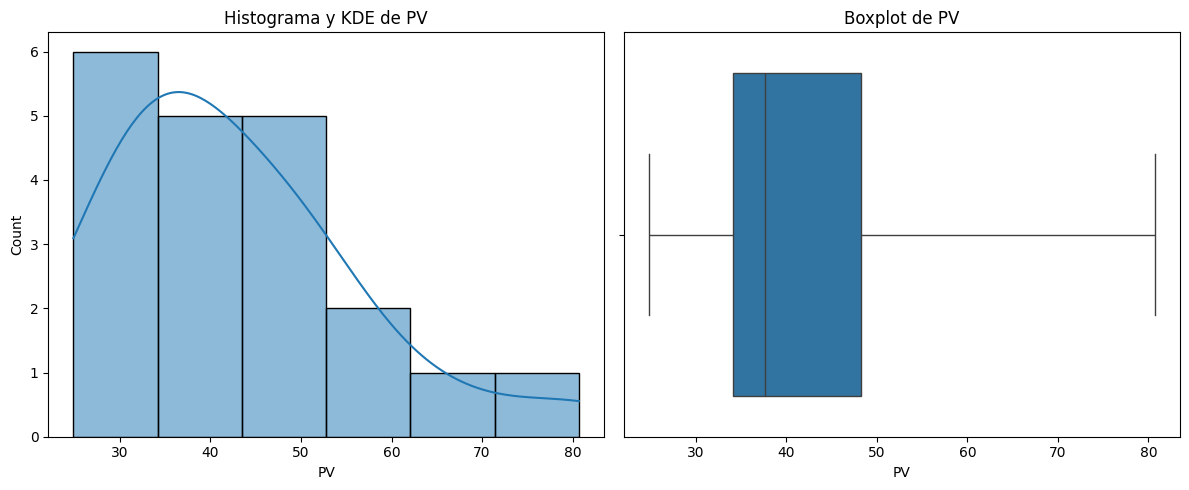

In [155]:
plot_combined_graphs(df_liga20, ['PV'], whisker_width = 4.5);

(2,)


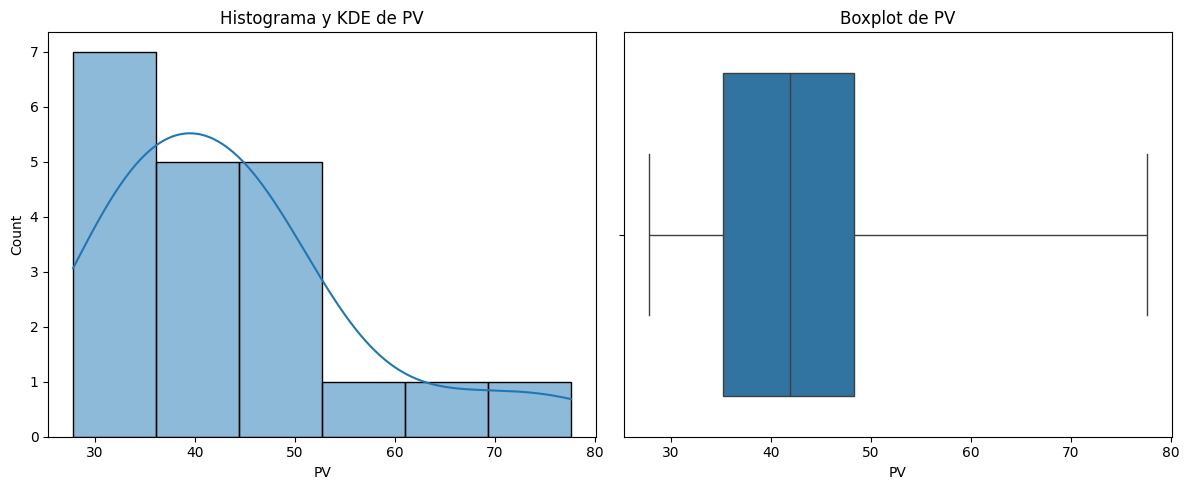

In [156]:
plot_combined_graphs(df_liga21, ['PV'], whisker_width = 4.5);

(2,)


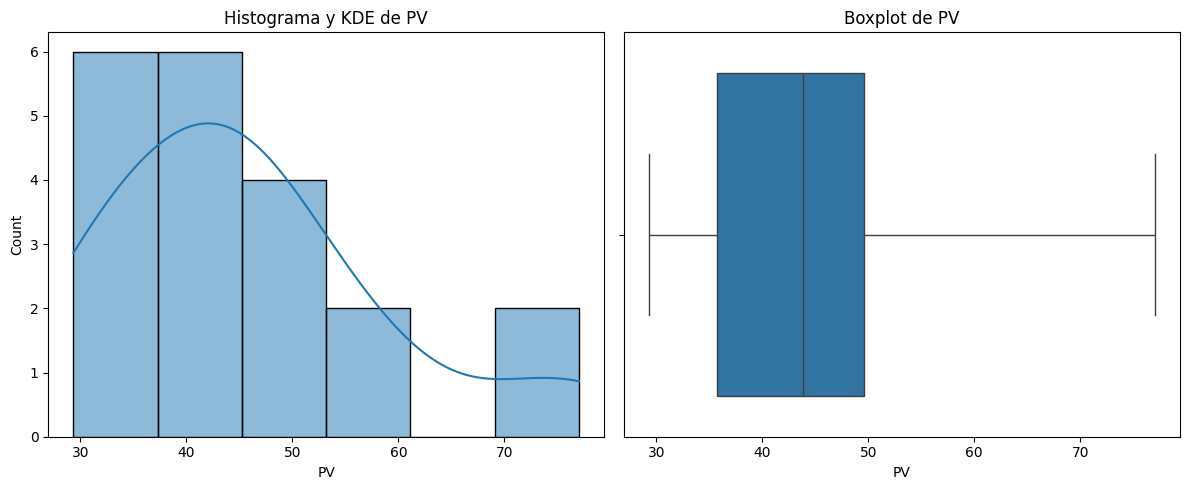

In [157]:
plot_combined_graphs(df_liga22, ['PV'], whisker_width = 4.5);

In [158]:
# En esta primera gráfica podemos ver: como en los dos primeros histogramas son muy similares, pero si nos fijamos en el tercero, 
# el KDE no es tan elevado como en los anteriores y además termina algo mas arriba.
# Y en cuanto a los boxplot, podemos ver como temporada a temporada se van acortando los 'bigotes' y la linea media se va incrementando.

(2,)


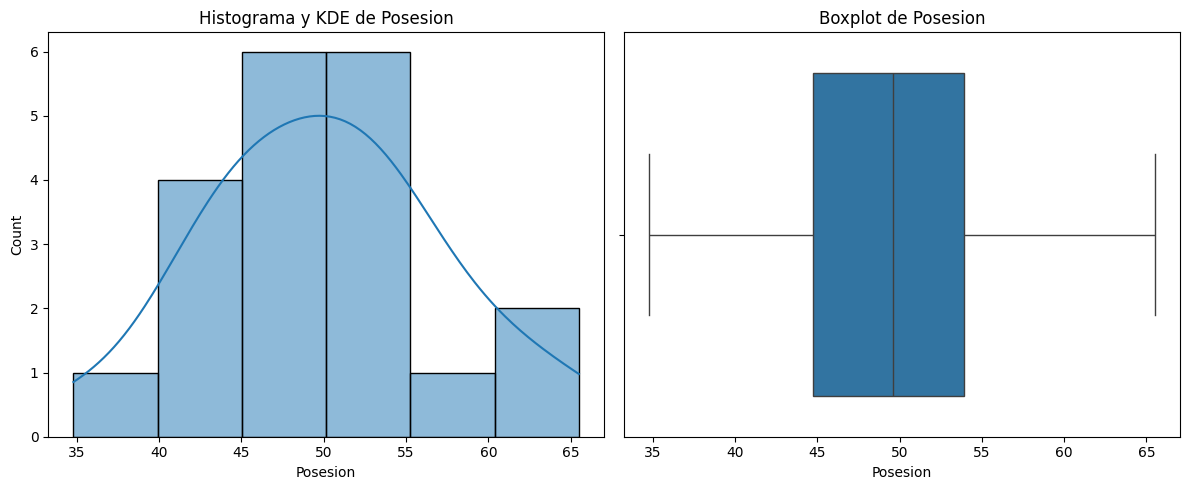

In [159]:
plot_combined_graphs(df_liga20, ['Posesion'], whisker_width = 4.5);

(2,)


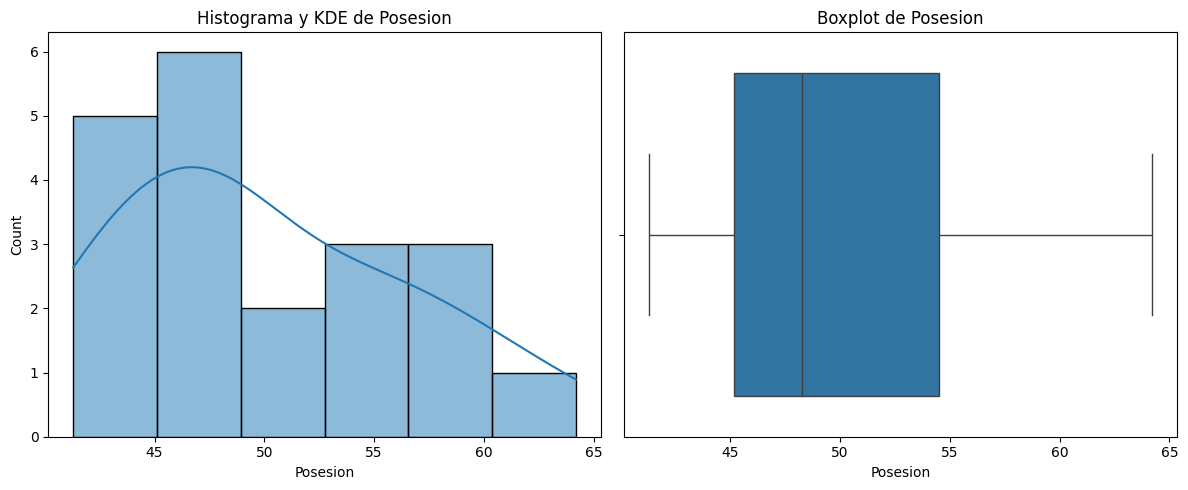

In [160]:
plot_combined_graphs(df_liga21, ['Posesion'], whisker_width = 4.5);

(2,)


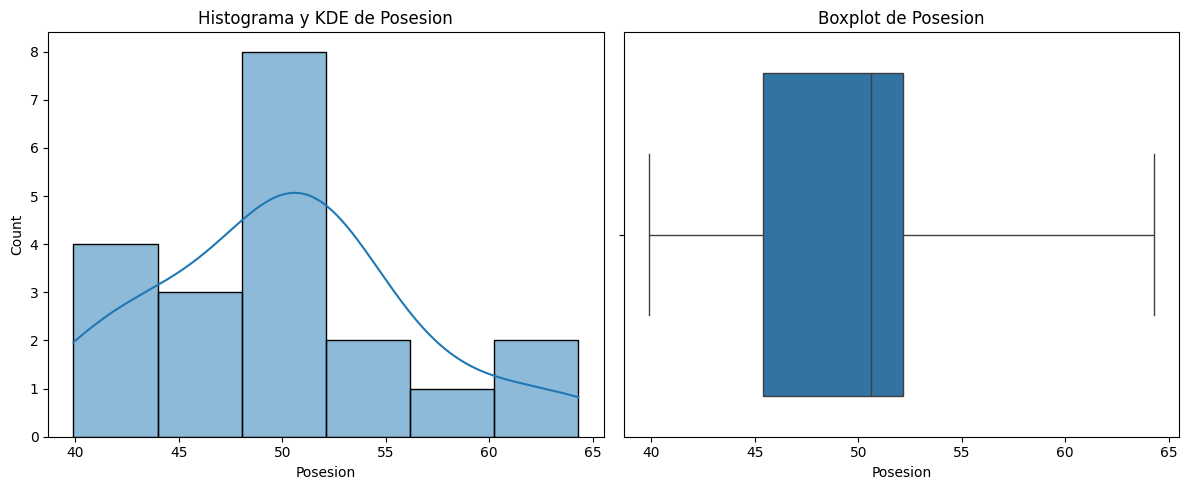

In [161]:
plot_combined_graphs(df_liga22, ['Posesion'], whisker_width = 4.5);

In [162]:
# En la posesion general vemos como en las dos primeras ligas hubo hasta 11 equipos con menos de un 50% de posesión de balón,
# mientras que en la última temporada fueron solo 8 equipos.
# Y en los boxplot vemos que la máxima se mantiene casi constante mientras que el mínimo parece en aumento.

(2,)


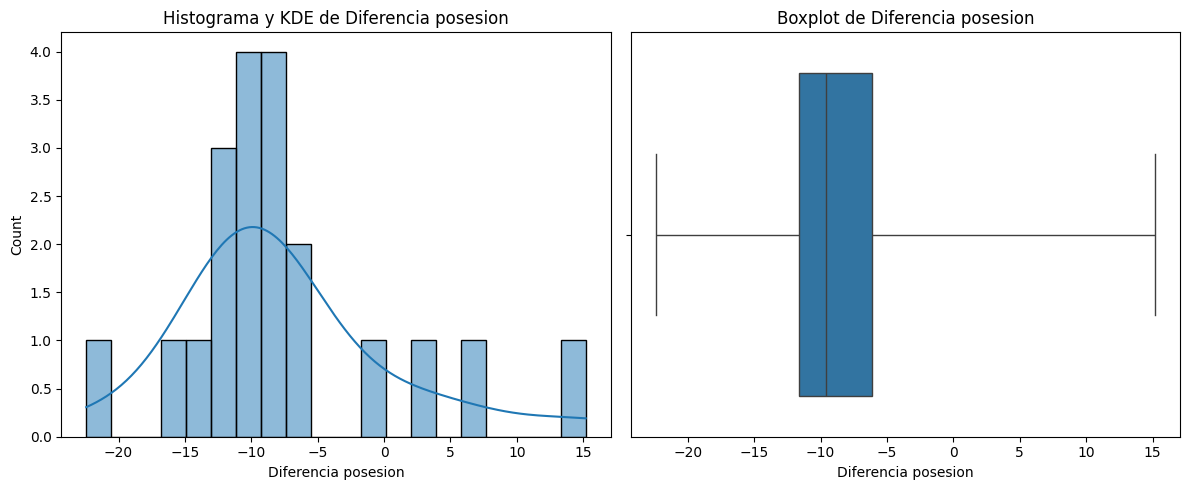

In [163]:
plot_combined_graphs(df_liga20, ['Diferencia posesion'], whisker_width = 4.5, bins=20);

(2,)


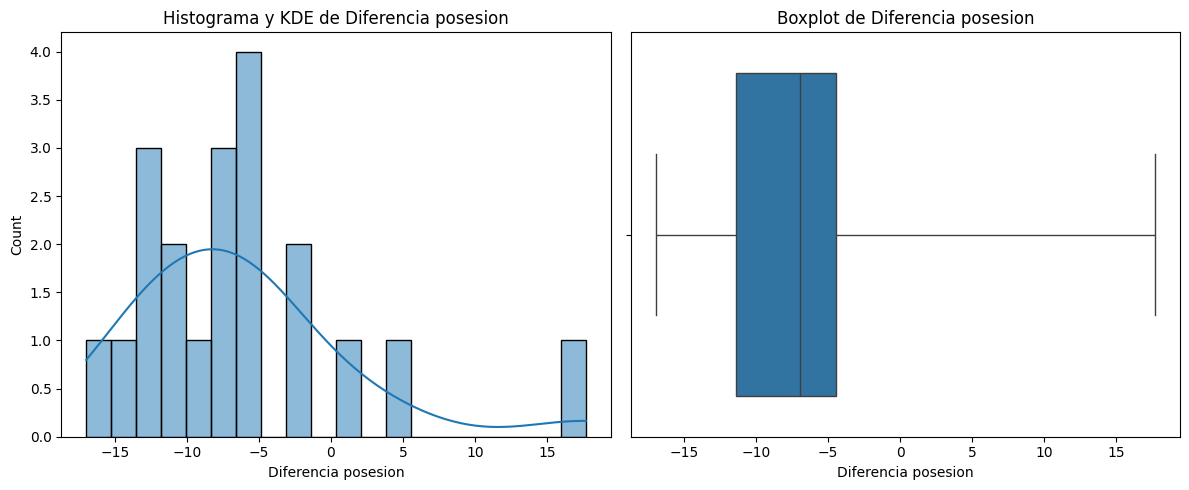

In [164]:
plot_combined_graphs(df_liga21, ['Diferencia posesion'], whisker_width = 4.5, bins=20);

(2,)


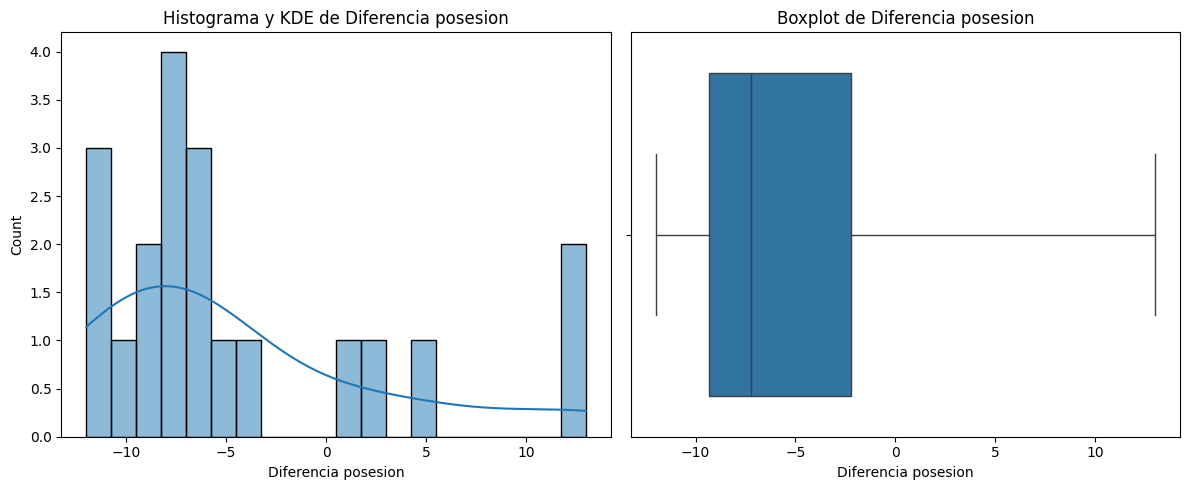

In [165]:
plot_combined_graphs(df_liga22, ['Diferencia posesion'], whisker_width = 4.5, bins=20);

(2,)


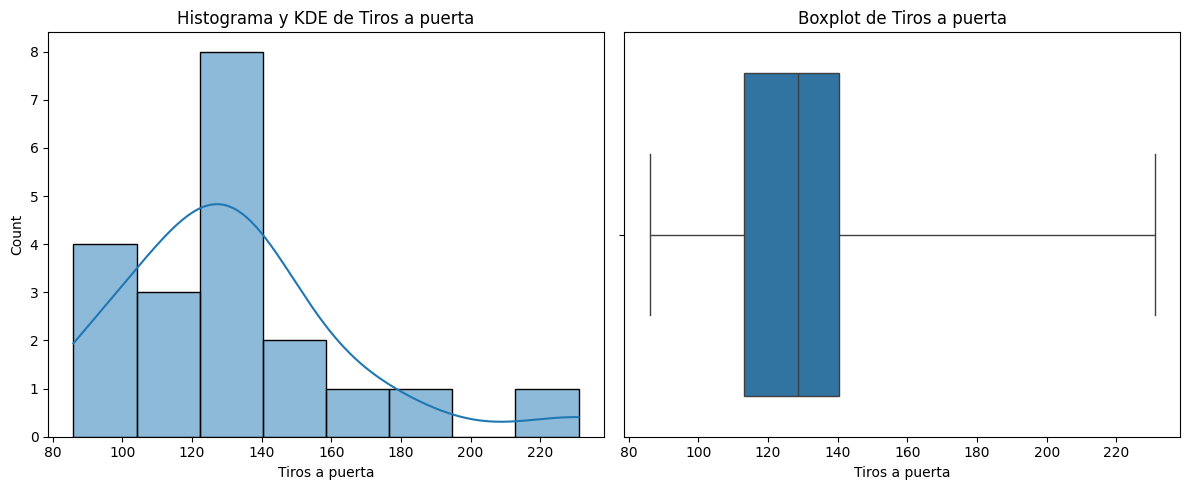

In [166]:
plot_combined_graphs(df_liga20, ['Tiros a puerta'], whisker_width = 4.5);

(2,)


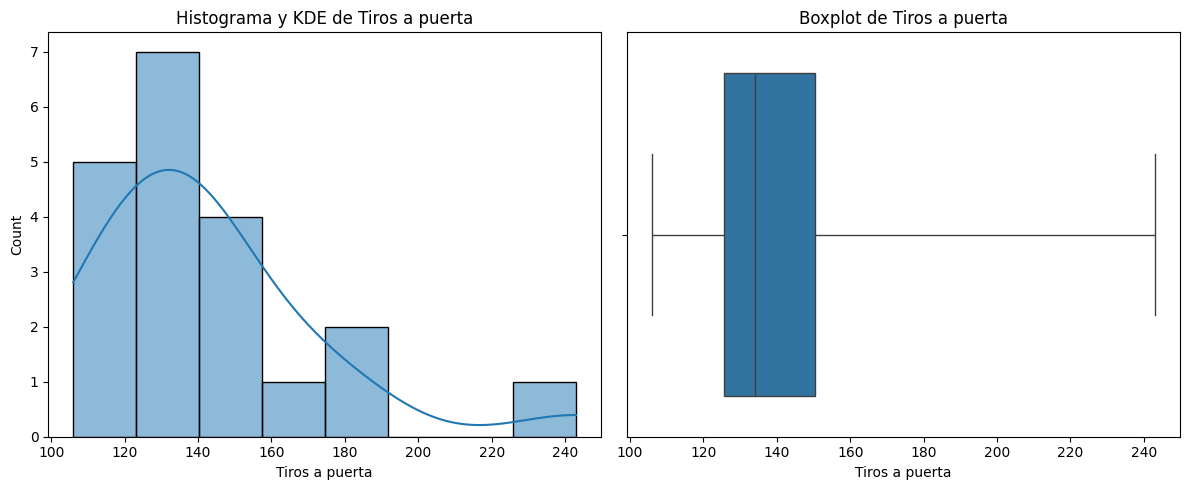

In [167]:
plot_combined_graphs(df_liga21, ['Tiros a puerta'], whisker_width = 4.5);

(2,)


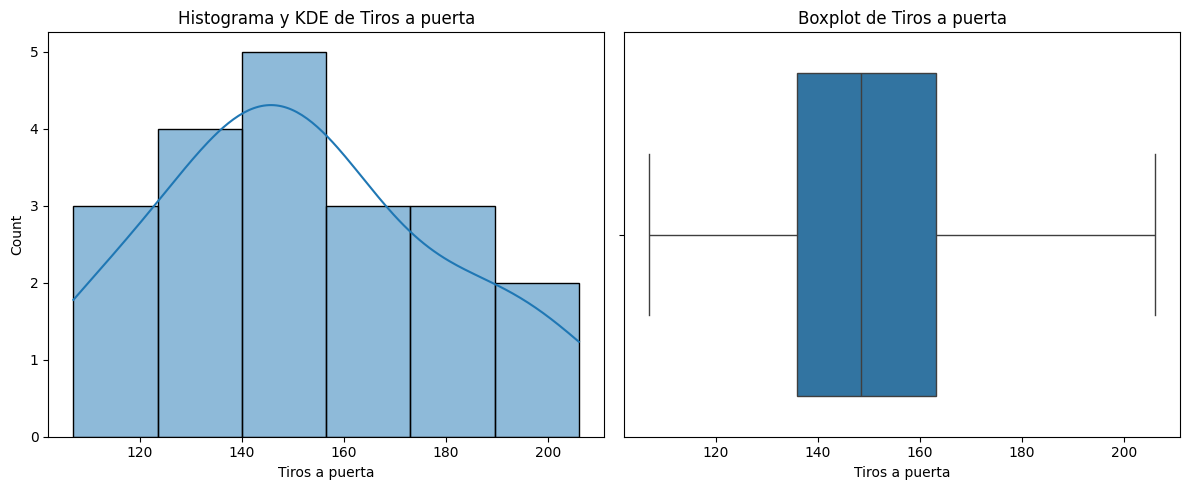

In [168]:
plot_combined_graphs(df_liga22, ['Tiros a puerta'], whisker_width = 4.5);

In [169]:
# En los tiros a puerta, se puede ver una diferencia en las 2 primeras temporadas mientras que en la tercera, con un 
# gráfico mucho mas homogeneo, parece que la tendencia se va igualando.

(2, 2)


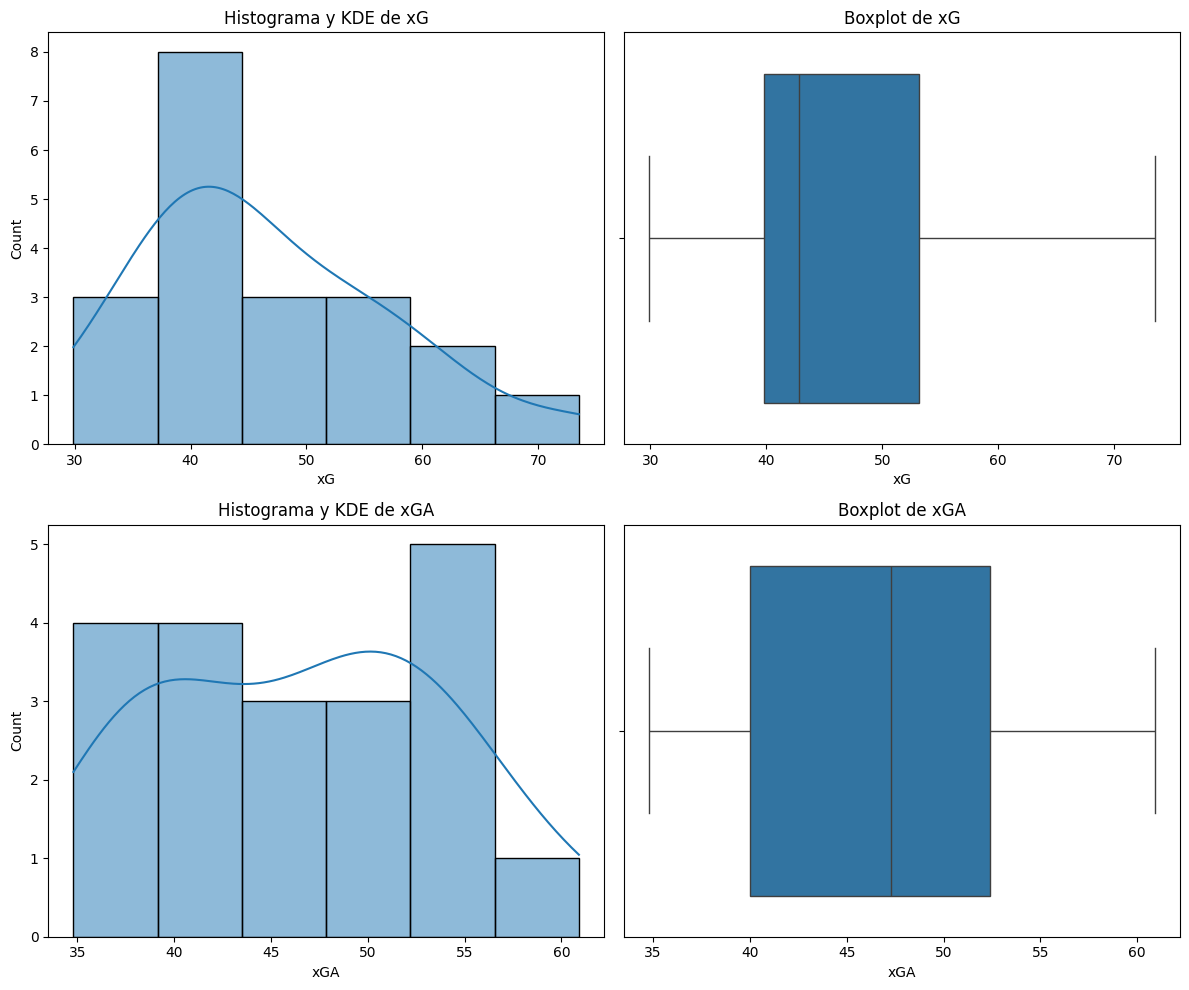

In [170]:
plot_combined_graphs(df_liga20, ['xG', 'xGA'], whisker_width = 4.5);

(2, 2)


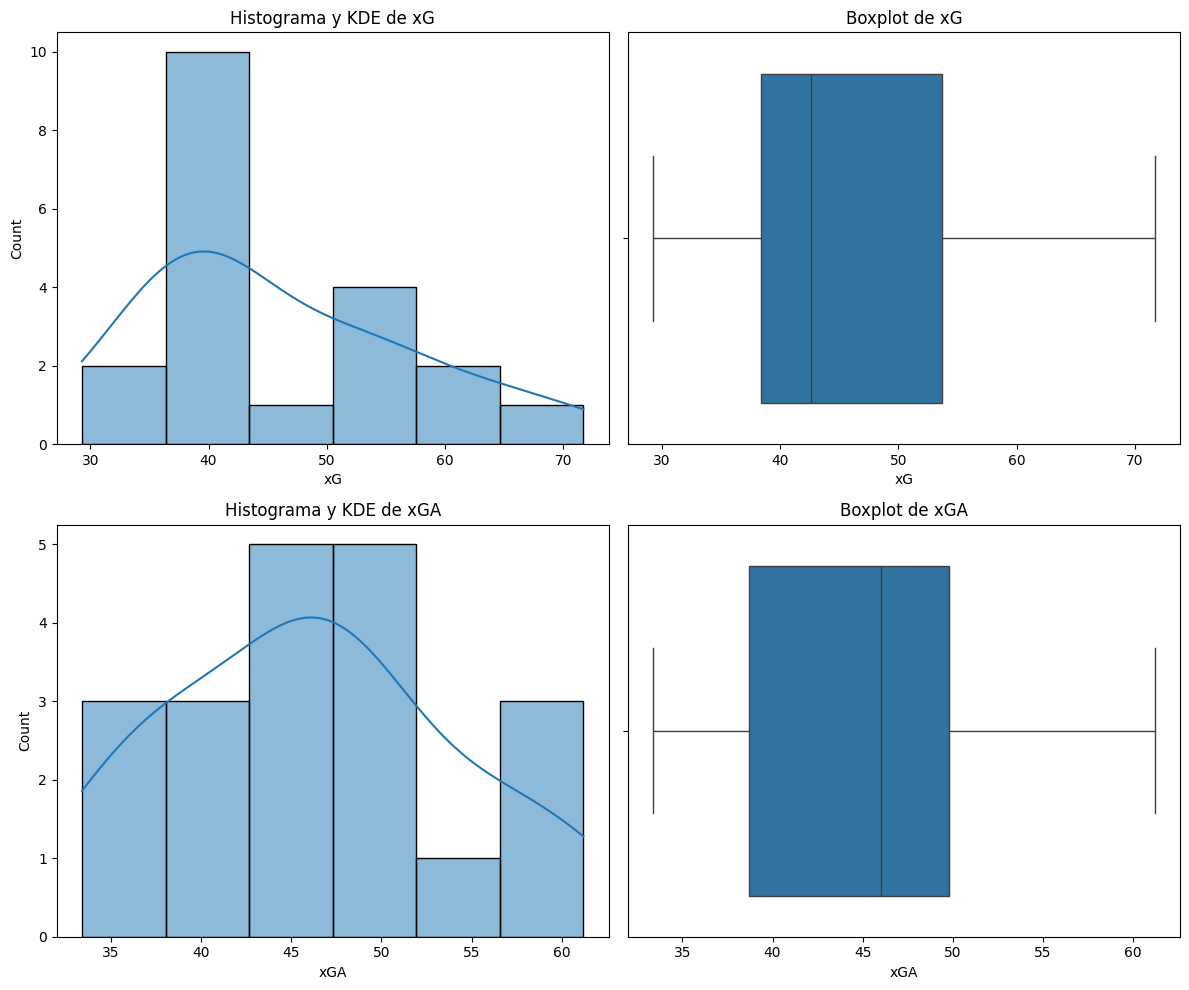

In [171]:
plot_combined_graphs(df_liga21, ['xG', 'xGA'], whisker_width = 4.5);

(2, 2)


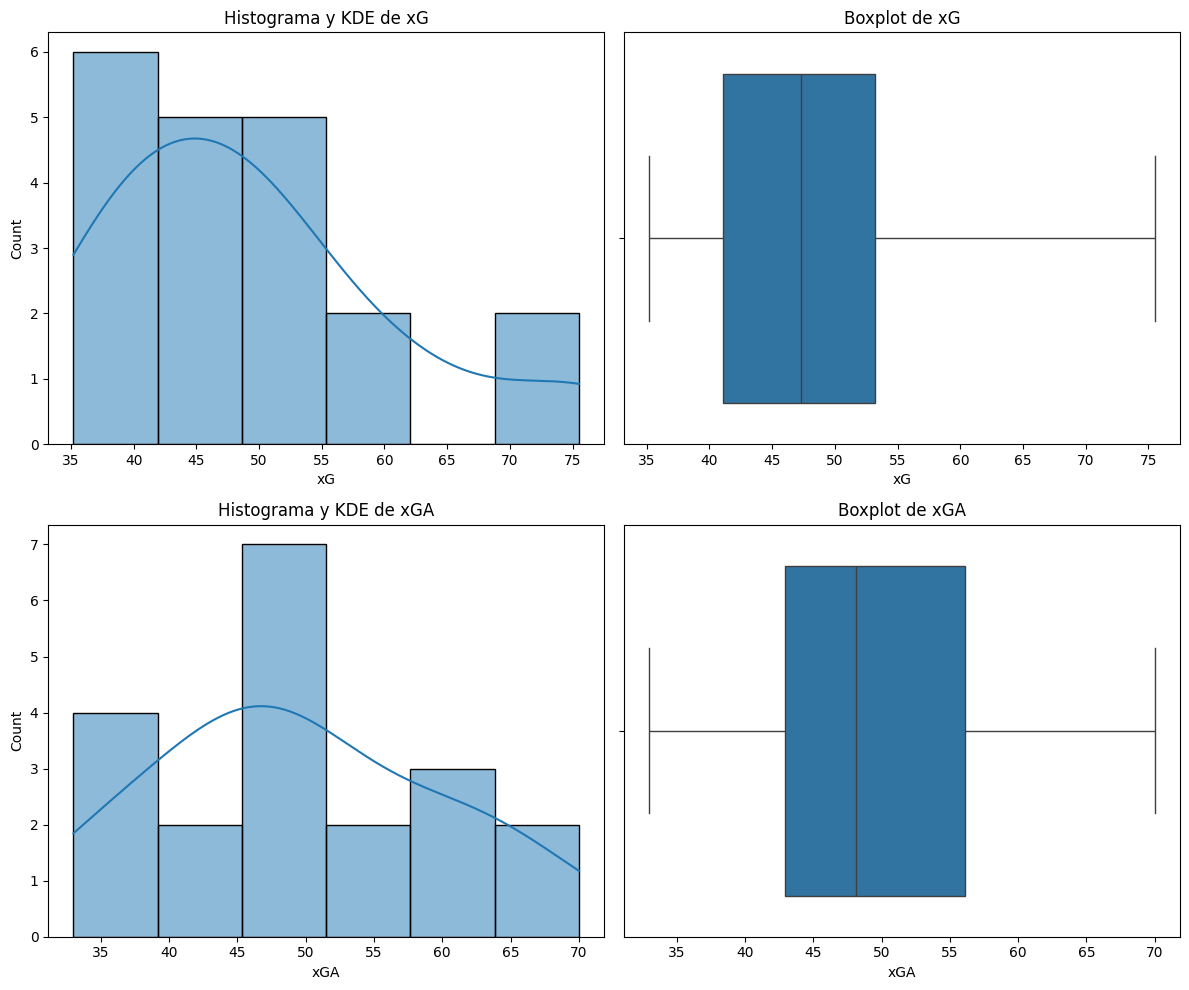

In [172]:
plot_combined_graphs(df_liga22, ['xG', 'xGA'], whisker_width = 4.5);

(2,)


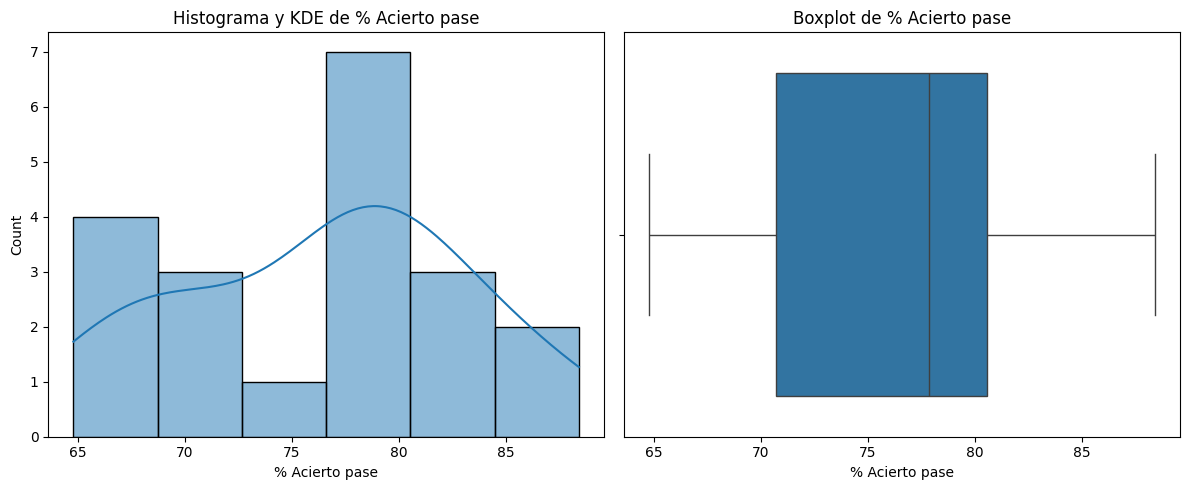

In [173]:
plot_combined_graphs(df_liga20, ['% Acierto pase'], whisker_width = 4.5);

(2,)


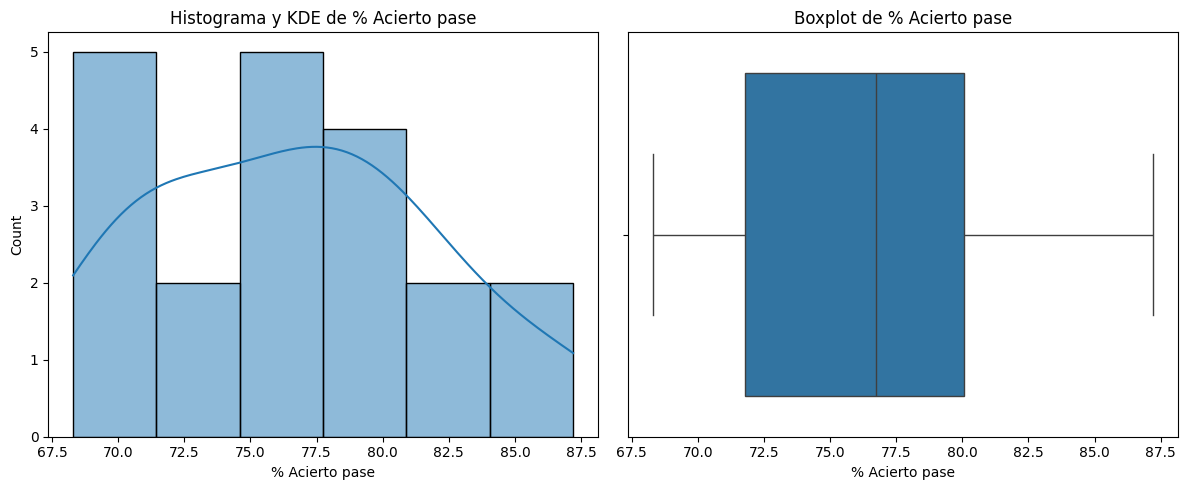

In [174]:
plot_combined_graphs(df_liga21, ['% Acierto pase'], whisker_width = 4.5);

(2,)


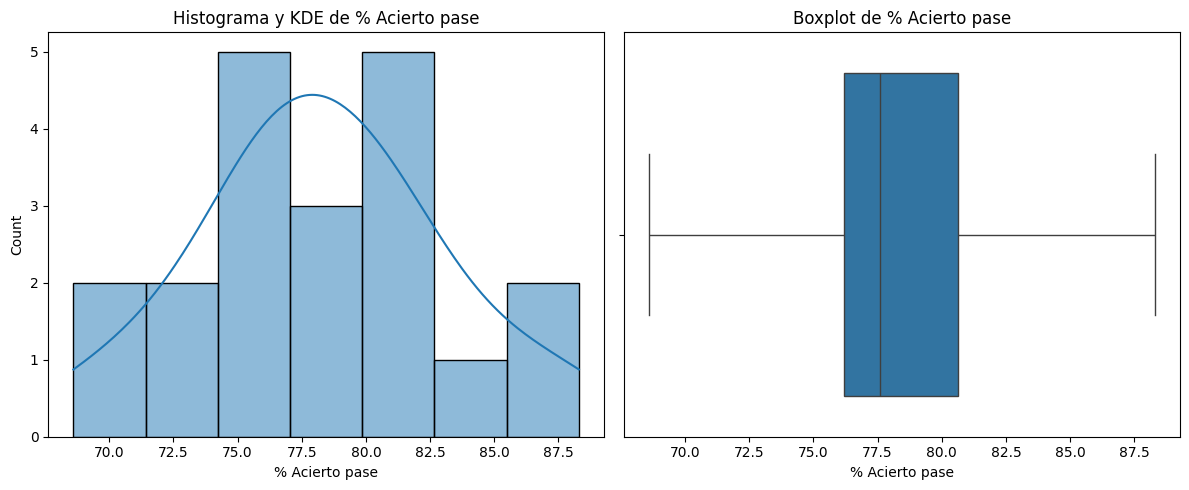

In [175]:
plot_combined_graphs(df_liga22, ['% Acierto pase'], whisker_width = 4.5);

In [176]:
# En estas gráficas podemos observar como el mínimo de acierto en el pase se va incrementando por temporada, lo que nos
# podría estar indicando que los equipos pretenden asegurar mas la posesión de balón, aunque todo esto dependerá del modelo
# de juego de cada uno. Los equipos con un juego directo  probablemente tengan menos posesión de balón y a su vez menos 
# acierto en el pase.

(2, 2)


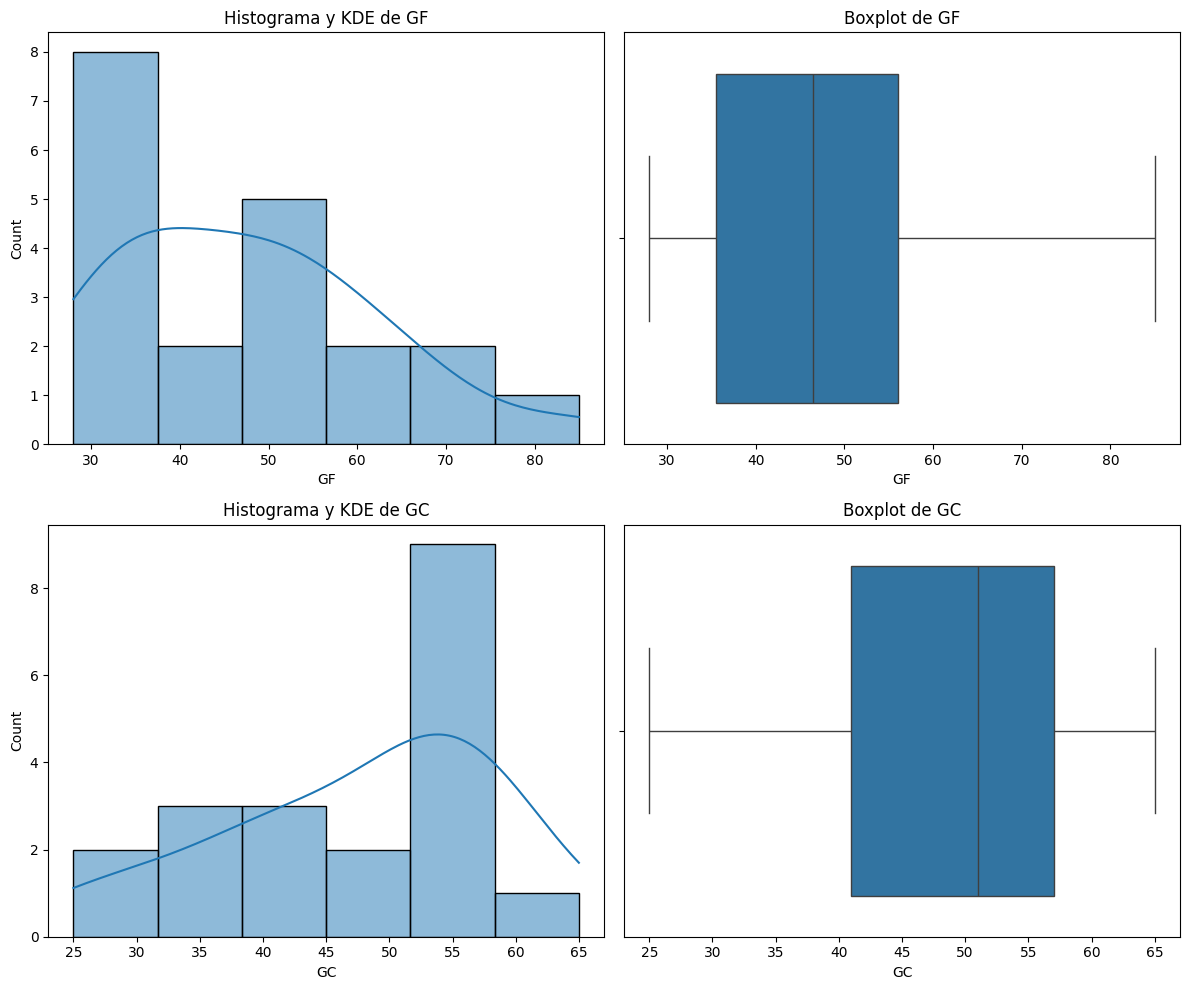

In [177]:
plot_combined_graphs(df_liga20, ['GF', 'GC'], whisker_width = 4.5);

(2, 2)


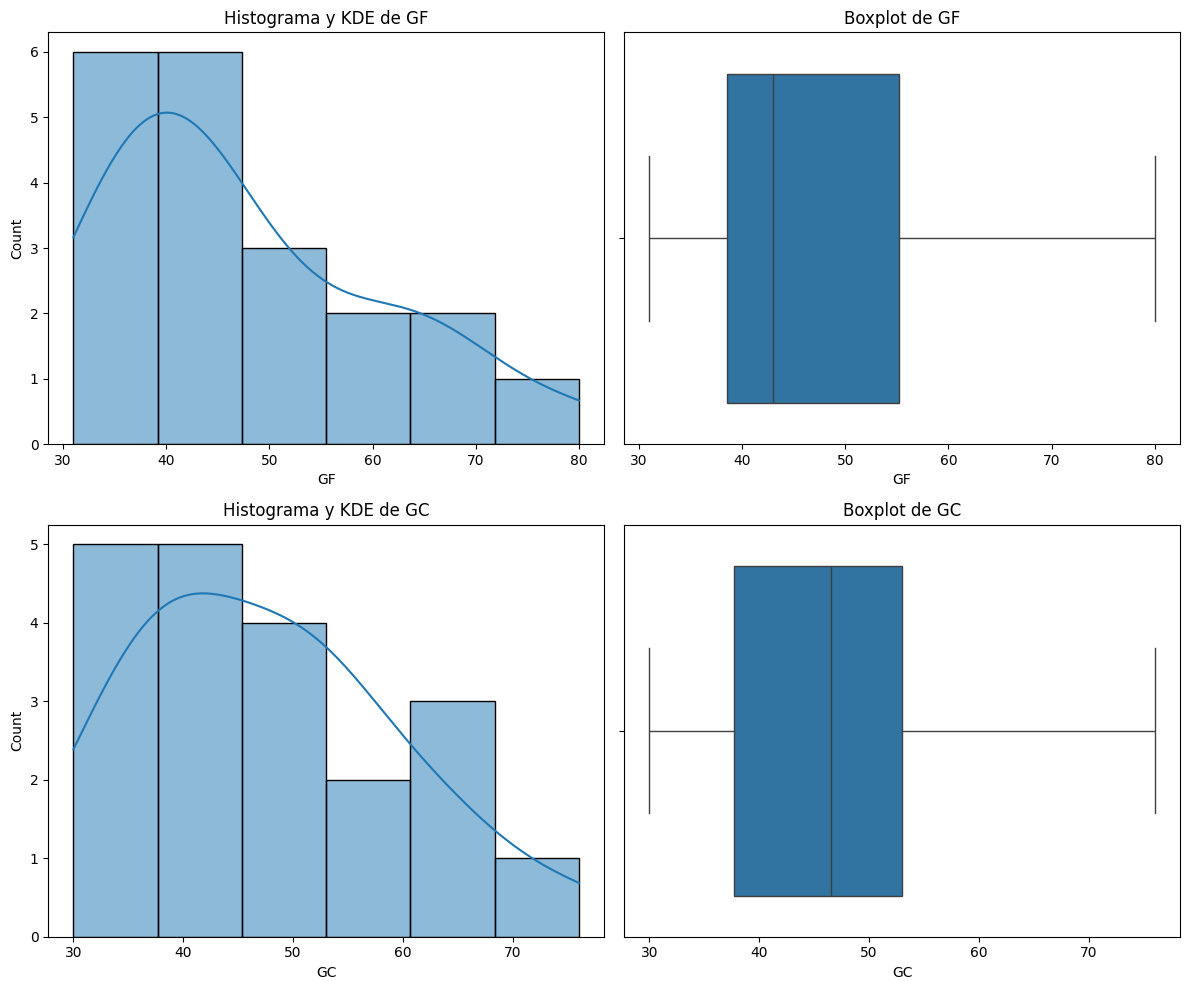

In [178]:
plot_combined_graphs(df_liga21, ['GF', 'GC'], whisker_width = 4.5);

(2, 2)


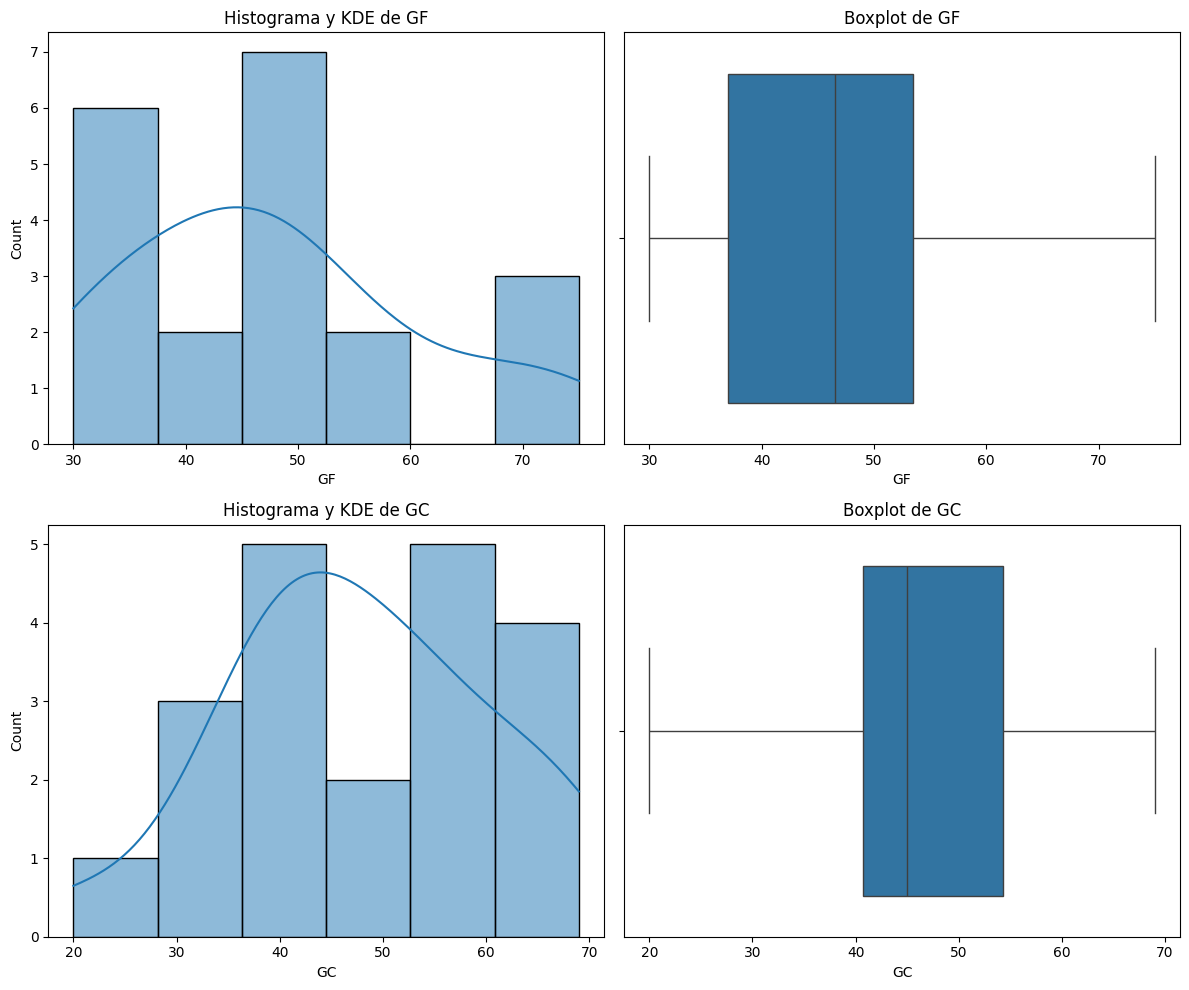

In [179]:
plot_combined_graphs(df_liga22, ['GF', 'GC'], whisker_width = 4.5);

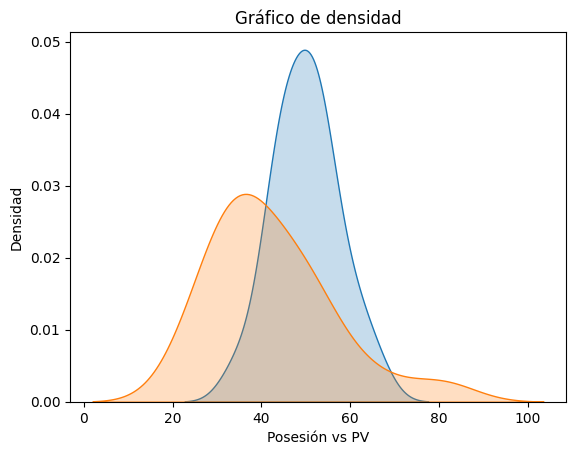

In [180]:
sns.kdeplot(data=df_liga20, x=df_liga20['Posesion'], fill=True, label=df_liga20['Posesion']) 
sns.kdeplot(data=df_liga20, x=df_liga20['PV'], fill=True, label=df_liga20['PV'])  

plt.xlabel('Posesión vs PV')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad')

# Muestra el gráfico
plt.show()

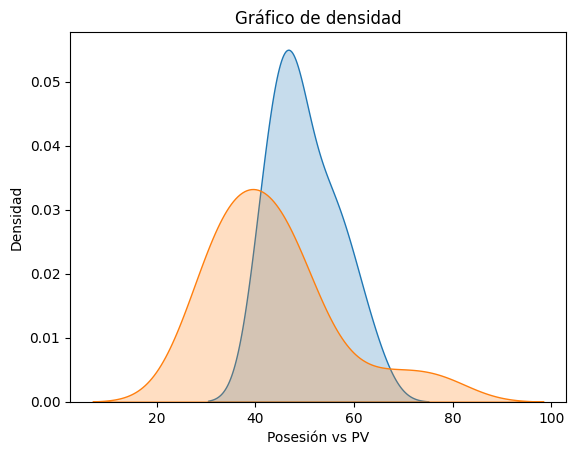

In [181]:
sns.kdeplot(data=df_liga21, x=df_liga21['Posesion'], fill=True, label=df_liga21['Posesion']) 
sns.kdeplot(data=df_liga21, x=df_liga21['PV'], fill=True, label=df_liga21['PV'])  

plt.xlabel('Posesión vs PV')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad')

# Muestra el gráfico
plt.show()

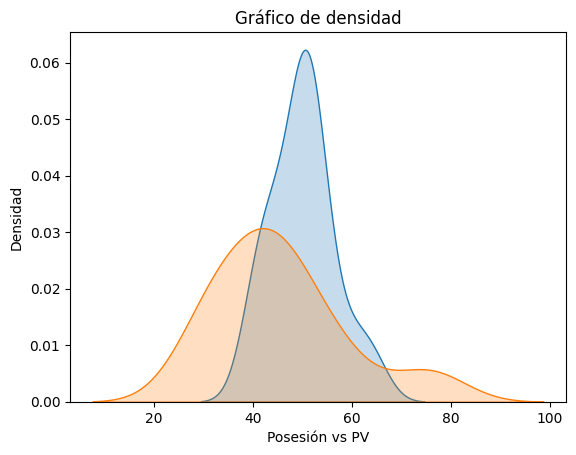

In [182]:
sns.kdeplot(data=df_liga22, x=df_liga22['Posesion'], fill=True, label=df_liga22['Posesion']) 
sns.kdeplot(data=df_liga22, x=df_liga22['PV'], fill=True, label=df_liga22['PV'])  

plt.xlabel('Posesión vs PV')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad')

# Muestra el gráfico
plt.show()

In [183]:
df_liga20.columns

Index(['Clasificacion', 'Equipo', 'GF', 'GC', 'Pts', 'xG', 'xGA', 'Posesion',
       'Tiros a puerta', '% Acierto pase', 'ACG', 'PV', 'Diferencia posesion'],
      dtype='object')

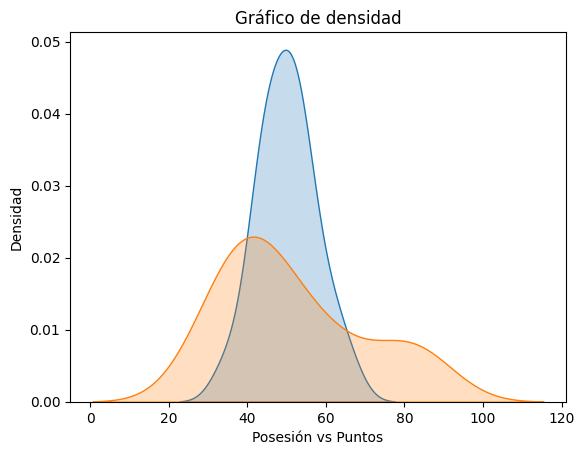

In [184]:
sns.kdeplot(data=df_liga20, x=df_liga20['Posesion'], fill=True, label=df_liga20['Posesion']) 
sns.kdeplot(data=df_liga20, x=df_liga20['Pts'], fill=True, label=df_liga20['Pts'])  

plt.xlabel('Posesión vs Puntos')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad')

# Muestra el gráfico
plt.show()

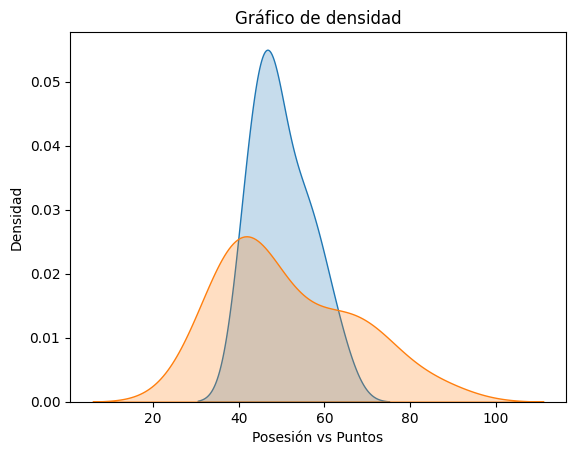

In [185]:
sns.kdeplot(data=df_liga21, x=df_liga21['Posesion'], fill=True, label=df_liga21['Posesion']) 
sns.kdeplot(data=df_liga21, x=df_liga21['Pts'], fill=True, label=df_liga21['Pts'])  

plt.xlabel('Posesión vs Puntos')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad')

# Muestra el gráfico
plt.show()

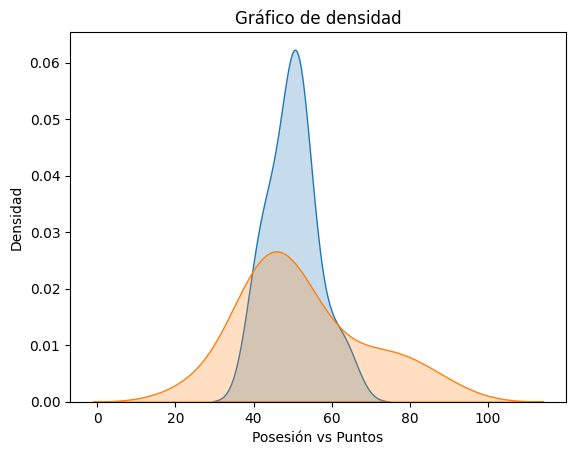

In [186]:
sns.kdeplot(data=df_liga22, x=df_liga22['Posesion'], fill=True, label=df_liga22['Posesion']) 
sns.kdeplot(data=df_liga22, x=df_liga22['Pts'], fill=True, label=df_liga22['Pts'])  

plt.xlabel('Posesión vs Puntos')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad')

# Muestra el gráfico
plt.show()

In [187]:
# analisis bivariante

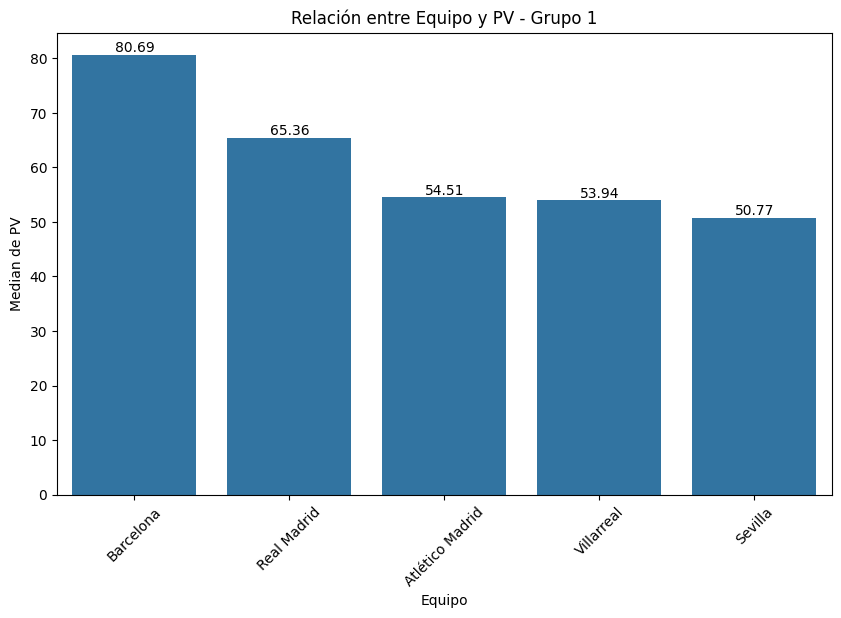

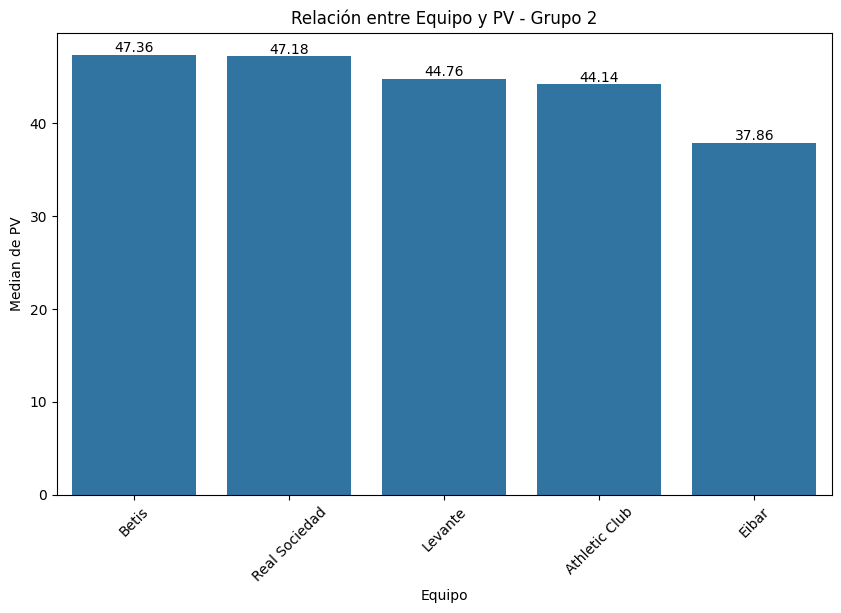

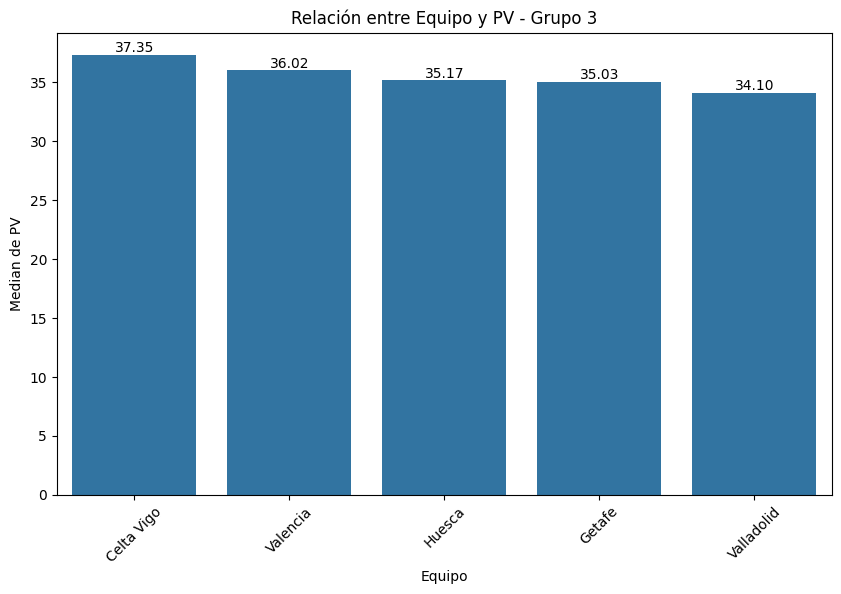

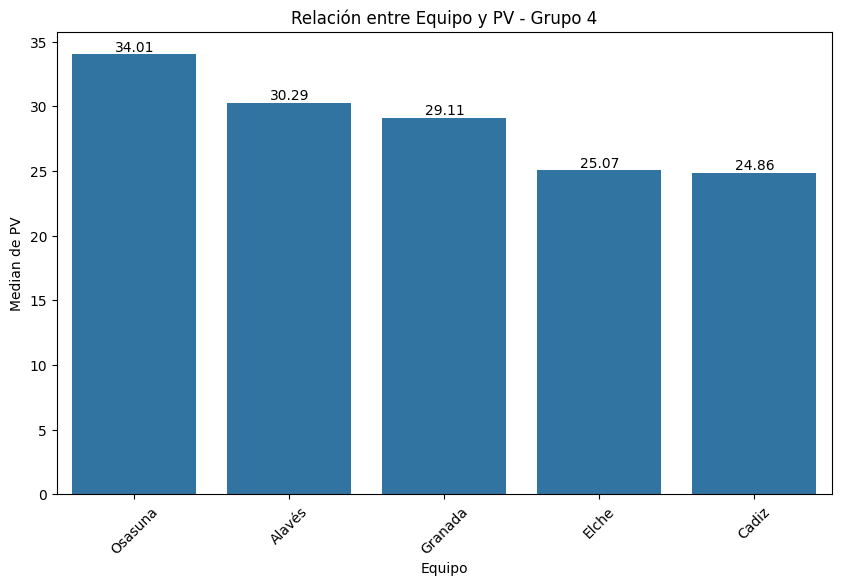

In [188]:
plot_categorical_numerical_relationship(df_liga20, 'Equipo', 'PV', measure= 'median', show_values=True)

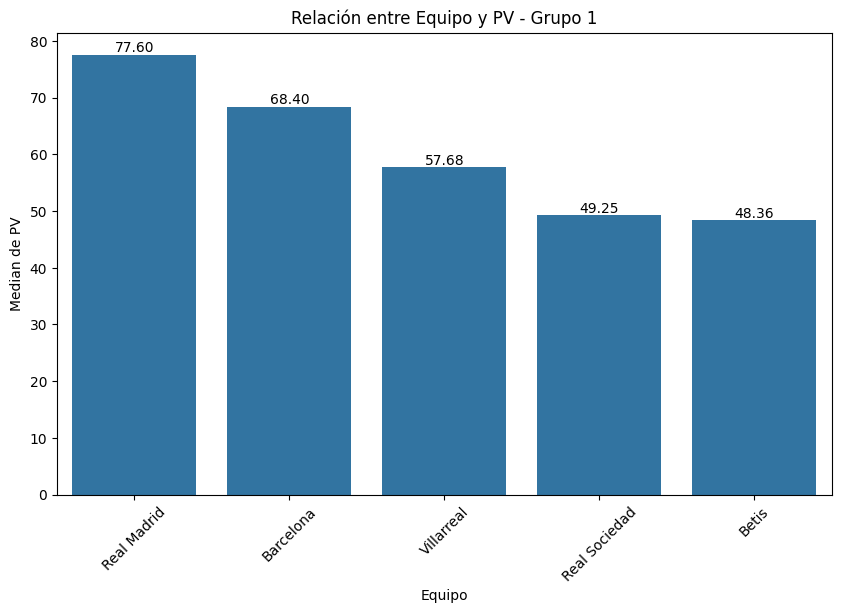

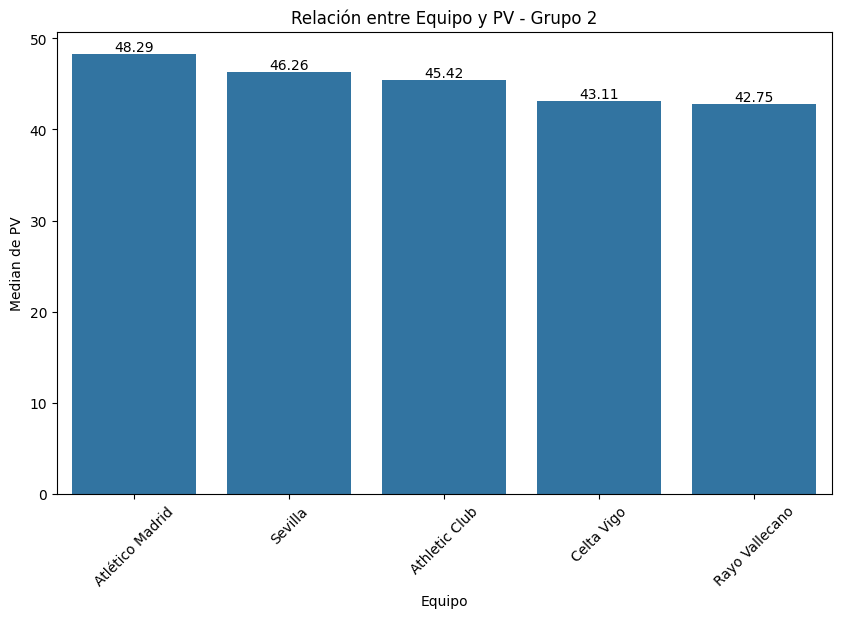

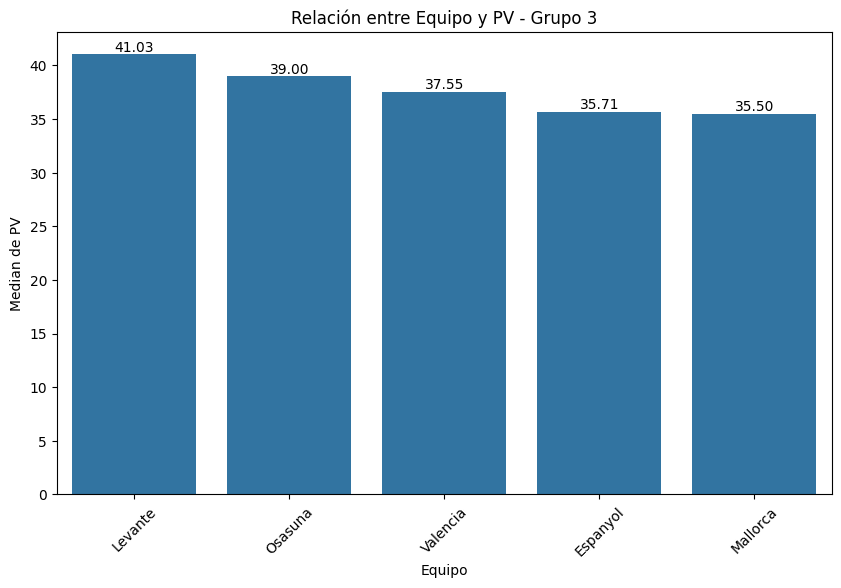

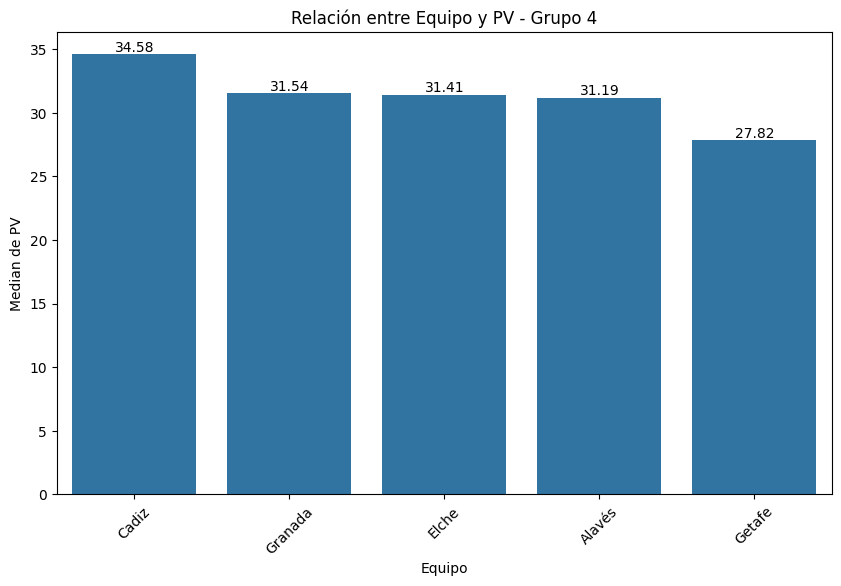

In [189]:
plot_categorical_numerical_relationship(df_liga21, 'Equipo', 'PV', measure= 'median', show_values=True)

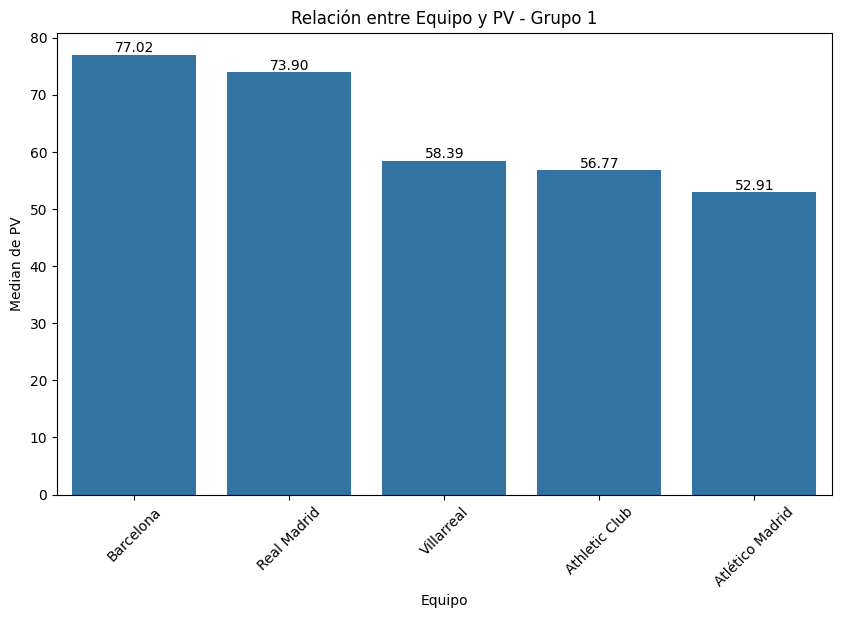

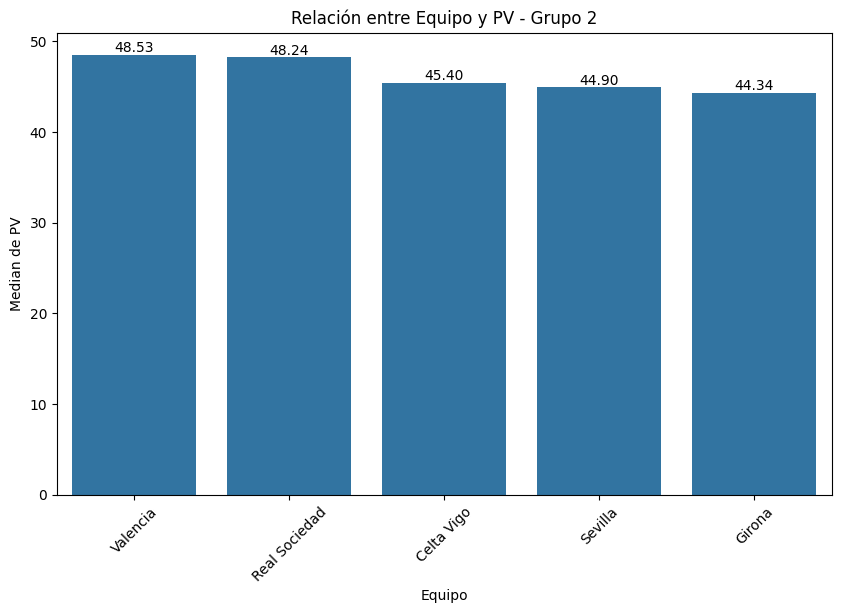

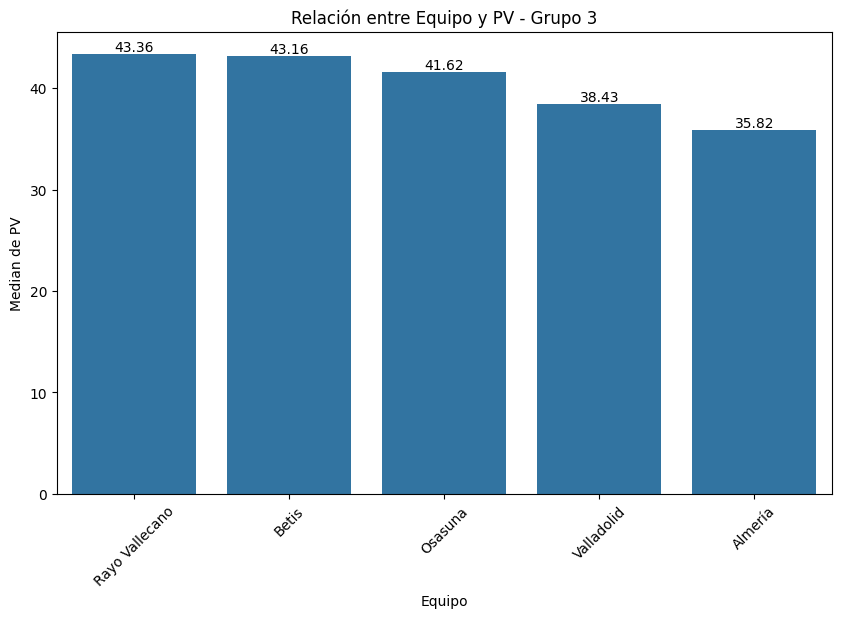

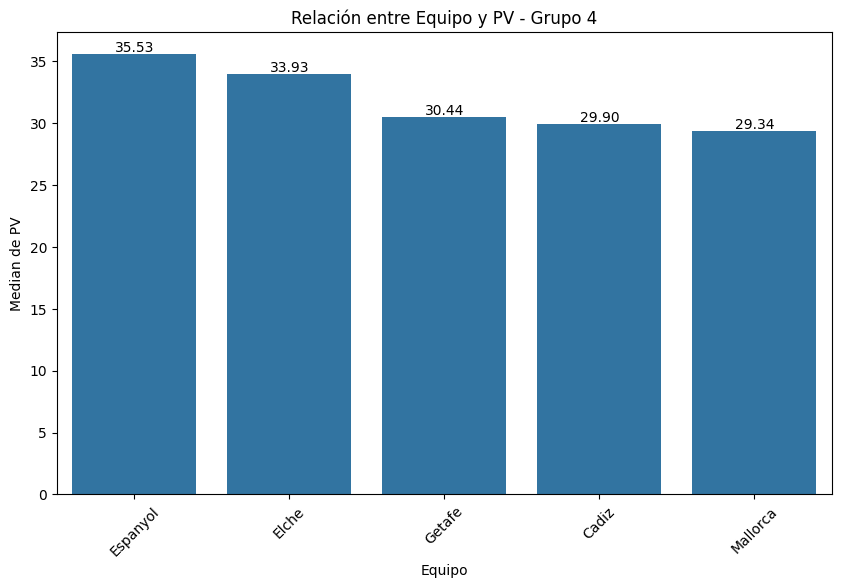

In [190]:
plot_categorical_numerical_relationship(df_liga22, 'Equipo', 'PV', measure= 'median', show_values=True)

In [191]:
df_liga20.sort_values(by='Clasificacion', ascending=False, inplace=True)

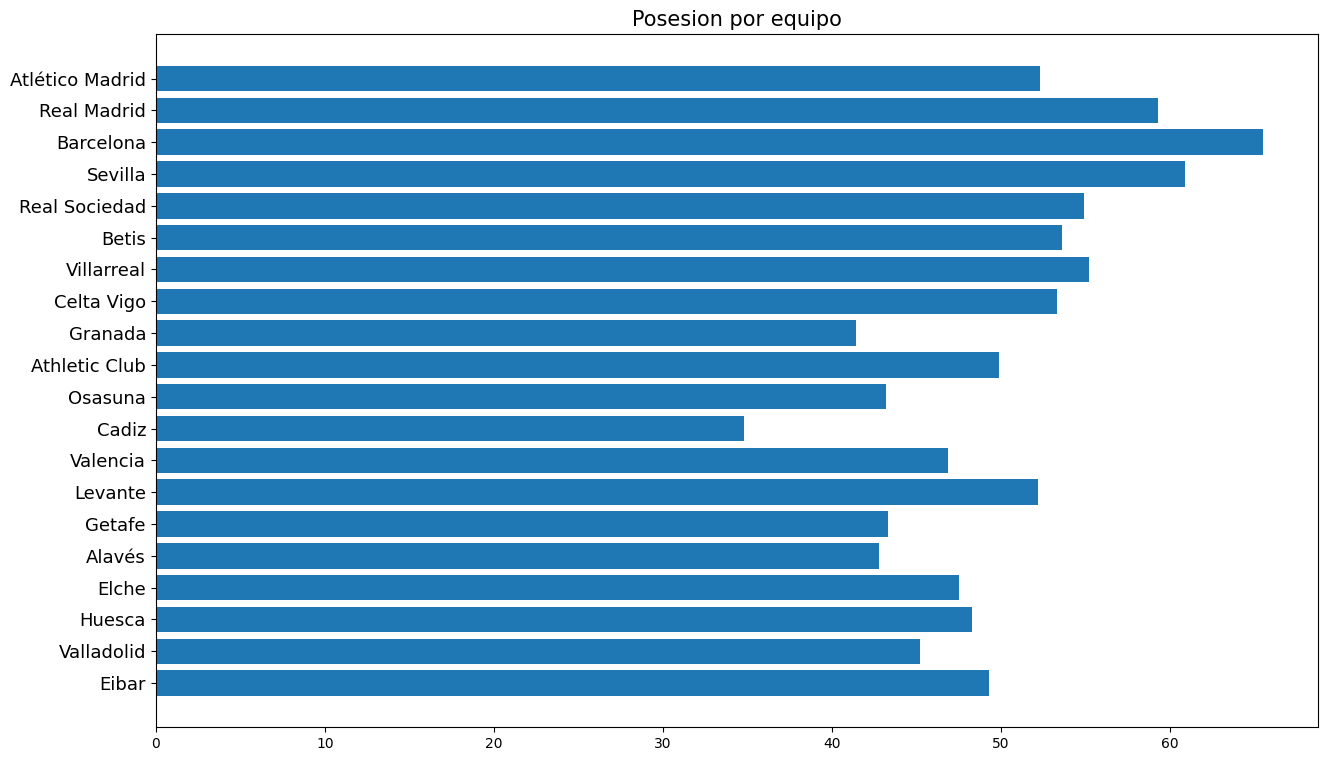

In [192]:
plt.figure(figsize=(15,9))
plt.barh(df_liga20.Equipo, df_liga20.Posesion)
plt.title('Posesion por equipo', fontsize=15)
plt.yticks(fontsize=13)
plt.show()

In [193]:
df_liga21.sort_values(by='Clasificacion', ascending=False, inplace=True)

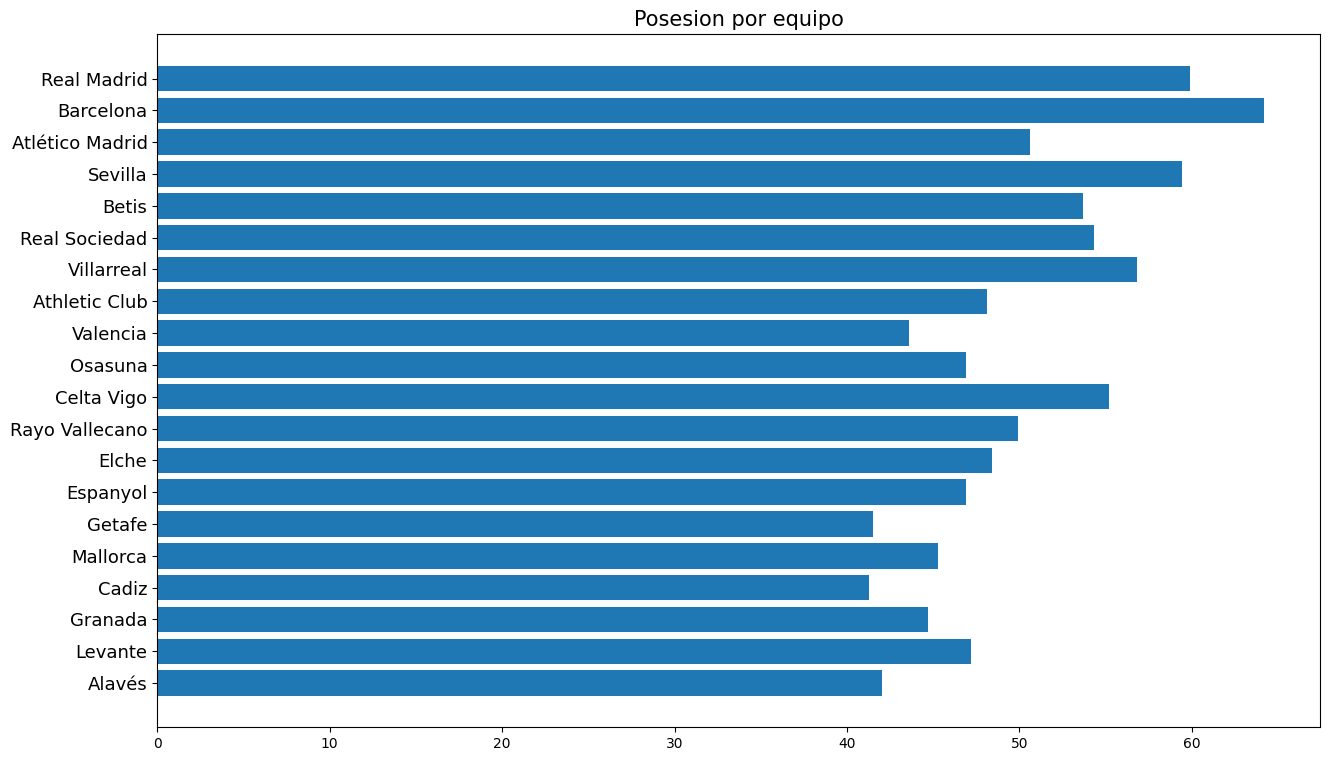

In [194]:
plt.figure(figsize=(15,9))
plt.barh(df_liga21.Equipo, df_liga21.Posesion)
plt.title('Posesion por equipo', fontsize=15)
plt.yticks(fontsize=13)
plt.show()

In [195]:
df_liga22.sort_values(by='Clasificacion', ascending=False, inplace=True)

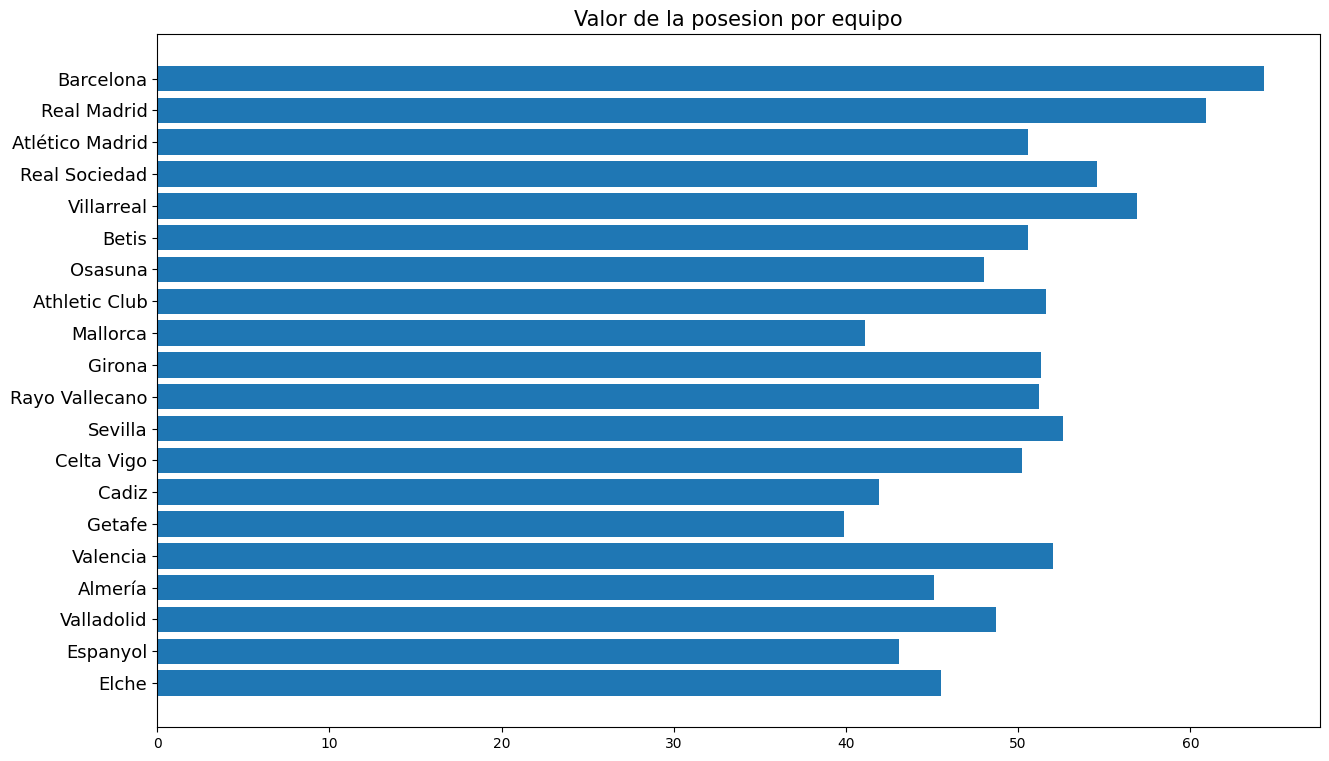

In [196]:
plt.figure(figsize=(15,9))
plt.barh(df_liga22.Equipo, df_liga22.Posesion)
plt.title('Valor de la posesion por equipo', fontsize=15)
plt.yticks(fontsize=13)
plt.show()

In [197]:
df_liga20[['PV', 'Posesion', 'GF', 'GC', 'ACG', 'Pts', 'xG', 'xGA', '% Acierto pase', 'Tiros a puerta']].corr()

PV  Posesion        GF        GC       ACG       Pts  \
PV              1.000000  0.883599  0.872800 -0.736964  0.854985  0.809205   
Posesion        0.883599  1.000000  0.777319 -0.649708  0.792771  0.722833   
GF              0.872800  0.777319  1.000000 -0.605554  0.984297  0.877558   
GC             -0.736964 -0.649708 -0.605554  1.000000 -0.611436 -0.809297   
ACG             0.854985  0.792771  0.984297 -0.611436  1.000000  0.876932   
Pts             0.809205  0.722833  0.877558 -0.809297  0.876932  1.000000   
xG              0.908051  0.849107  0.898322 -0.639964  0.884745  0.807467   
xGA            -0.697856 -0.617054 -0.496191  0.891191 -0.489538 -0.669655   
% Acierto pase  0.793770  0.910970  0.800063 -0.572291  0.830633  0.722171   
Tiros a puerta  0.929469  0.792334  0.899643 -0.614377  0.886855  0.778204   

                      xG       xGA  % Acierto pase  Tiros a puerta  
PV              0.908051 -0.697856        0.793770        0.929469  
Posesion        0.849107 -0.617054        0.910970        0.792334  
GF              0.898322 -0.496191        0.800063        0.899643  
GC             -0.639964  0.891191       -0.572291       -0.614377  
ACG             0.884745 -0.489538        0.830633        0.886855  
Pts             0.807467 -0.669655        0.722171        0.778204  
xG              1.000000 -0.651481        0.747350        0.885415  
xGA            -0.651481  1.000000       -0.424793       -0.562342  
% Acierto pase  0.747350 -0.424793        1.000000        0.738261  
Tiros a puerta  0.885415 -0.562342        0.738261        1.000000

In [198]:
df_liga21[['PV', 'Posesion', 'GF', 'GC', 'ACG', 'Pts', 'xG', 'xGA', '% Acierto pase', 'Tiros a puerta']].corr()

PV  Posesion        GF        GC       ACG       Pts  \
PV              1.000000  0.861802  0.873870 -0.611083  0.898596  0.874526   
Posesion        0.861802  1.000000  0.755805 -0.668299  0.796637  0.825884   
GF              0.873870  0.755805  1.000000 -0.488195  0.985834  0.852049   
GC             -0.611083 -0.668299 -0.488195  1.000000 -0.548337 -0.798109   
ACG             0.898596  0.796637  0.985834 -0.548337  1.000000  0.882402   
Pts             0.874526  0.825884  0.852049 -0.798109  0.882402  1.000000   
xG              0.927760  0.744696  0.878733 -0.417680  0.867364  0.756321   
xGA            -0.529882 -0.528976 -0.423227  0.771322 -0.478042 -0.710332   
% Acierto pase  0.857779  0.931410  0.810333 -0.615963  0.833670  0.832436   
Tiros a puerta  0.913439  0.708784  0.894555 -0.499714  0.864312  0.811511   

                      xG       xGA  % Acierto pase  Tiros a puerta  
PV              0.927760 -0.529882        0.857779        0.913439  
Posesion        0.744696 -0.528976        0.931410        0.708784  
GF              0.878733 -0.423227        0.810333        0.894555  
GC             -0.417680  0.771322       -0.615963       -0.499714  
ACG             0.867364 -0.478042        0.833670        0.864312  
Pts             0.756321 -0.710332        0.832436        0.811511  
xG              1.000000 -0.408836        0.780915        0.900140  
xGA            -0.408836  1.000000       -0.478519       -0.384315  
% Acierto pase  0.780915 -0.478519        1.000000        0.781661  
Tiros a puerta  0.900140 -0.384315        0.781661        1.000000

In [199]:
df_liga22[['PV', 'Posesion', 'GF', 'GC', 'ACG', 'Pts', 'xG', 'xGA', '% Acierto pase', 'Tiros a puerta']].corr()

PV  Posesion        GF        GC       ACG       Pts  \
PV              1.000000  0.945369  0.821108 -0.689170  0.832228  0.805825   
Posesion        0.945369  1.000000  0.743569 -0.616131  0.753187  0.758572   
GF              0.821108  0.743569  1.000000 -0.546197  0.972787  0.809467   
GC             -0.689170 -0.616131 -0.546197  1.000000 -0.535395 -0.885710   
ACG             0.832228  0.753187  0.972787 -0.535395  1.000000  0.803125   
Pts             0.805825  0.758572  0.809467 -0.885710  0.803125  1.000000   
xG              0.934247  0.853394  0.922284 -0.656999  0.903150  0.844477   
xGA            -0.658285 -0.566453 -0.529520  0.880184 -0.502968 -0.761909   
% Acierto pase  0.880421  0.922063  0.829492 -0.512245  0.841508  0.737355   
Tiros a puerta  0.851259  0.806623  0.922542 -0.481111  0.885968  0.745519   

                      xG       xGA  % Acierto pase  Tiros a puerta  
PV              0.934247 -0.658285        0.880421        0.851259  
Posesion        0.853394 -0.566453        0.922063        0.806623  
GF              0.922284 -0.529520        0.829492        0.922542  
GC             -0.656999  0.880184       -0.512245       -0.481111  
ACG             0.903150 -0.502968        0.841508        0.885968  
Pts             0.844477 -0.761909        0.737355        0.745519  
xG              1.000000 -0.578310        0.855133        0.884465  
xGA            -0.578310  1.000000       -0.430893       -0.509416  
% Acierto pase  0.855133 -0.430893        1.000000        0.866319  
Tiros a puerta  0.884465 -0.509416        0.866319        1.000000

In [200]:
df_liga20.columns

Index(['Clasificacion', 'Equipo', 'GF', 'GC', 'Pts', 'xG', 'xGA', 'Posesion',
       'Tiros a puerta', '% Acierto pase', 'ACG', 'PV', 'Diferencia posesion'],
      dtype='object')

In [201]:
from scipy.stats import pearsonr

In [202]:
pearsonr(df_liga20['PV'], df_liga20['Posesion'])

PearsonRResult(statistic=0.8835987006337929, pvalue=2.424479369474656e-07)

In [203]:
pearsonr(df_liga21['PV'], df_liga21['Posesion'])

PearsonRResult(statistic=0.8618021009375261, pvalue=1.0459985389186947e-06)

In [204]:
pearsonr(df_liga22['PV'], df_liga22['Posesion'])

PearsonRResult(statistic=0.9453687703436688, pvalue=3.3737367751706483e-10)

In [205]:
pearsonr(df_liga20['Posesion'], df_liga20['GF'])

PearsonRResult(statistic=0.7773186895044465, pvalue=5.513341816209017e-05)

In [206]:
pearsonr(df_liga21['Posesion'], df_liga21['GF'])

PearsonRResult(statistic=0.7558047801013585, pvalue=0.00011605866617297485)

In [207]:
pearsonr(df_liga22['Posesion'], df_liga22['GF'])

PearsonRResult(statistic=0.7435691368129074, pvalue=0.00017157253498429055)

In [208]:
pearsonr(df_liga20['Posesion'], df_liga20['Pts'])

PearsonRResult(statistic=0.7228329906982928, pvalue=0.00031766799272883023)

In [209]:
pearsonr(df_liga21['Posesion'], df_liga21['Pts'])

PearsonRResult(statistic=0.8258842006800128, pvalue=7.286499505656784e-06)

In [210]:
pearsonr(df_liga22['Posesion'], df_liga22['Pts'])

PearsonRResult(statistic=0.7585715220046791, pvalue=0.0001059122226752899)

In [211]:
pearsonr(df_liga20['Posesion'], df_liga20['% Acierto pase'])

PearsonRResult(statistic=0.9109704349981946, pvalue=2.4071912906425813e-08)

In [212]:
pearsonr(df_liga21['Posesion'], df_liga21['% Acierto pase'])

PearsonRResult(statistic=0.931409627676917, pvalue=2.4837680527266055e-09)

In [213]:
pearsonr(df_liga22['Posesion'], df_liga22['% Acierto pase'])

PearsonRResult(statistic=0.9220634212401861, pvalue=7.574295673965189e-09)

In [296]:
pearsonr(df_liga20['Posesion'], df_liga22['xG'])

PearsonRResult(statistic=0.5568328269004033, pvalue=0.01076580157680117)

In [297]:
pearsonr(df_liga21['Posesion'], df_liga22['xG'])

PearsonRResult(statistic=0.7101520447354133, pvalue=0.00045122489942952724)

In [298]:
pearsonr(df_liga22['Posesion'], df_liga22['xG'])

PearsonRResult(statistic=0.8533943197783547, pvalue=1.7234745304930965e-06)

In [299]:
# Hemos comprobado con el coeficiente de correlacion de Pearson que estamos en lo correcto con nuestro análisis.

In [244]:
def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    for i in range(len(df)):
        equipo = df['Equipo'].iloc[i]
        plt.annotate(equipo, (df[columna_x].iloc[i], df[columna_y].iloc[i]),
                     textcoords='offset points', xytext=(0, 3), ha='center')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

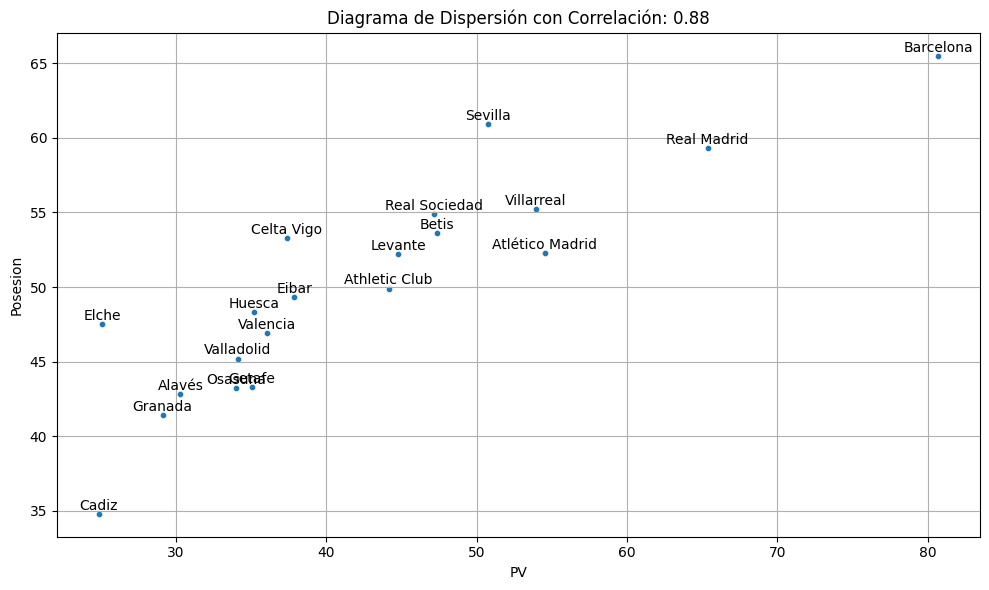

In [245]:
grafico_dispersion_con_correlacion(df_liga20, 'PV', 'Posesion', 20, mostrar_correlacion=True)

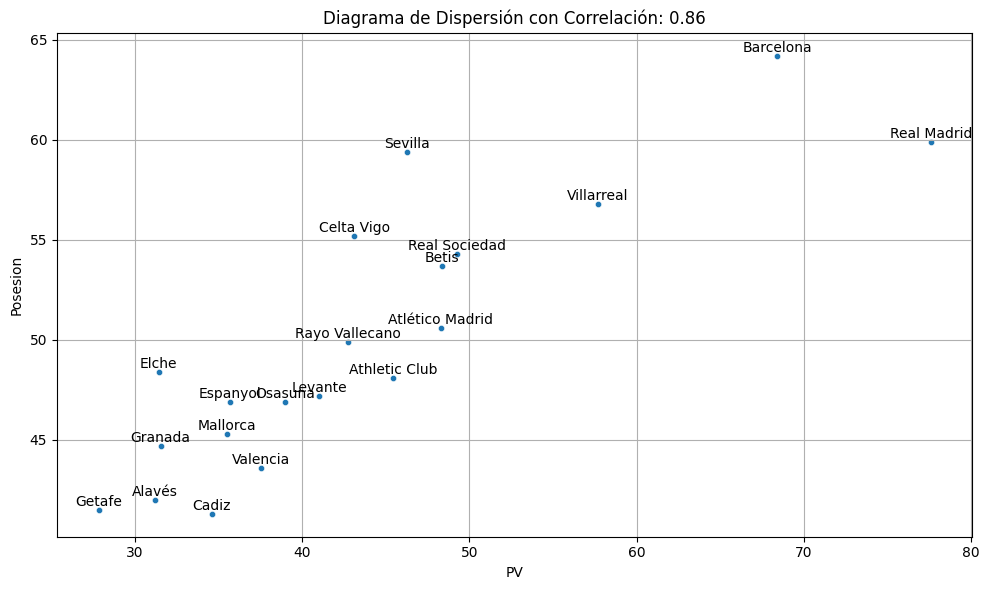

In [246]:
grafico_dispersion_con_correlacion(df_liga21, 'PV', 'Posesion', 20, mostrar_correlacion=True)

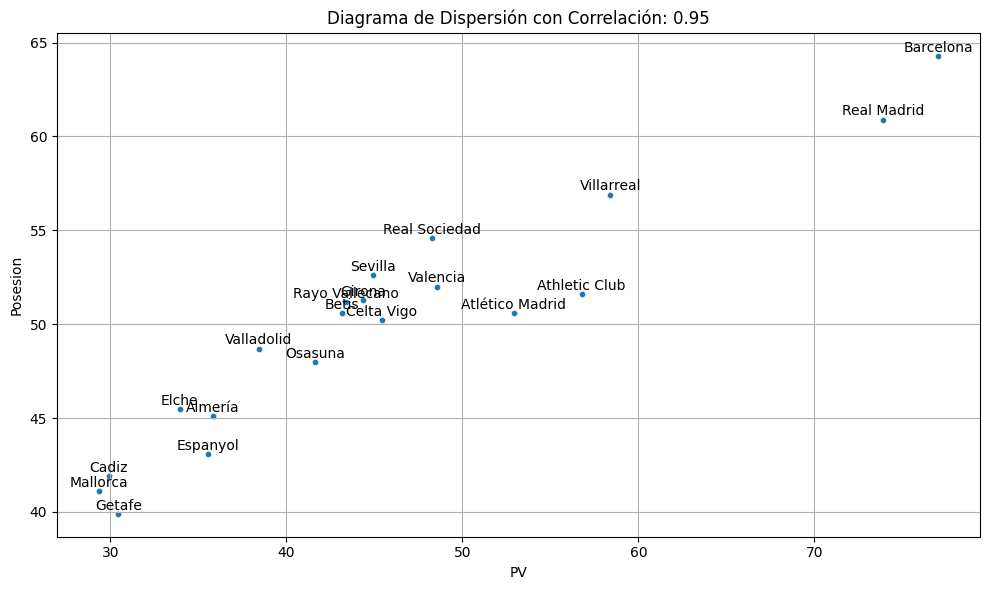

In [247]:
grafico_dispersion_con_correlacion(df_liga22, 'PV', 'Posesion', 20, mostrar_correlacion=True)

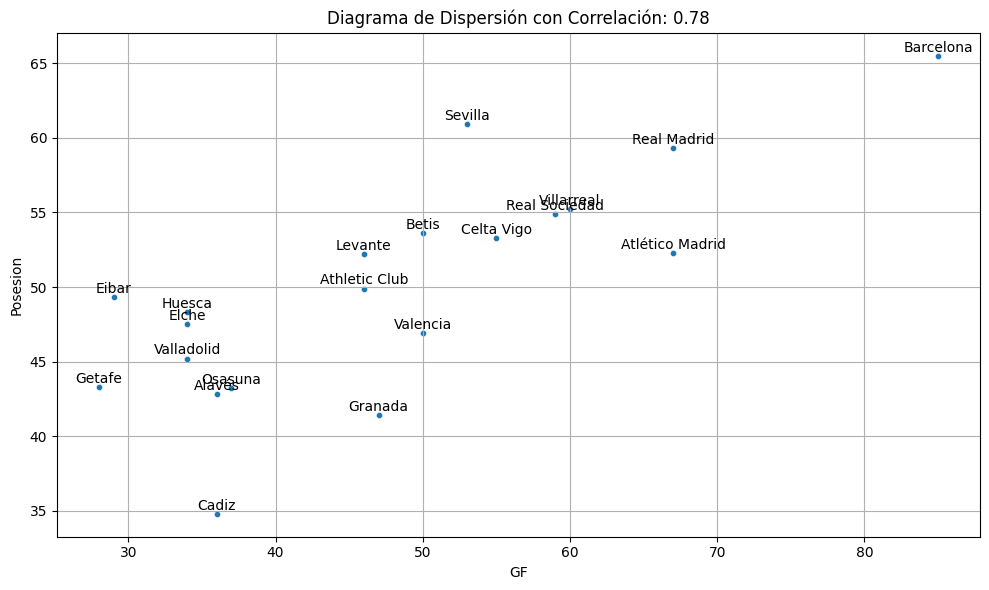

In [248]:
grafico_dispersion_con_correlacion(df_liga20, 'GF', 'Posesion', 20, mostrar_correlacion=True)

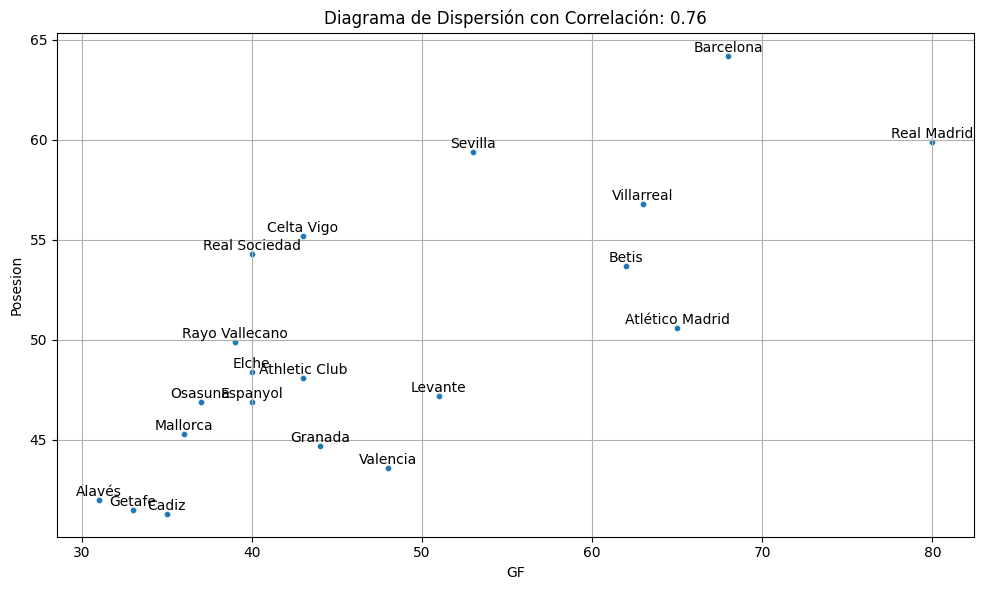

In [249]:
grafico_dispersion_con_correlacion(df_liga21, 'GF', 'Posesion', 20, mostrar_correlacion=True)

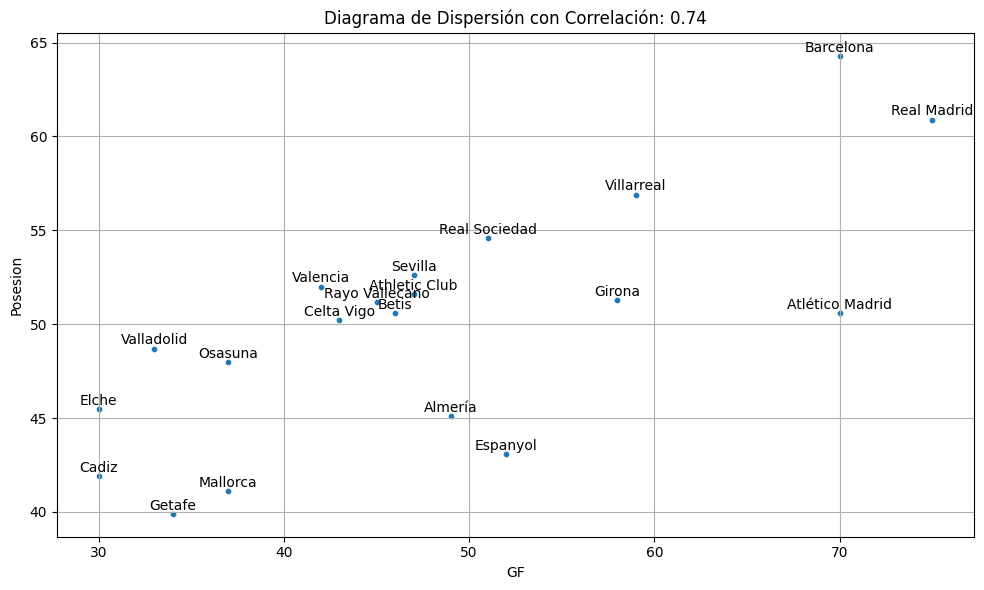

In [250]:
grafico_dispersion_con_correlacion(df_liga22, 'GF', 'Posesion', 20, mostrar_correlacion=True)

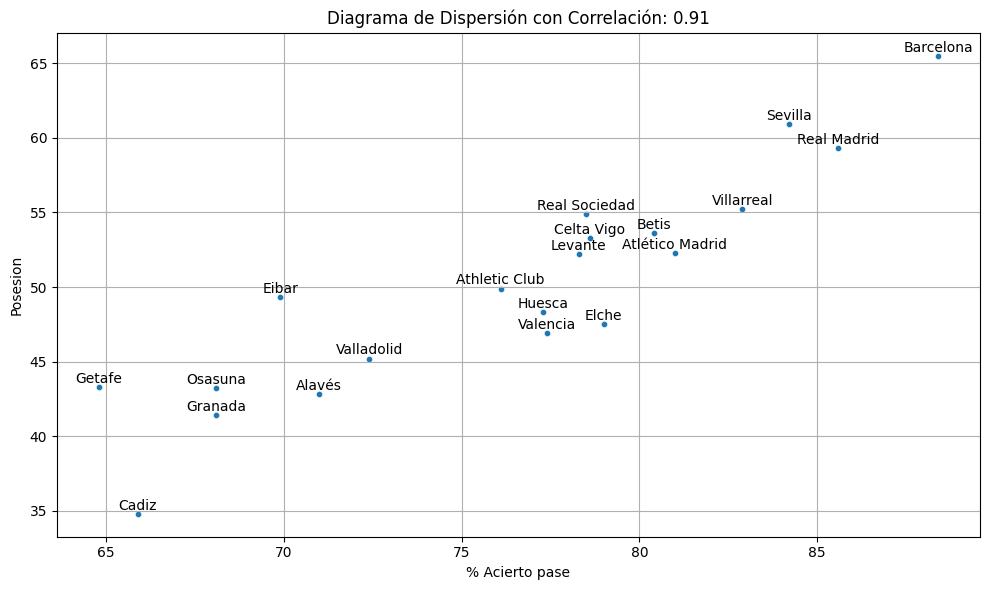

In [251]:
grafico_dispersion_con_correlacion(df_liga20, '% Acierto pase', 'Posesion', 20, mostrar_correlacion=True)

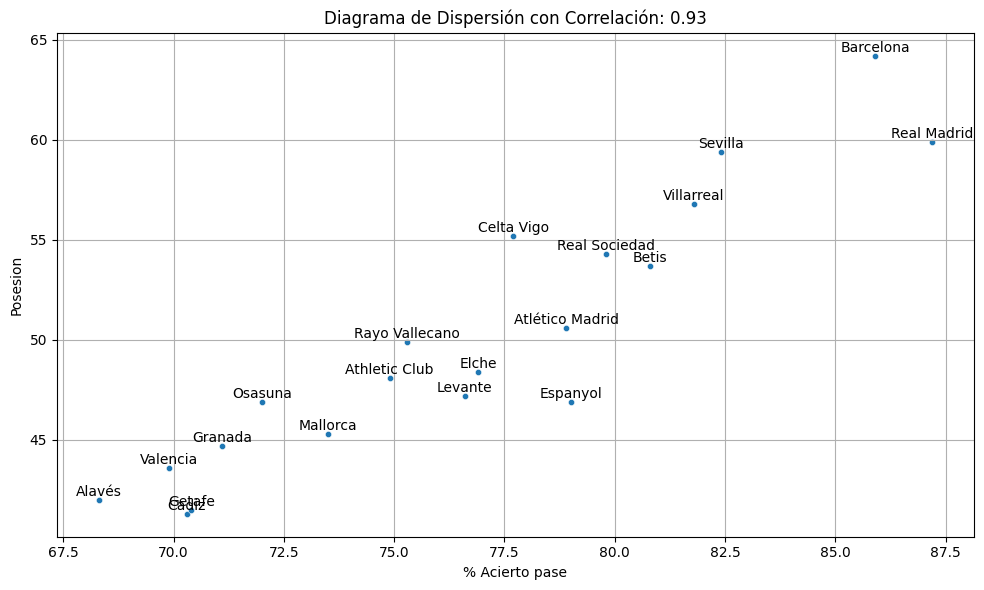

In [252]:
grafico_dispersion_con_correlacion(df_liga21, '% Acierto pase', 'Posesion', 20, mostrar_correlacion=True)

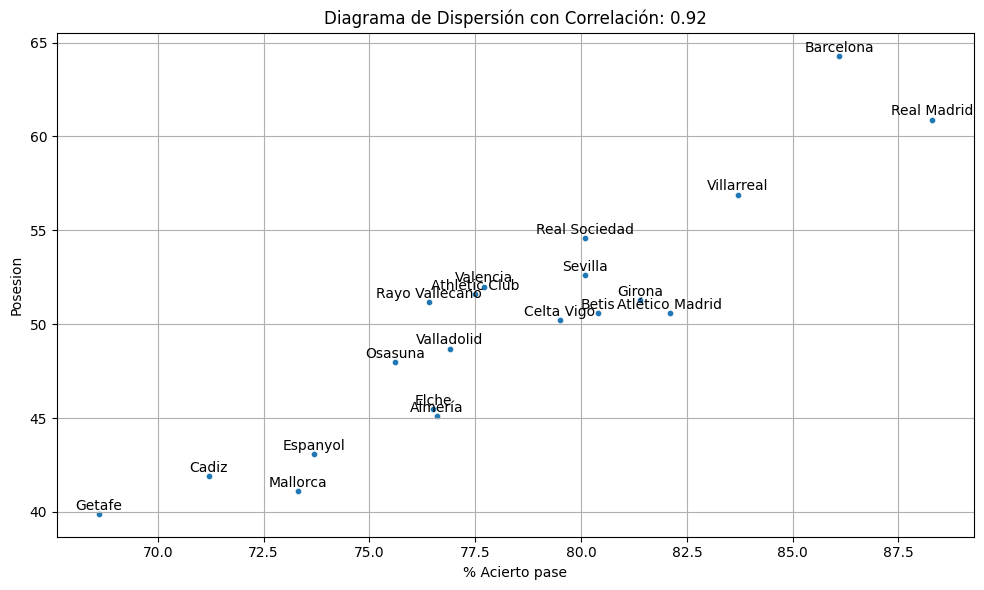

In [253]:
grafico_dispersion_con_correlacion(df_liga22, '% Acierto pase', 'Posesion', 20, mostrar_correlacion=True)

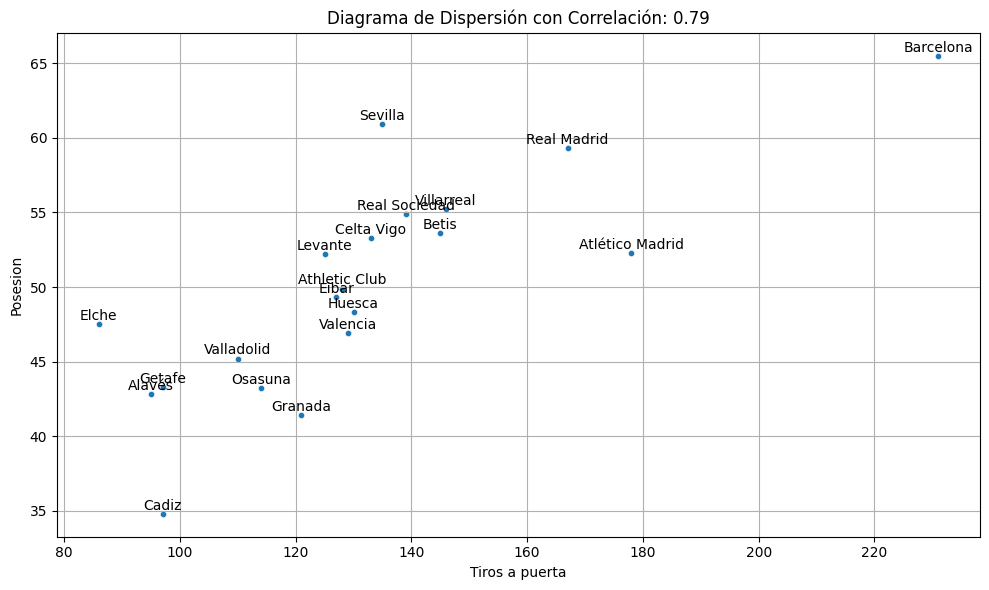

In [254]:
grafico_dispersion_con_correlacion(df_liga20, 'Tiros a puerta', 'Posesion', 20, mostrar_correlacion=True)

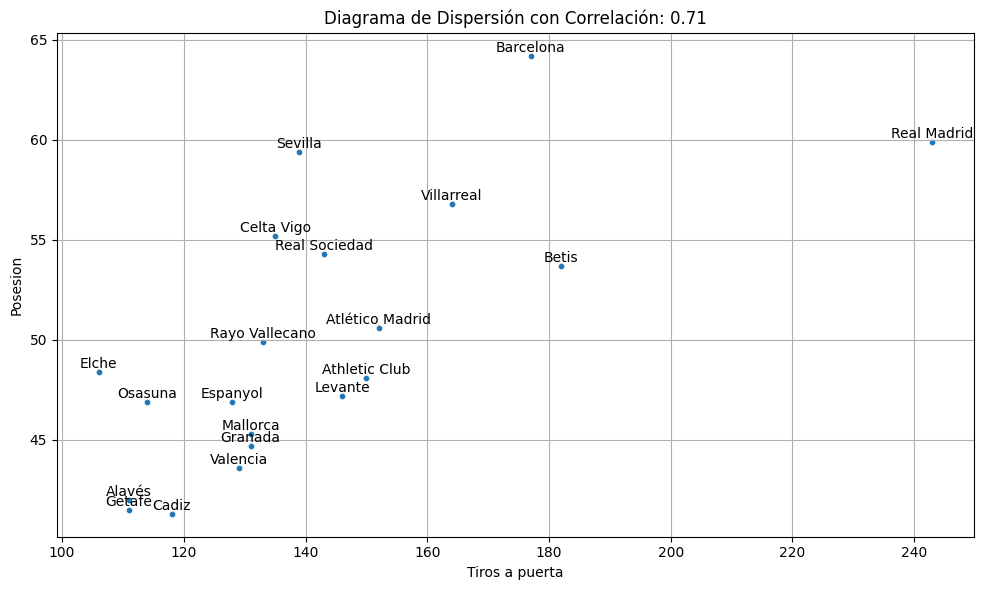

In [255]:
grafico_dispersion_con_correlacion(df_liga21, 'Tiros a puerta', 'Posesion', 20, mostrar_correlacion=True)

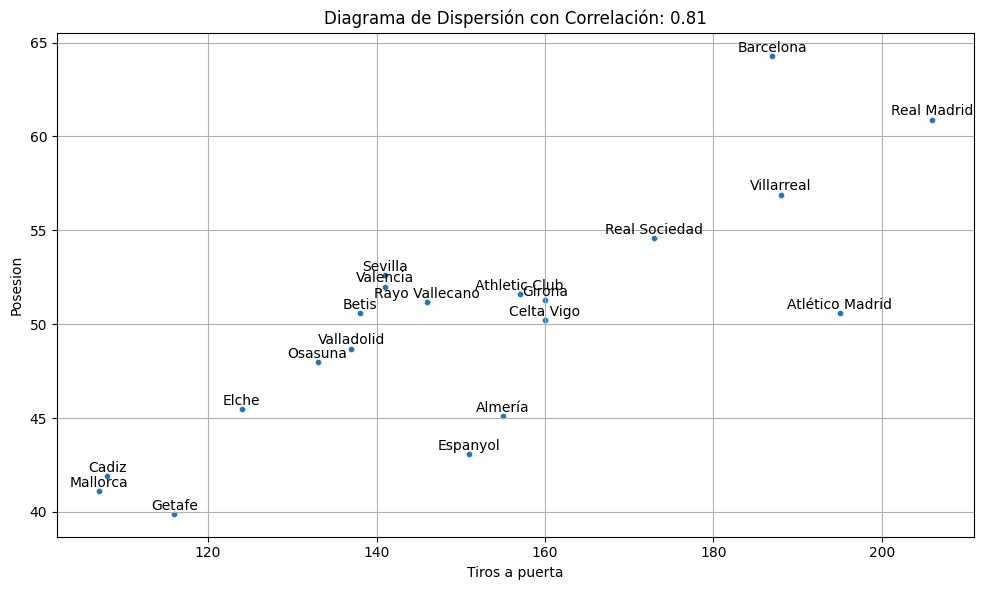

In [256]:
grafico_dispersion_con_correlacion(df_liga22, 'Tiros a puerta', 'Posesion', 20, mostrar_correlacion=True)

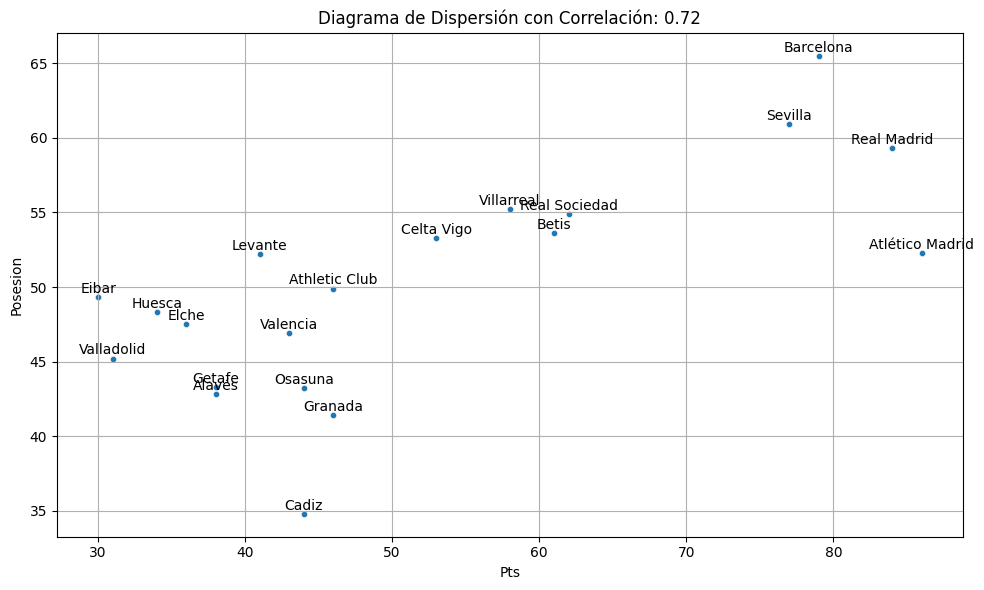

In [257]:
grafico_dispersion_con_correlacion(df_liga20, 'Pts', 'Posesion', 20, mostrar_correlacion=True)

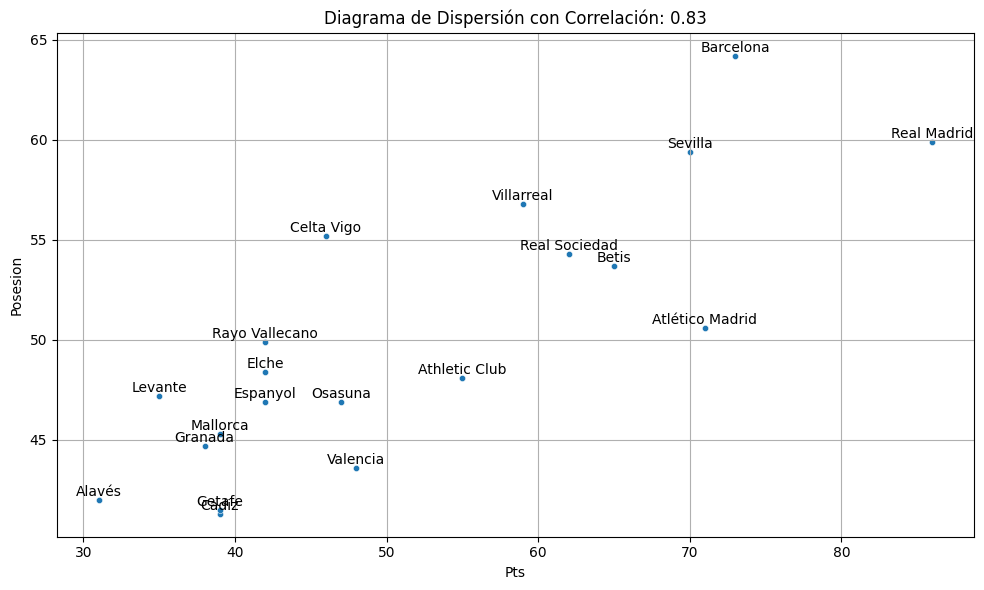

In [258]:
grafico_dispersion_con_correlacion(df_liga21, 'Pts', 'Posesion', 20, mostrar_correlacion=True)

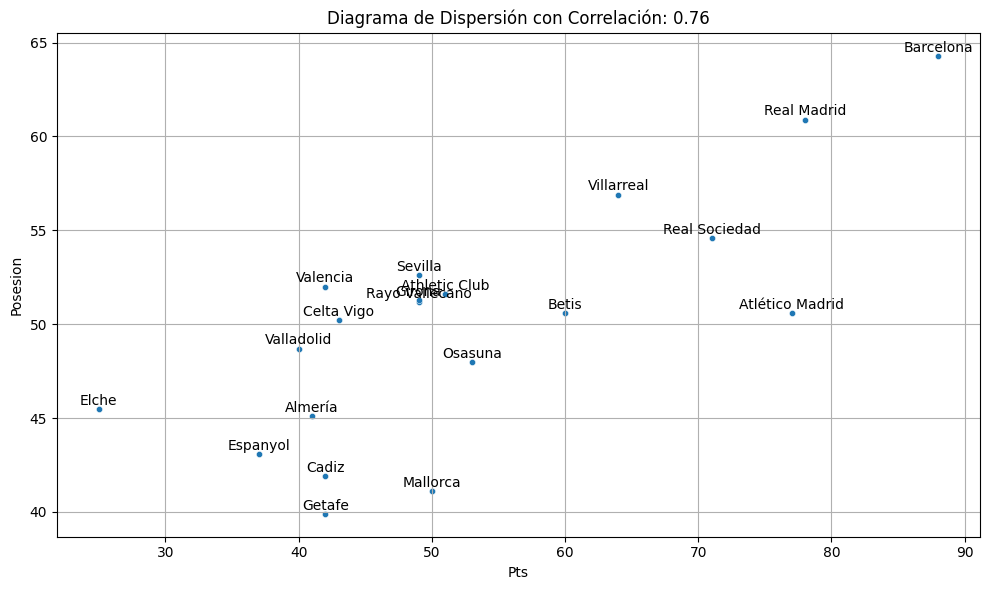

In [259]:
grafico_dispersion_con_correlacion(df_liga22, 'Pts', 'Posesion', 20, mostrar_correlacion=True)

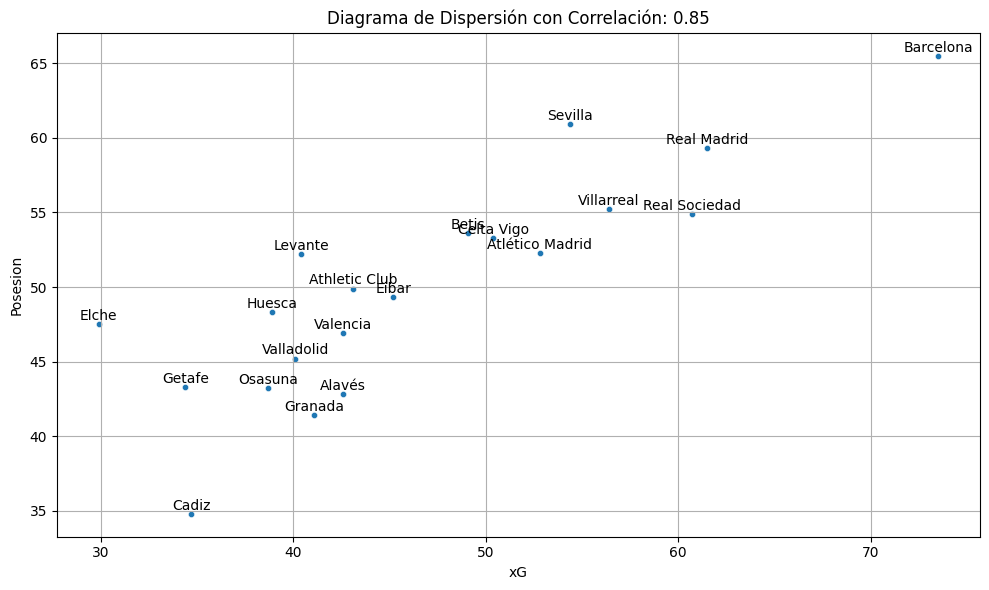

In [260]:
grafico_dispersion_con_correlacion(df_liga20, 'xG', 'Posesion', 20, mostrar_correlacion=True)

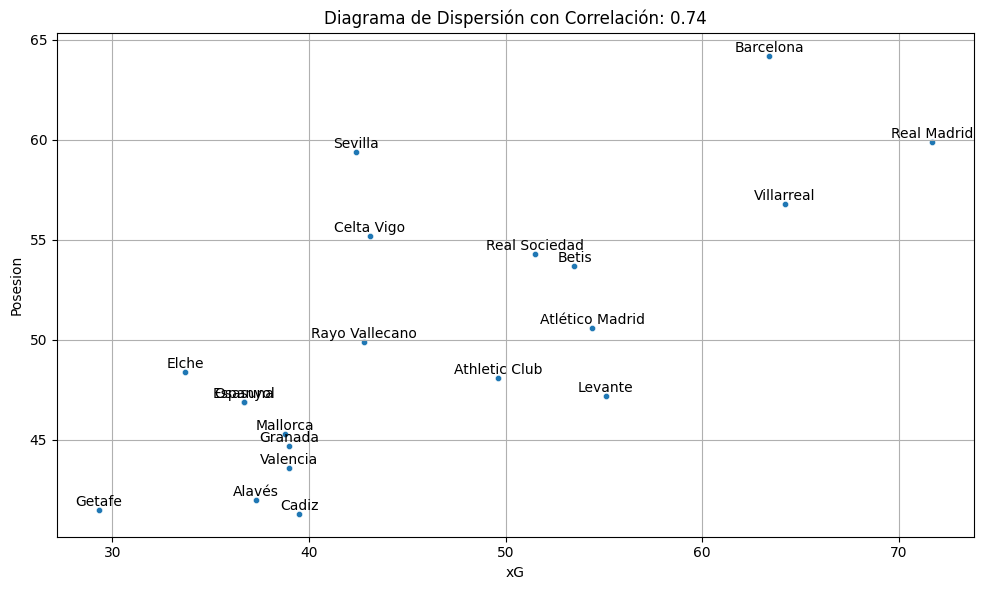

In [261]:
grafico_dispersion_con_correlacion(df_liga21, 'xG', 'Posesion', 20, mostrar_correlacion=True)

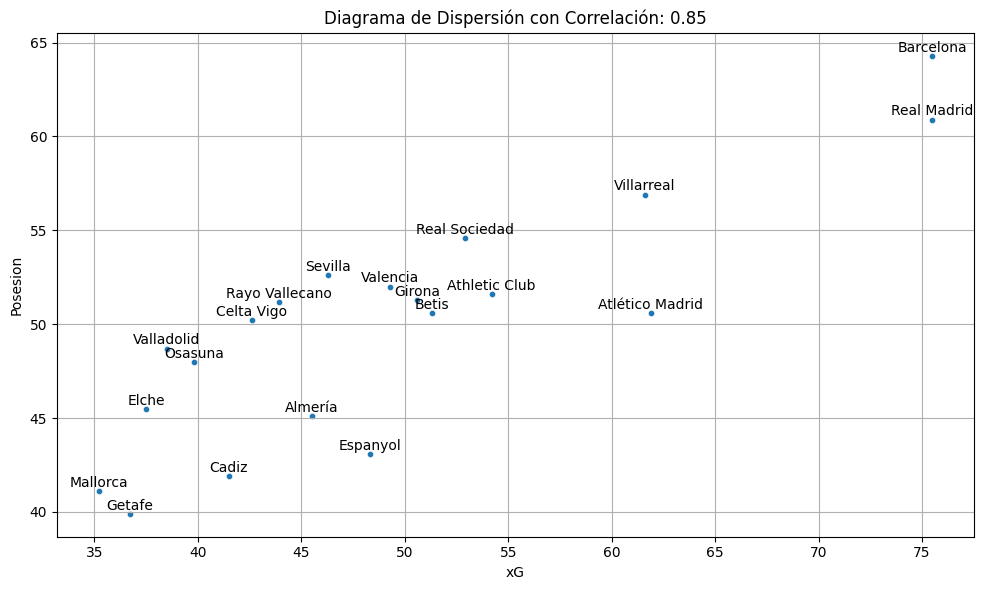

In [262]:
grafico_dispersion_con_correlacion(df_liga22, 'xG', 'Posesion', 20, mostrar_correlacion=True)

In [400]:
# Análisis multivariante

In [263]:
df_20 = df_liga20[['Clasificacion', 'Equipo', 'Posesion', 'PV']]

In [264]:
df_21 = df_liga21[['Clasificacion', 'Equipo', 'Posesion', 'PV']]

In [265]:
df_22 = df_liga22[['Clasificacion', 'Equipo', 'Posesion', 'PV']]

In [266]:
df_20.sort_values(by='Clasificacion')

Clasificacion           Equipo  Posesion     PV
2               1  Atlético Madrid      52.3  54.51
14              2      Real Madrid      59.3  65.36
3               3        Barcelona      65.5  80.69
16              4          Sevilla      60.9  50.77
15              5    Real Sociedad      54.9  47.18
4               6            Betis      53.6  47.36
19              7       Villarreal      55.2  53.94
6               8       Celta Vigo      53.3  37.35
10              9          Granada      41.4  29.11
1              10    Athletic Club      49.9  44.14
13             11          Osasuna      43.2  34.01
5              12            Cadiz      34.8  24.86
17             13         Valencia      46.9  36.02
12             14          Levante      52.2  44.76
9              15           Getafe      43.3  35.03
0              16           Alavés      42.8  30.29
8              17            Elche      47.5  25.07
11             18           Huesca      48.3  35.17
18             19       Valladolid      45.2  34.10
7              20            Eibar      49.3  37.86

In [267]:
df_21.sort_values(by='Clasificacion')

Clasificacion           Equipo  Posesion     PV
15              1      Real Madrid      59.9  77.60
3               2        Barcelona      64.2  68.40
2               3  Atlético Madrid      50.6  48.29
17              4          Sevilla      59.4  46.26
4               5            Betis      53.7  48.36
16              6    Real Sociedad      54.3  49.25
19              7       Villarreal      56.8  57.68
1               8    Athletic Club      48.1  45.42
18              9         Valencia      43.6  37.55
13             10          Osasuna      46.9  39.00
6              11       Celta Vigo      55.2  43.11
14             12   Rayo Vallecano      49.9  42.75
7              13            Elche      48.4  31.41
8              14         Espanyol      46.9  35.71
9              15           Getafe      41.5  27.82
12             16         Mallorca      45.3  35.50
5              17            Cadiz      41.3  34.58
10             18          Granada      44.7  31.54
11             19          Levante      47.2  41.03
0              20           Alavés      42.0  31.19

In [268]:
df_22.sort_values(by='Clasificacion')

Clasificacion           Equipo  Posesion     PV
3               1        Barcelona      64.3  77.02
14              2      Real Madrid      60.9  73.90
2               3  Atlético Madrid      50.6  52.91
15              4    Real Sociedad      54.6  48.24
19              5       Villarreal      56.9  58.39
4               6            Betis      50.6  43.16
12              7          Osasuna      48.0  41.62
1               8    Athletic Club      51.6  56.77
11              9         Mallorca      41.1  29.34
10             10           Girona      51.3  44.34
13             11   Rayo Vallecano      51.2  43.36
16             12          Sevilla      52.6  44.90
6              13       Celta Vigo      50.2  45.40
5              14            Cadiz      41.9  29.90
9              15           Getafe      39.9  30.44
17             16         Valencia      52.0  48.53
0              17          Almería      45.1  35.82
18             18       Valladolid      48.7  38.43
8              19         Espanyol      43.1  35.53
7              20            Elche      45.5  33.93

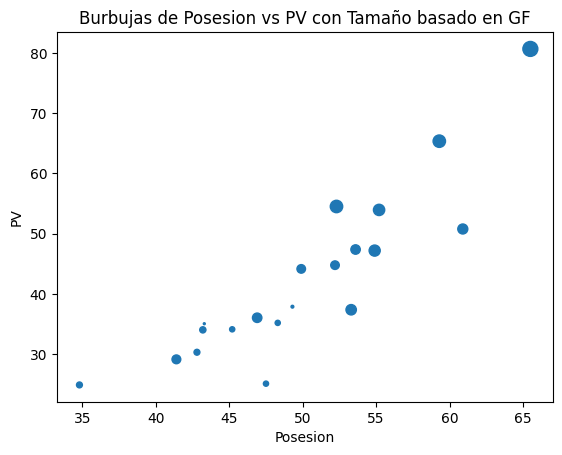

In [270]:
bubble_plot(df_liga20, 'Posesion', 'PV', 'GF', scale = 0.5) 

In [271]:
matriz20 = df_liga20.corr(numeric_only = True)
matriz20

Clasificacion        GF        GC       Pts        xG  \
Clasificacion             1.000000 -0.870653  0.701016 -0.952726 -0.763975   
GF                       -0.870653  1.000000 -0.605554  0.877558  0.898322   
GC                        0.701016 -0.605554  1.000000 -0.809297 -0.639964   
Pts                      -0.952726  0.877558 -0.809297  1.000000  0.807467   
xG                       -0.763975  0.898322 -0.639964  0.807467  1.000000   
xGA                       0.610539 -0.496191  0.891191 -0.669655 -0.651481   
Posesion                 -0.627603  0.777319 -0.649708  0.722833  0.849107   
Tiros a puerta           -0.711643  0.899643 -0.614377  0.778204  0.885415   
% Acierto pase           -0.624718  0.800063 -0.572291  0.722171  0.747350   
ACG                      -0.862518  0.984297 -0.611436  0.876932  0.884745   
PV                       -0.722471  0.872800 -0.736964  0.809205  0.908051   
Diferencia posesion      -0.665208  0.786451 -0.670009  0.727215  0.781950   

                          xGA  Posesion  Tiros a puerta  % Acierto pase  \
Clasificacion        0.610539 -0.627603       -0.711643       -0.624718   
GF                  -0.496191  0.777319        0.899643        0.800063   
GC                   0.891191 -0.649708       -0.614377       -0.572291   
Pts                 -0.669655  0.722833        0.778204        0.722171   
xG                  -0.651481  0.849107        0.885415        0.747350   
xGA                  1.000000 -0.617054       -0.562342       -0.424793   
Posesion            -0.617054  1.000000        0.792334        0.910970   
Tiros a puerta      -0.562342  0.792334        1.000000        0.738261   
% Acierto pase      -0.424793  0.910970        0.738261        1.000000   
ACG                 -0.489538  0.792771        0.886855        0.830633   
PV                  -0.697856  0.883599        0.929469        0.793770   
Diferencia posesion -0.632818  0.604904        0.869342        0.532067   

                          ACG        PV  Diferencia posesion  
Clasificacion       -0.862518 -0.722471            -0.665208  
GF                   0.984297  0.872800             0.786451  
GC                  -0.611436 -0.736964            -0.670009  
Pts                  0.876932  0.809205             0.727215  
xG                   0.884745  0.908051             0.781950  
xGA                 -0.489538 -0.697856            -0.632818  
Posesion             0.792771  0.883599             0.604904  
Tiros a puerta       0.886855  0.929469             0.869342  
% Acierto pase       0.830633  0.793770             0.532067  
ACG                  1.000000  0.854985             0.742282  
PV                   0.854985  1.000000             0.907355  
Diferencia posesion  0.742282  0.907355             1.000000

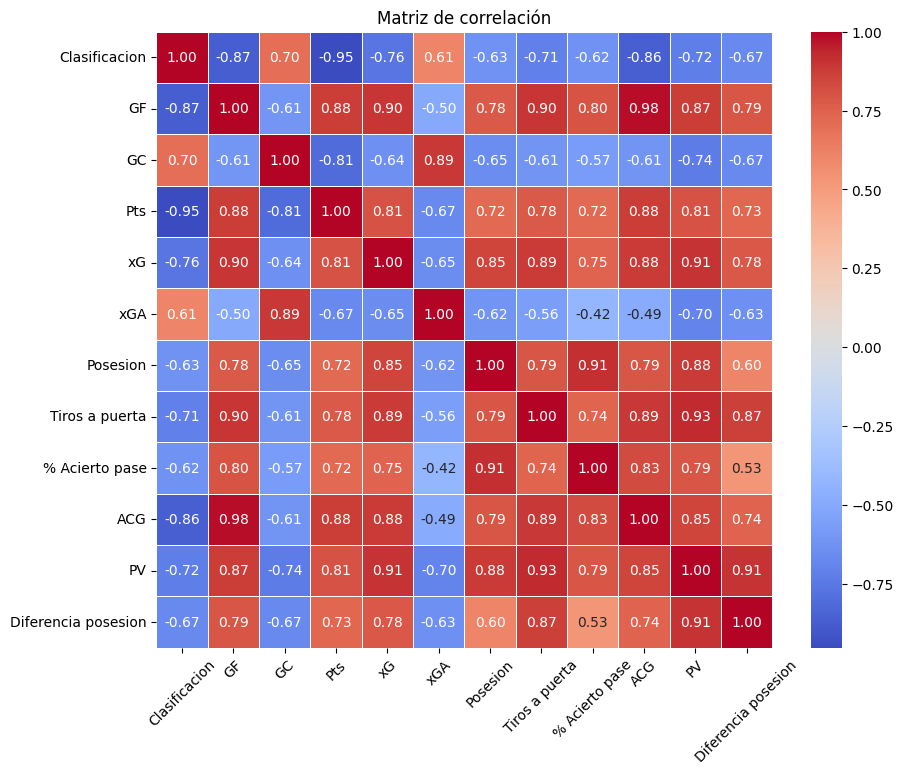

In [272]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz20, annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

plt.title('Matriz de correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()
            

In [273]:
matriz21 = df_liga21.corr(numeric_only = True)
matriz21

Clasificacion        GF        GC       Pts        xG  \
Clasificacion             1.000000 -0.764084  0.840460 -0.958804 -0.657774   
GF                       -0.764084  1.000000 -0.488195  0.852049  0.878733   
GC                        0.840460 -0.488195  1.000000 -0.798109 -0.417680   
Pts                      -0.958804  0.852049 -0.798109  1.000000  0.756321   
xG                       -0.657774  0.878733 -0.417680  0.756321  1.000000   
xGA                       0.767801 -0.423227  0.771322 -0.710332 -0.408836   
Posesion                 -0.808277  0.755805 -0.668299  0.825884  0.744696   
Tiros a puerta           -0.690536  0.894555 -0.499714  0.811511  0.900140   
% Acierto pase           -0.775450  0.810333 -0.615963  0.832436  0.780915   
ACG                      -0.809630  0.985834 -0.548337  0.882402  0.867364   
PV                       -0.806432  0.873870 -0.611083  0.874526  0.927760   
Diferencia posesion      -0.628573  0.784259 -0.428367  0.725144  0.882196   

                          xGA  Posesion  Tiros a puerta  % Acierto pase  \
Clasificacion        0.767801 -0.808277       -0.690536       -0.775450   
GF                  -0.423227  0.755805        0.894555        0.810333   
GC                   0.771322 -0.668299       -0.499714       -0.615963   
Pts                 -0.710332  0.825884        0.811511        0.832436   
xG                  -0.408836  0.744696        0.900140        0.780915   
xGA                  1.000000 -0.528976       -0.384315       -0.478519   
Posesion            -0.528976  1.000000        0.708784        0.931410   
Tiros a puerta      -0.384315  0.708784        1.000000        0.781661   
% Acierto pase      -0.478519  0.931410        0.781661        1.000000   
ACG                 -0.478042  0.796637        0.864312        0.833670   
PV                  -0.529882  0.861802        0.913439        0.857779   
Diferencia posesion -0.414835  0.554729        0.889549        0.607040   

                          ACG        PV  Diferencia posesion  
Clasificacion       -0.809630 -0.806432            -0.628573  
GF                   0.985834  0.873870             0.784259  
GC                  -0.548337 -0.611083            -0.428367  
Pts                  0.882402  0.874526             0.725144  
xG                   0.867364  0.927760             0.882196  
xGA                 -0.478042 -0.529882            -0.414835  
Posesion             0.796637  0.861802             0.554729  
Tiros a puerta       0.864312  0.913439             0.889549  
% Acierto pase       0.833670  0.857779             0.607040  
ACG                  1.000000  0.898596             0.789746  
PV                   0.898596  1.000000             0.900110  
Diferencia posesion  0.789746  0.900110             1.000000

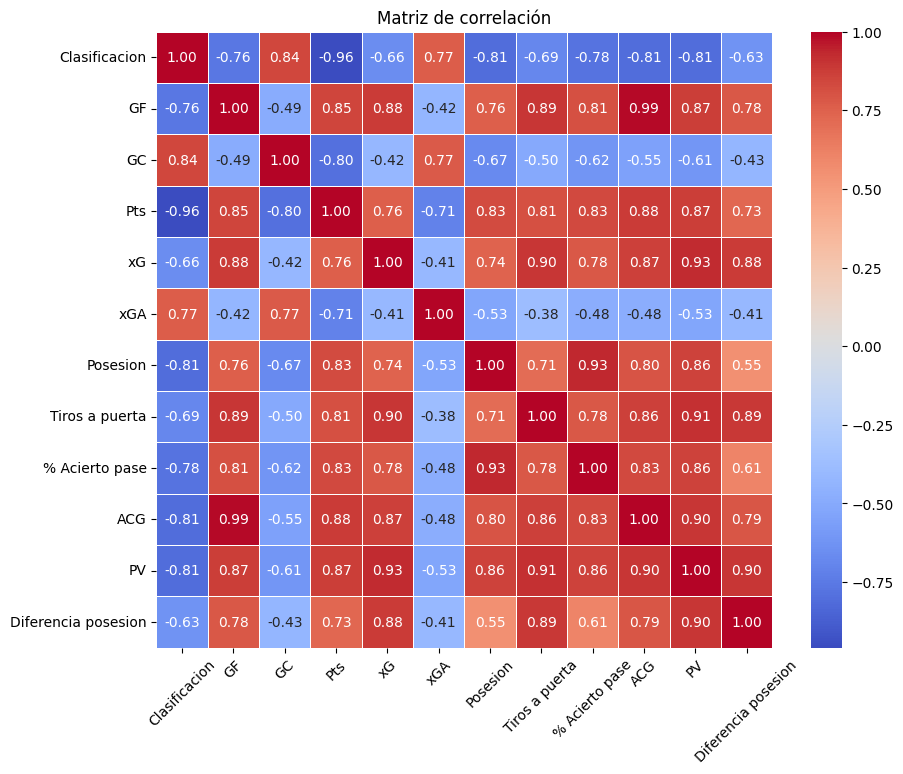

In [274]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz21, annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

plt.title('Matriz de correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

In [275]:
matriz22 = df_liga22.corr(numeric_only = True)
matriz22

Clasificacion        GF        GC       Pts        xG  \
Clasificacion             1.000000 -0.698567  0.898156 -0.941856 -0.730898   
GF                       -0.698567  1.000000 -0.546197  0.809467  0.922284   
GC                        0.898156 -0.546197  1.000000 -0.885710 -0.656999   
Pts                      -0.941856  0.809467 -0.885710  1.000000  0.844477   
xG                       -0.730898  0.922284 -0.656999  0.844477  1.000000   
xGA                       0.787674 -0.529520  0.880184 -0.761909 -0.578310   
Posesion                 -0.690234  0.743569 -0.616131  0.758572  0.853394   
Tiros a puerta           -0.637387  0.922542 -0.481111  0.745519  0.884465   
% Acierto pase           -0.678639  0.829492 -0.512245  0.737355  0.855133   
ACG                      -0.698229  0.972787 -0.535395  0.803125  0.903150   
PV                       -0.731032  0.821108 -0.689170  0.805825  0.934247   
Diferencia posesion      -0.703904  0.817234 -0.692593  0.777837  0.923659   

                          xGA  Posesion  Tiros a puerta  % Acierto pase  \
Clasificacion        0.787674 -0.690234       -0.637387       -0.678639   
GF                  -0.529520  0.743569        0.922542        0.829492   
GC                   0.880184 -0.616131       -0.481111       -0.512245   
Pts                 -0.761909  0.758572        0.745519        0.737355   
xG                  -0.578310  0.853394        0.884465        0.855133   
xGA                  1.000000 -0.566453       -0.509416       -0.430893   
Posesion            -0.566453  1.000000        0.806623        0.922063   
Tiros a puerta      -0.509416  0.806623        1.000000        0.866319   
% Acierto pase      -0.430893  0.922063        0.866319        1.000000   
ACG                 -0.502968  0.753187        0.885968        0.841508   
PV                  -0.658285  0.945369        0.851259        0.880421   
Diferencia posesion -0.680059  0.820232        0.817263        0.771625   

                          ACG        PV  Diferencia posesion  
Clasificacion       -0.698229 -0.731032            -0.703904  
GF                   0.972787  0.821108             0.817234  
GC                  -0.535395 -0.689170            -0.692593  
Pts                  0.803125  0.805825             0.777837  
xG                   0.903150  0.934247             0.923659  
xGA                 -0.502968 -0.658285            -0.680059  
Posesion             0.753187  0.945369             0.820232  
Tiros a puerta       0.885968  0.851259             0.817263  
% Acierto pase       0.841508  0.880421             0.771625  
ACG                  1.000000  0.832228             0.828681  
PV                   0.832228  1.000000             0.961905  
Diferencia posesion  0.828681  0.961905             1.000000

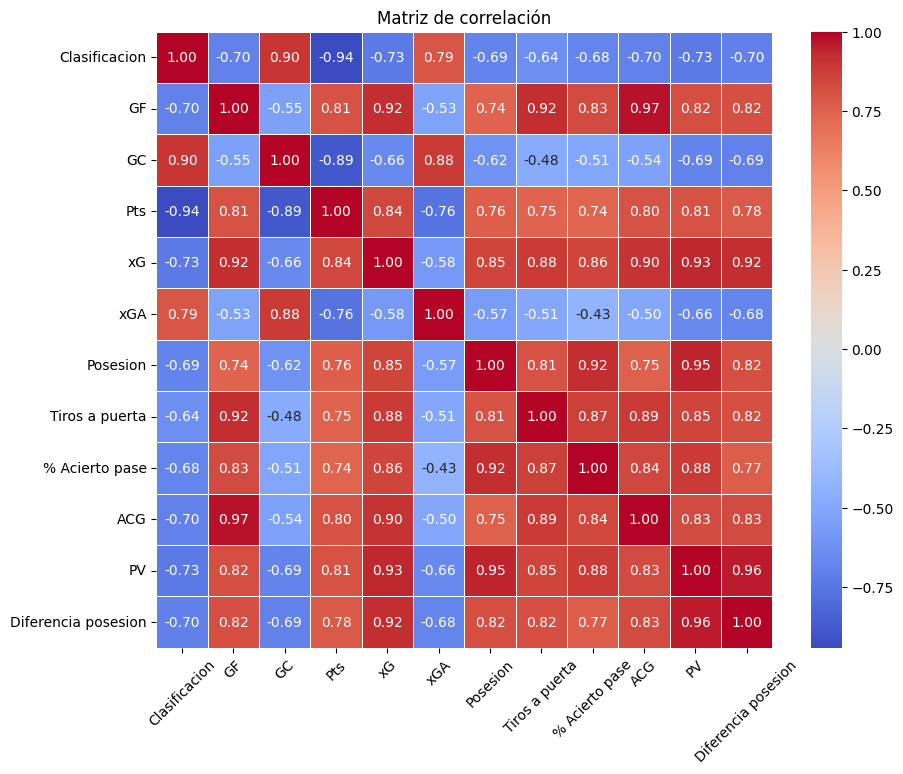

In [276]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz22, annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

plt.title('Matriz de correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

In [279]:
df_liga20[['Posesion', 'PV', 'Pts', 'xG', 'xGA', 'GF', 'GC', 'ACG', 'Tiros a puerta', '% Acierto pase']]

Posesion     PV  Pts    xG   xGA  GF  GC  ACG  Tiros a puerta  \
7       49.3  37.86   30  45.2  45.7  29  52   48             127   
18      45.2  34.10   31  40.1  52.9  34  57   56             110   
11      48.3  35.17   34  38.9  48.4  34  53   56             130   
8       47.5  25.07   36  29.9  60.9  34  55   54              86   
0       42.8  30.29   38  42.6  49.9  36  57   59              95   
9       43.3  35.03   38  34.4  40.3  28  43   38              97   
12      52.2  44.76   41  40.4  53.4  46  57   80             125   
17      46.9  36.02   43  42.6  52.2  50  53   86             129   
5       34.8  24.86   44  34.7  55.4  36  58   53              97   
13      43.2  34.01   44  38.7  47.8  37  48   61             114   
1       49.9  44.14   46  43.1  37.7  46  42   73             128   
10      41.4  29.11   46  41.1  56.2  47  65   69             121   
6       53.3  37.35   53  50.4  51.0  55  57   98             133   
19      55.2  53.94   58  56.4  42.5  60  44   99             146   
4       53.6  47.36   61  49.1  46.8  50  50   91             145   
15      54.9  47.18   62  60.7  39.2  59  38  100             139   
16      60.9  50.77   77  54.4  34.8  53  33   87             135   
3       65.5  80.69   79  73.5  40.8  85  38  136             231   
14      59.3  65.36   84  61.5  37.6  67  28  114             167   
2       52.3  54.51   86  52.8  37.1  67  25  120             178   

    % Acierto pase  
7             69.9  
18            72.4  
11            77.3  
8             79.0  
0             71.0  
9             64.8  
12            78.3  
17            77.4  
5             65.9  
13            68.1  
1             76.1  
10            68.1  
6             78.6  
19            82.9  
4             80.4  
15            78.5  
16            84.2  
3             88.4  
14            85.6  
2             81.0

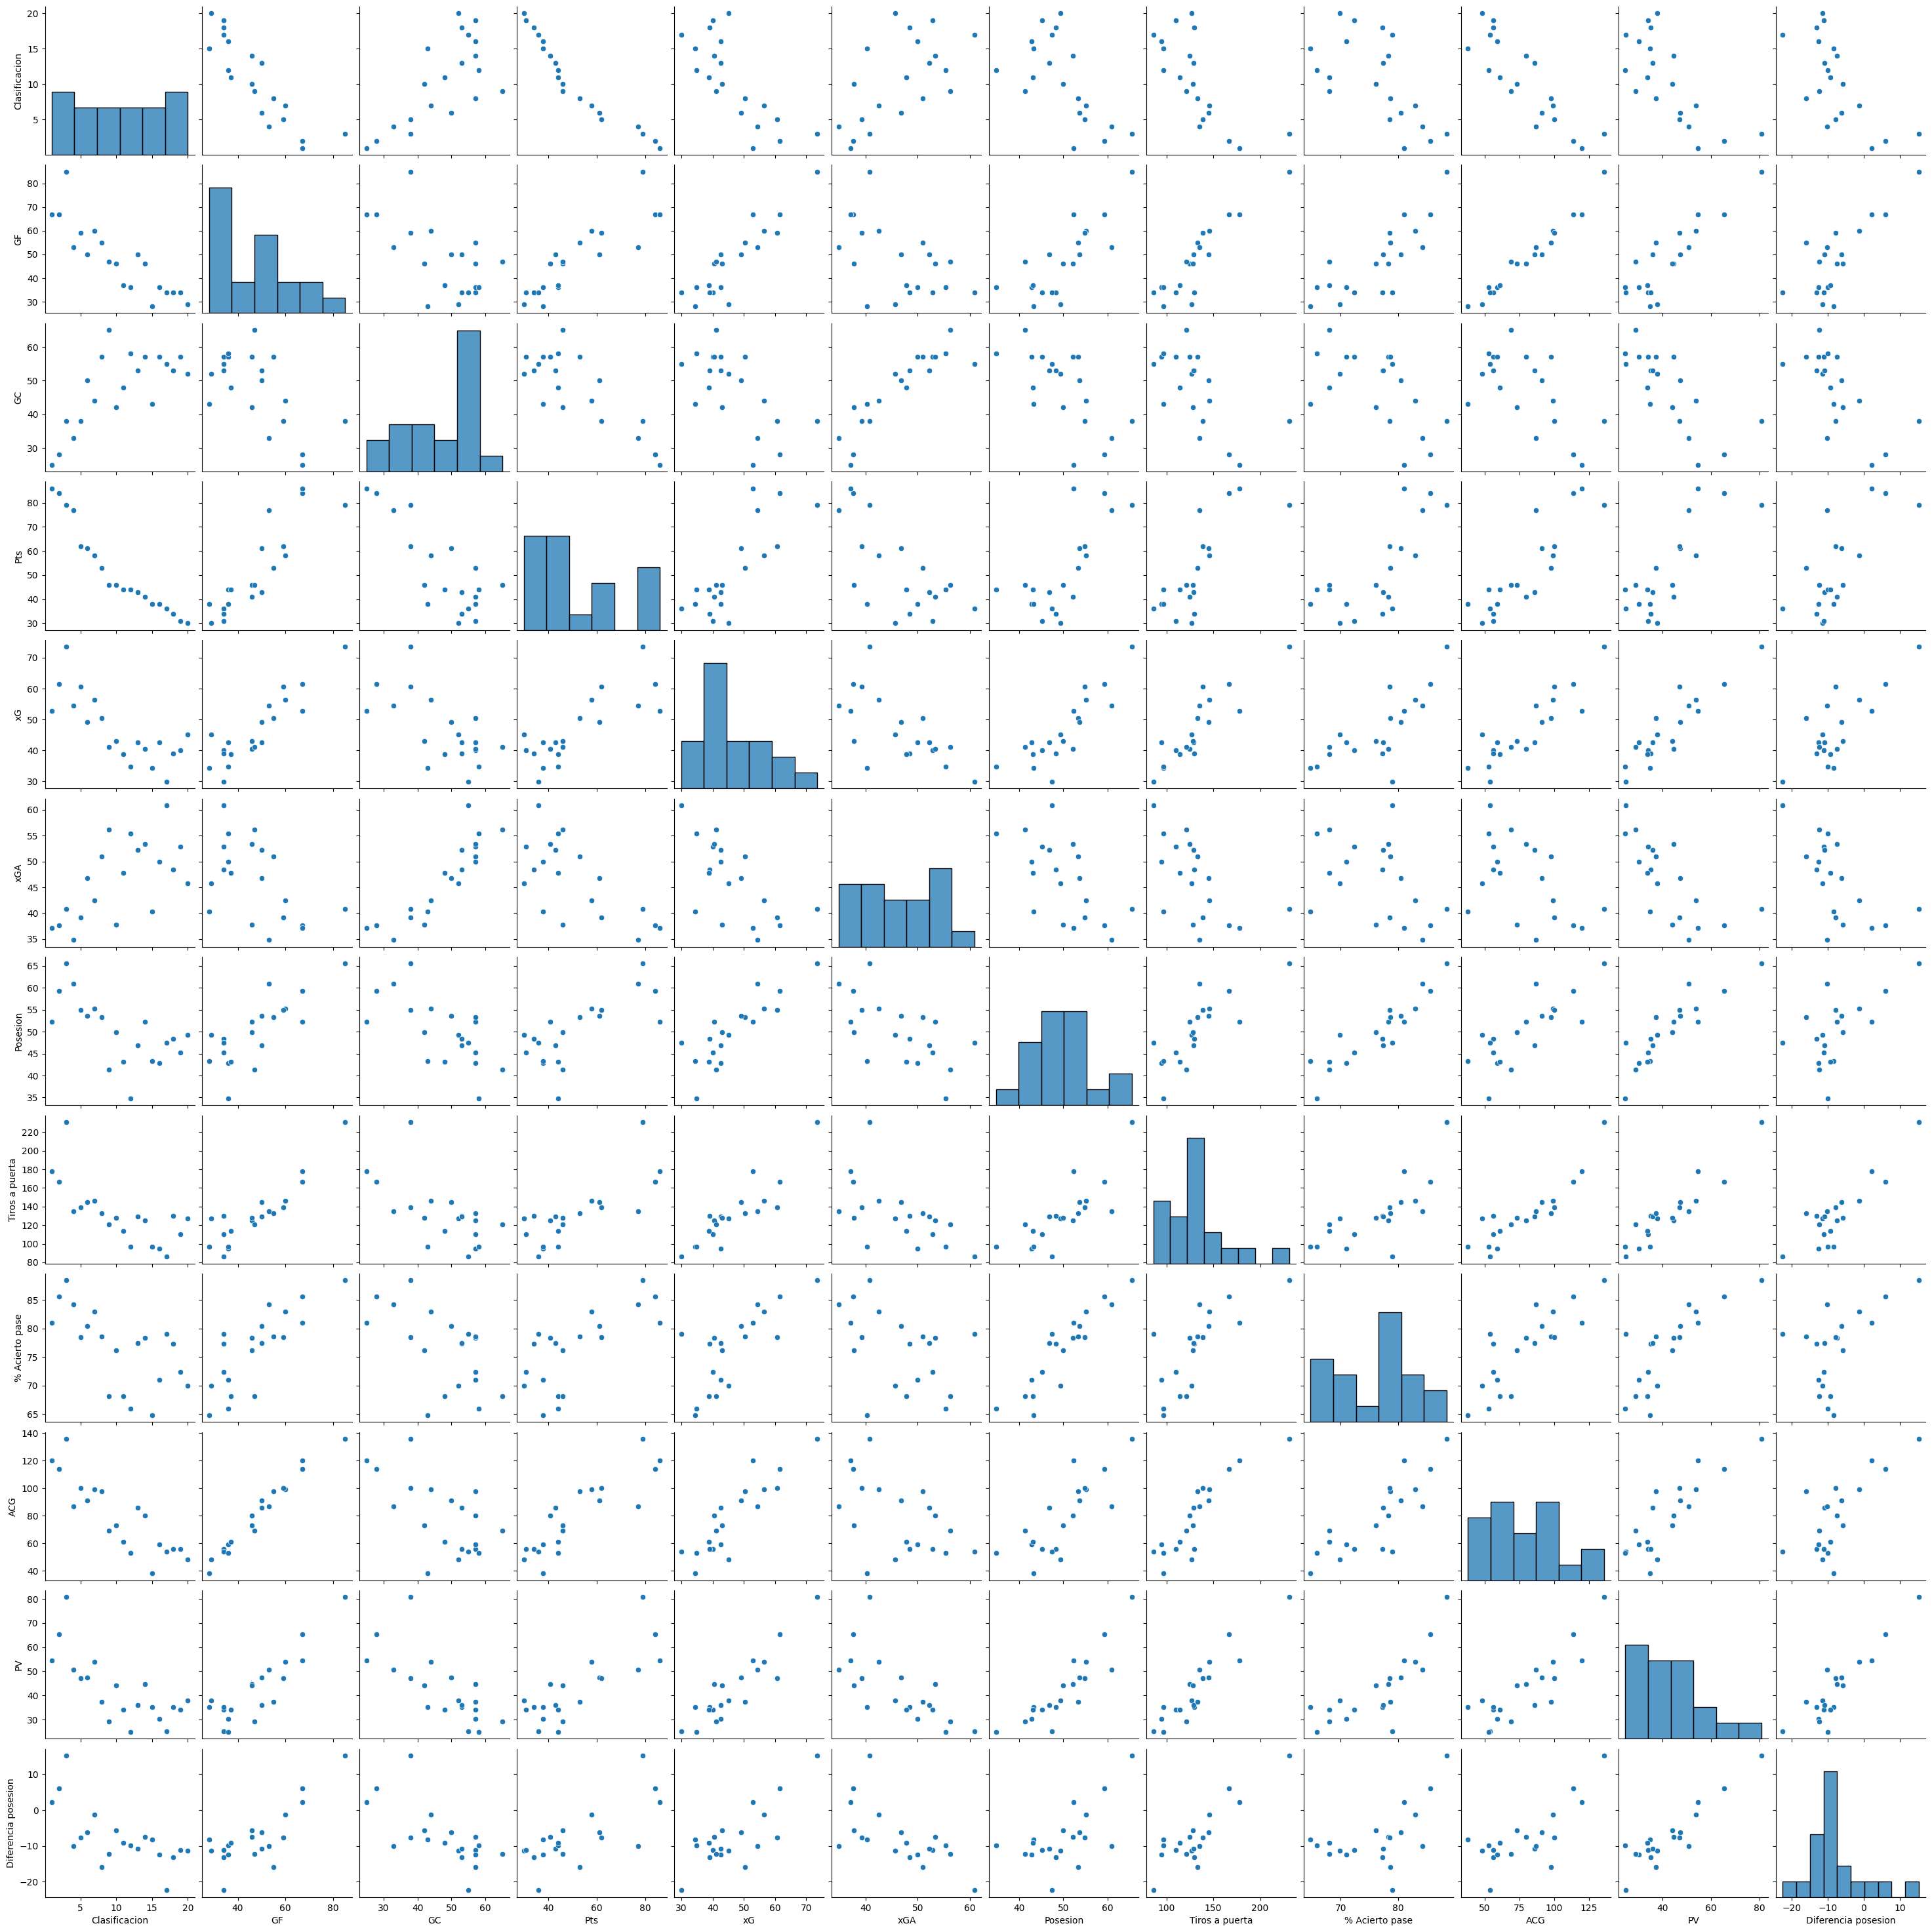

In [280]:
sns.pairplot(df_liga20)
plt.show()

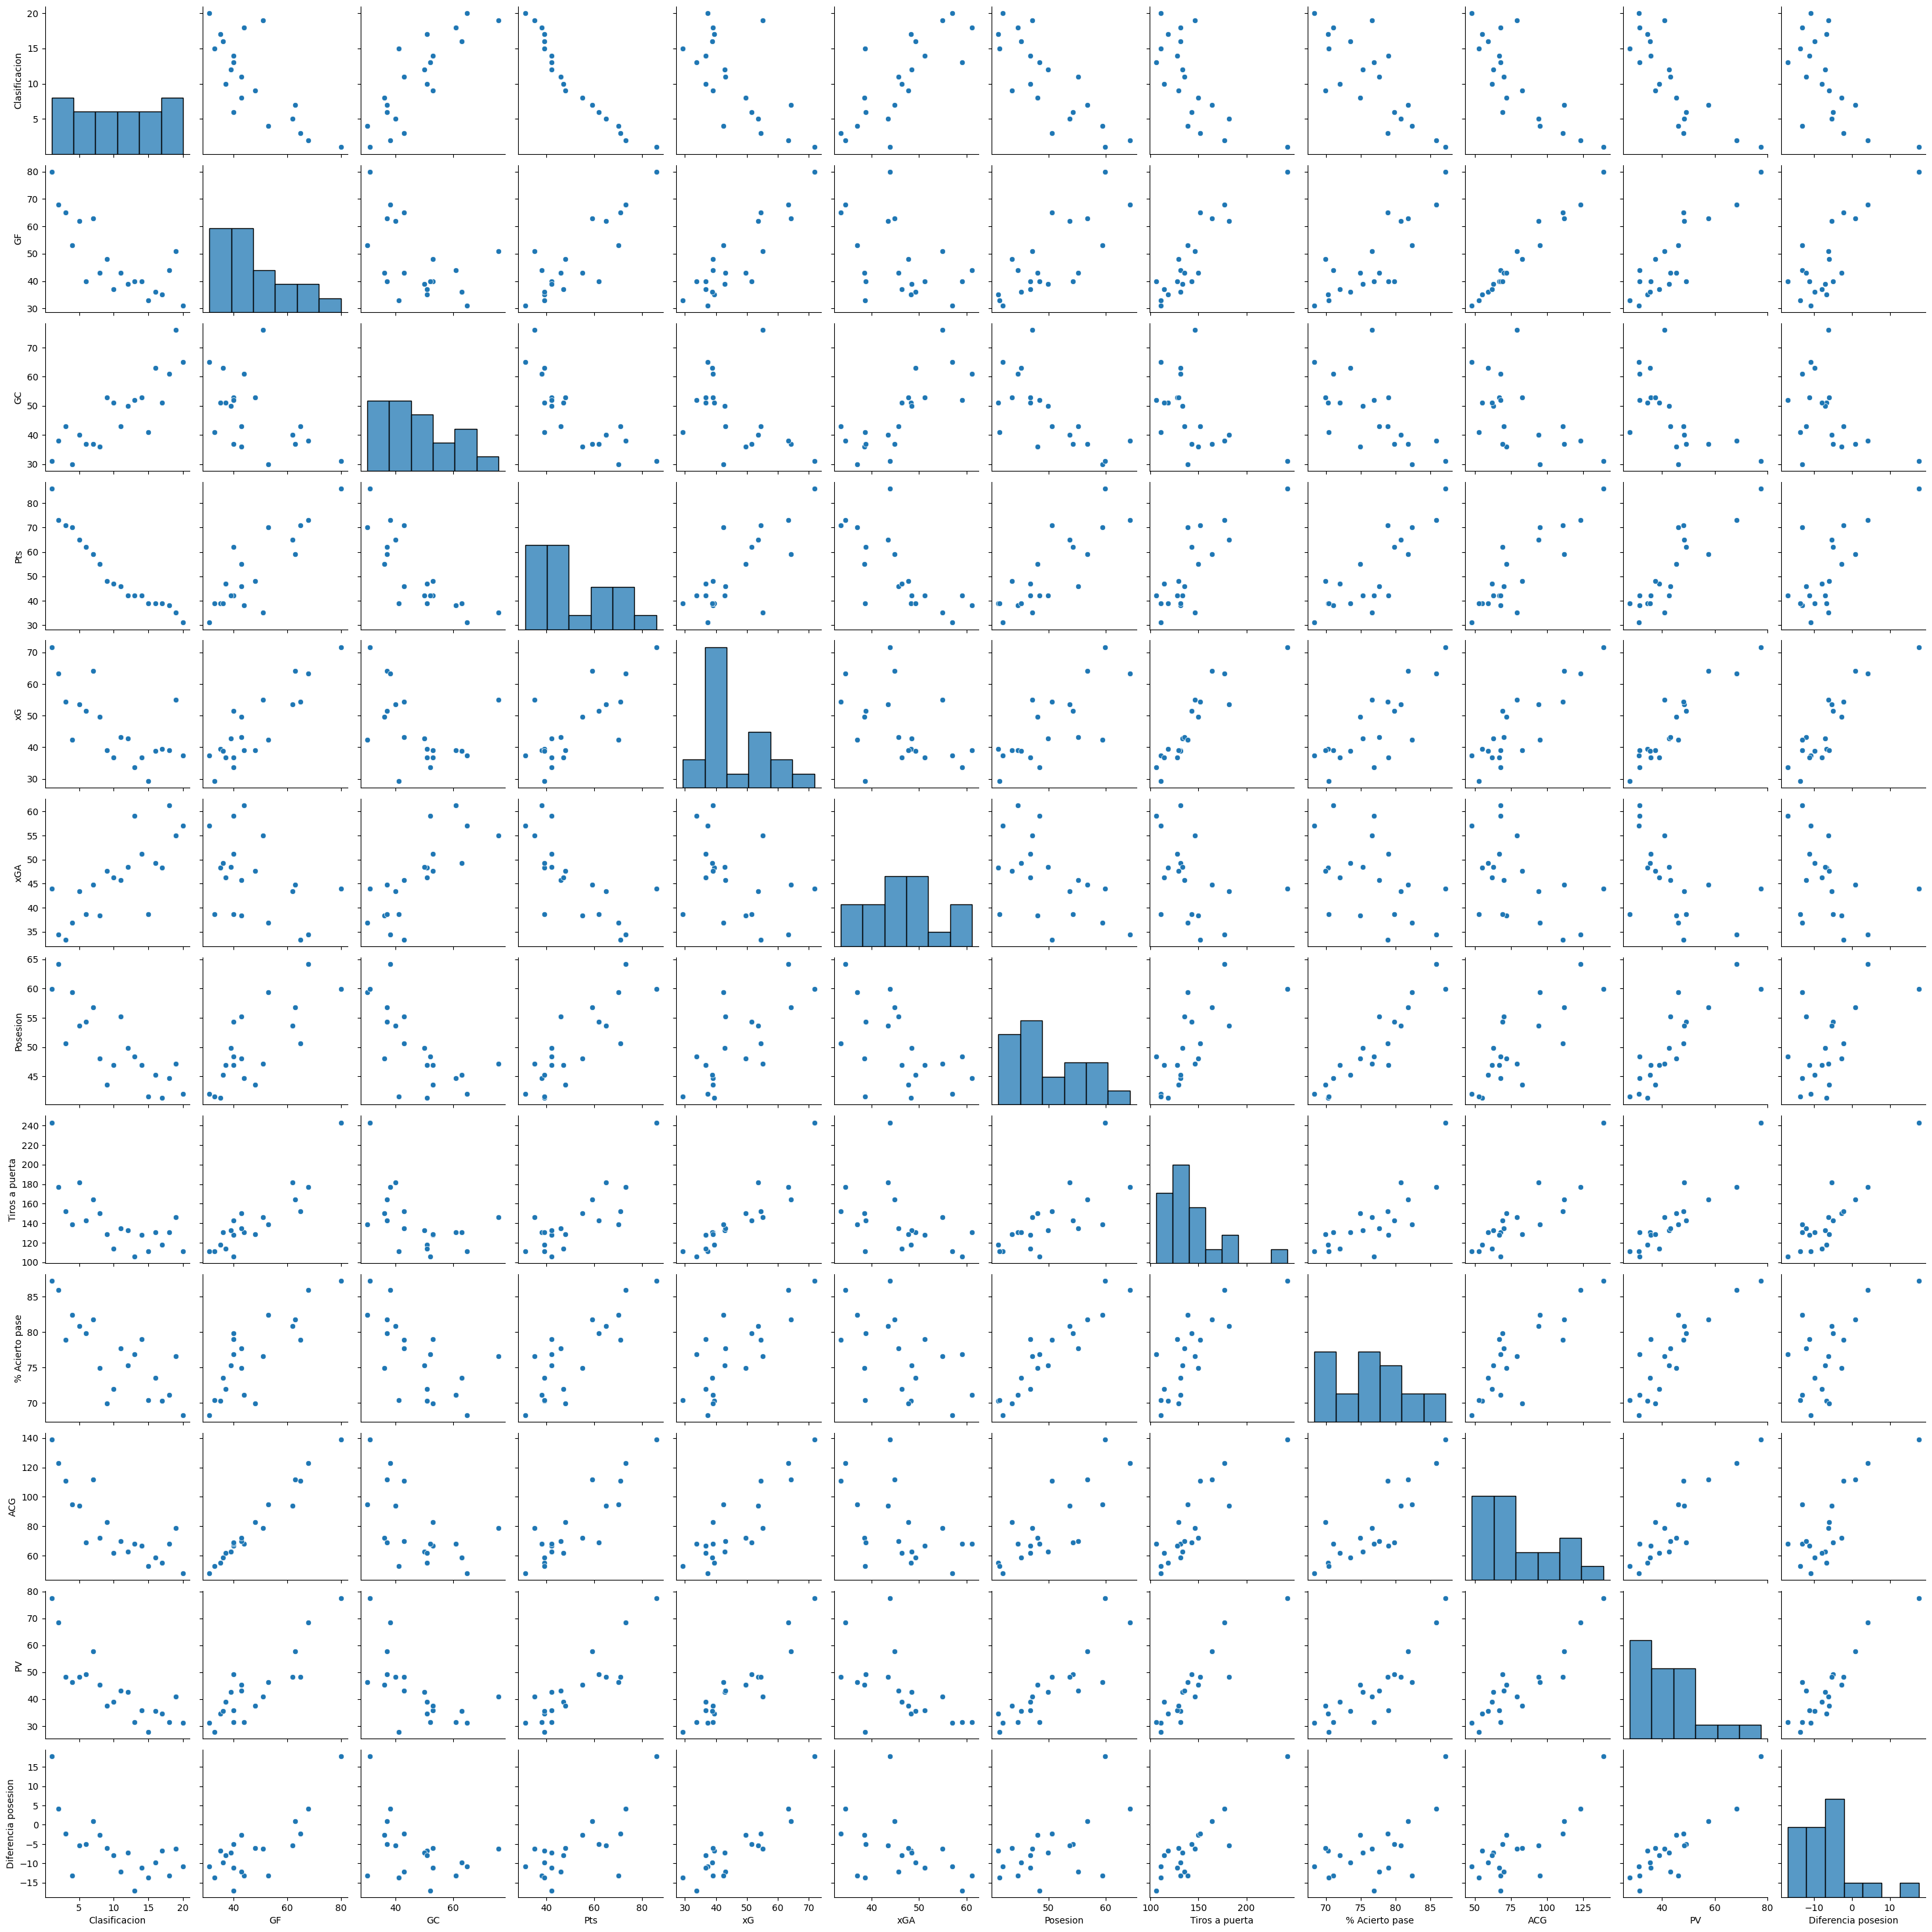

In [281]:
sns.pairplot(df_liga21)
plt.show()

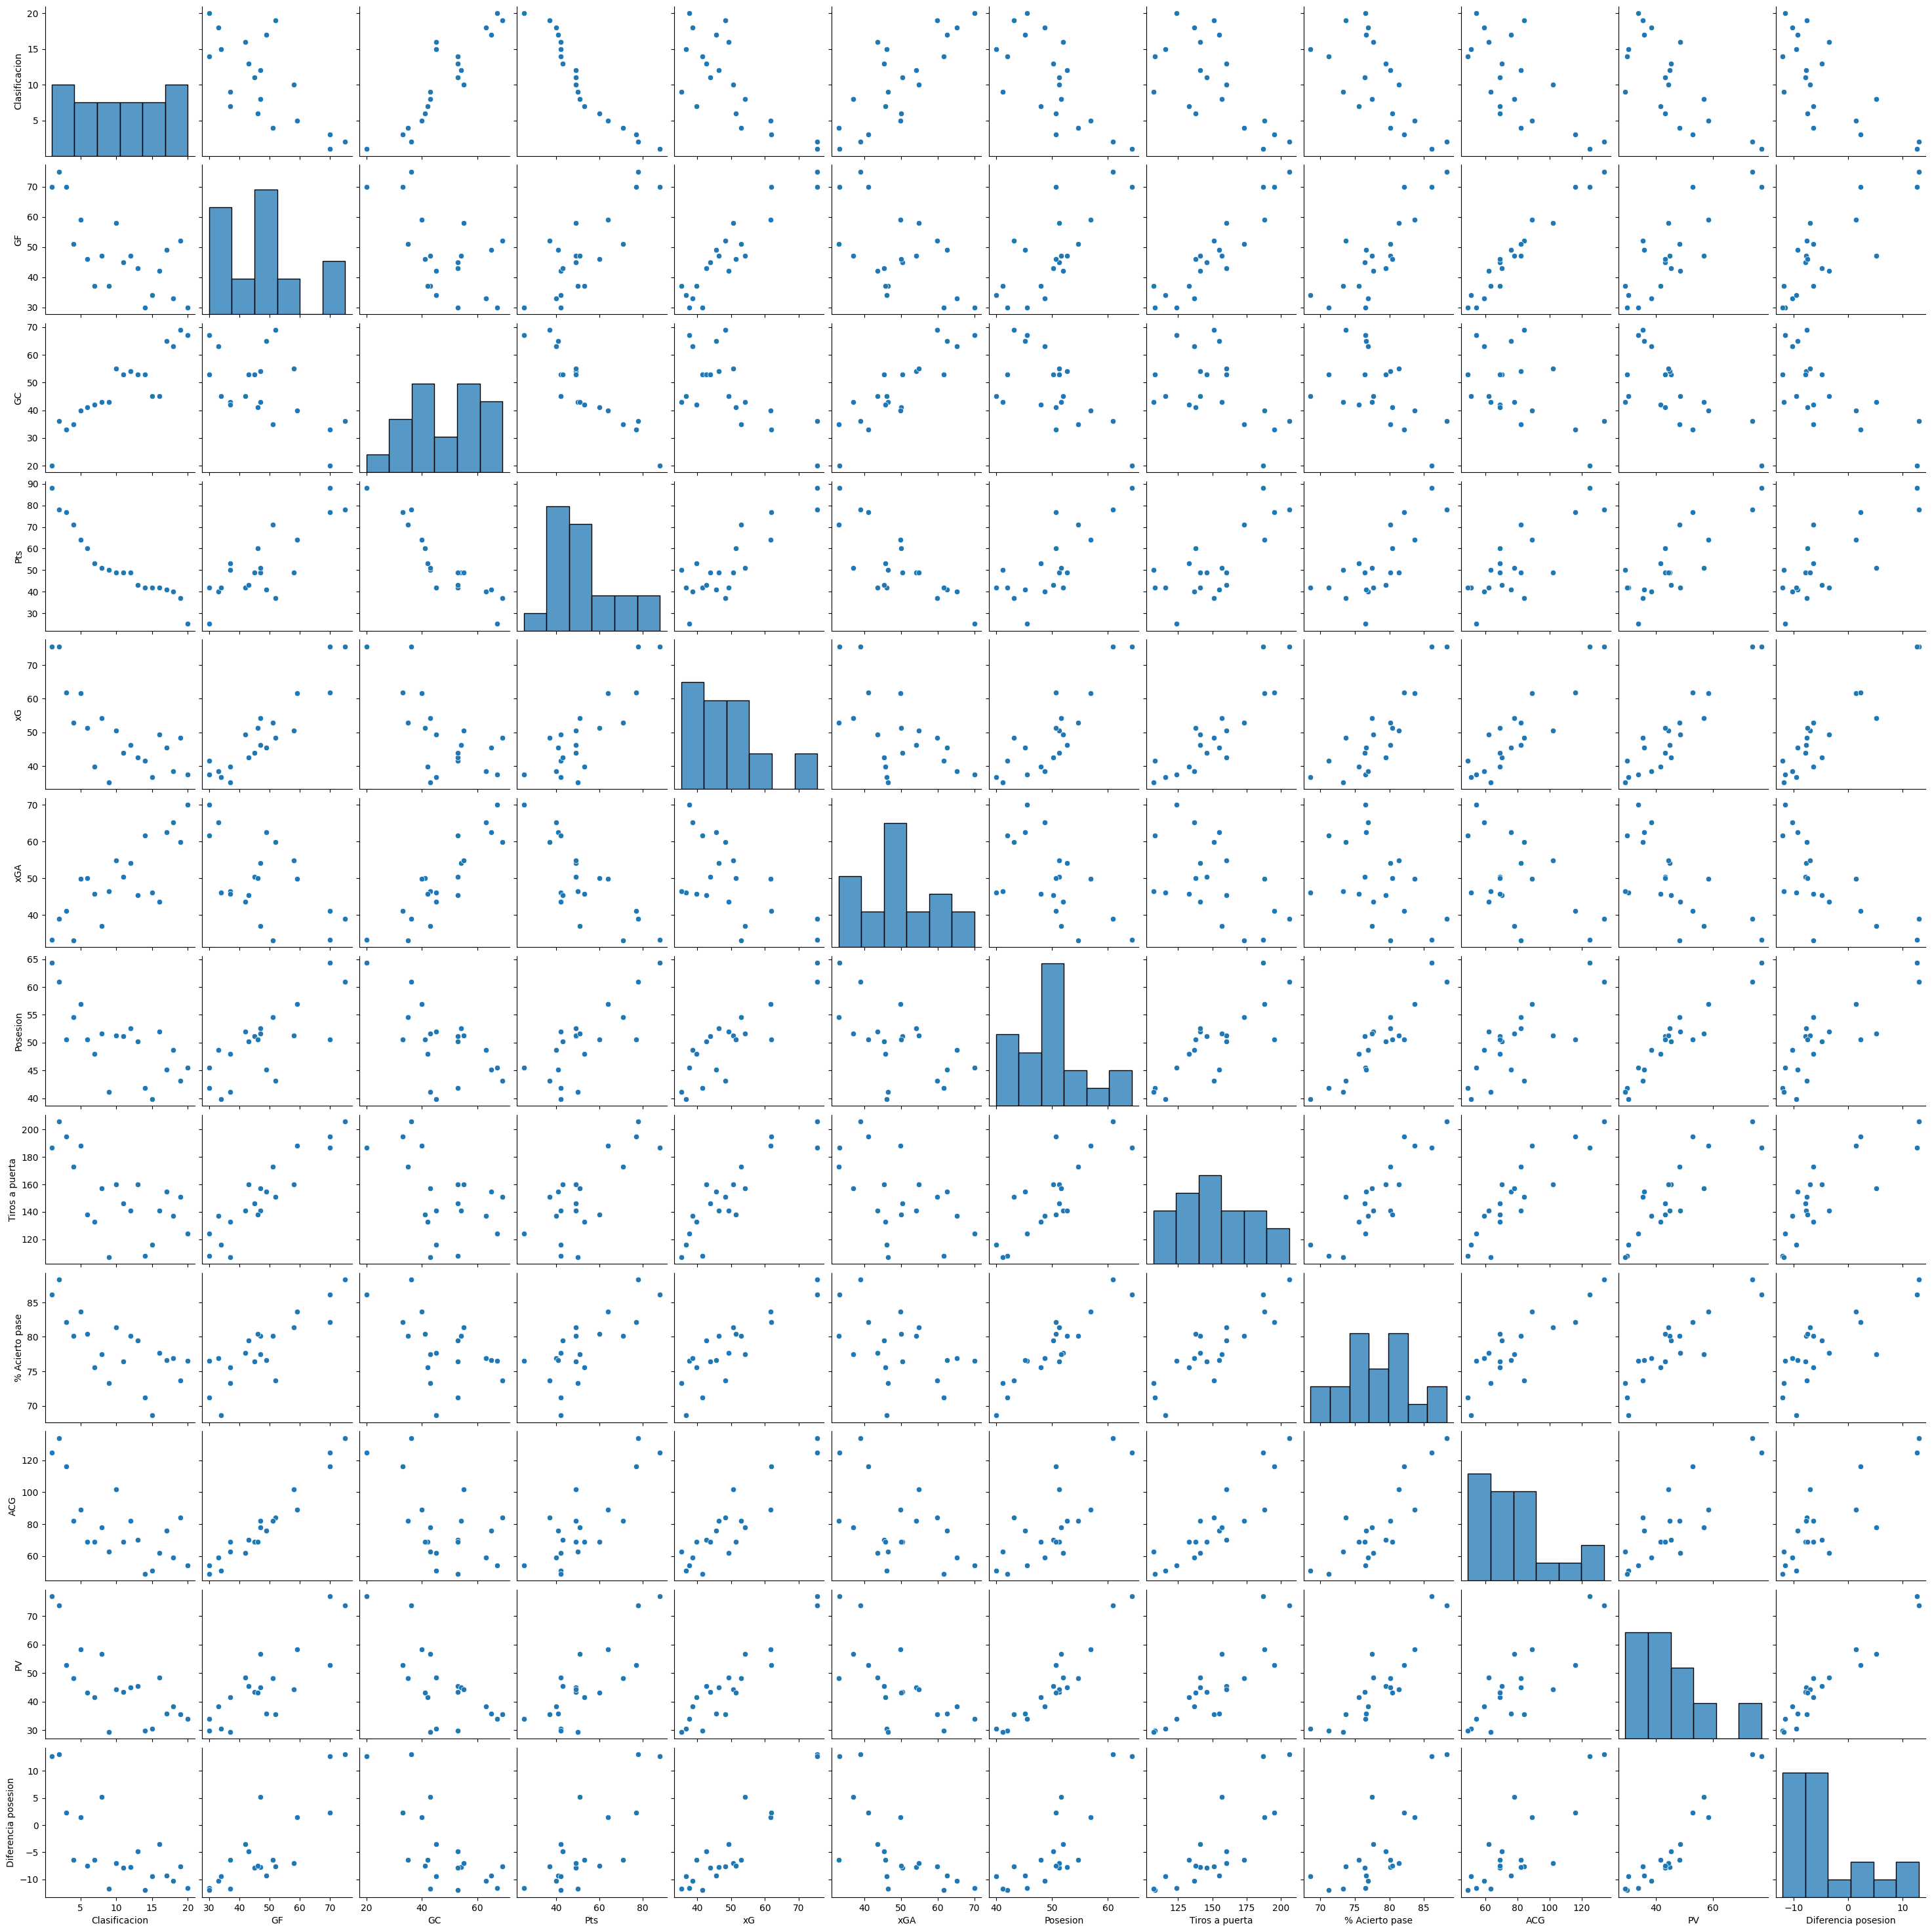

In [282]:
sns.pairplot(df_liga22)
plt.show()

In [285]:
import matplotlib.cm as cm
import numpy as np


def bubble_plot(df, col_x, col_y, col_size, team_col, color_col, scale=1000, figsize=(10, 8), text_size=8):
    sizes = (df[col_size] - df[col_size].min() + 1) / scale

    
    color_scale = cm.viridis(df[color_col] / df[color_col].max())

    plt.figure(figsize=figsize)
    plt.scatter(df[col_x], df[col_y], s=sizes, c=color_scale)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Burbujas de {col_x} vs {col_y} con Tamaño basado en {col_size}')

    for i, team in enumerate(df[team_col]):
        plt.annotate(
            team,
            (df[col_x].iloc[i], df[col_y].iloc[i]),
            textcoords='offset points',
            xytext=(0, 5),
            ha='center',
            va='bottom',
            fontsize=text_size,
        )

    line_slope, line_intercept = np.polyfit(df[col_x], df[col_y], 1)
    line_y = line_slope * df[col_x] + line_intercept
    plt.plot(df[col_x], line_y, color='black', linestyle='--', linewidth=0.5, label='Línea de regresión')
    
    plt.colorbar(label=color_col) 
    plt.show()


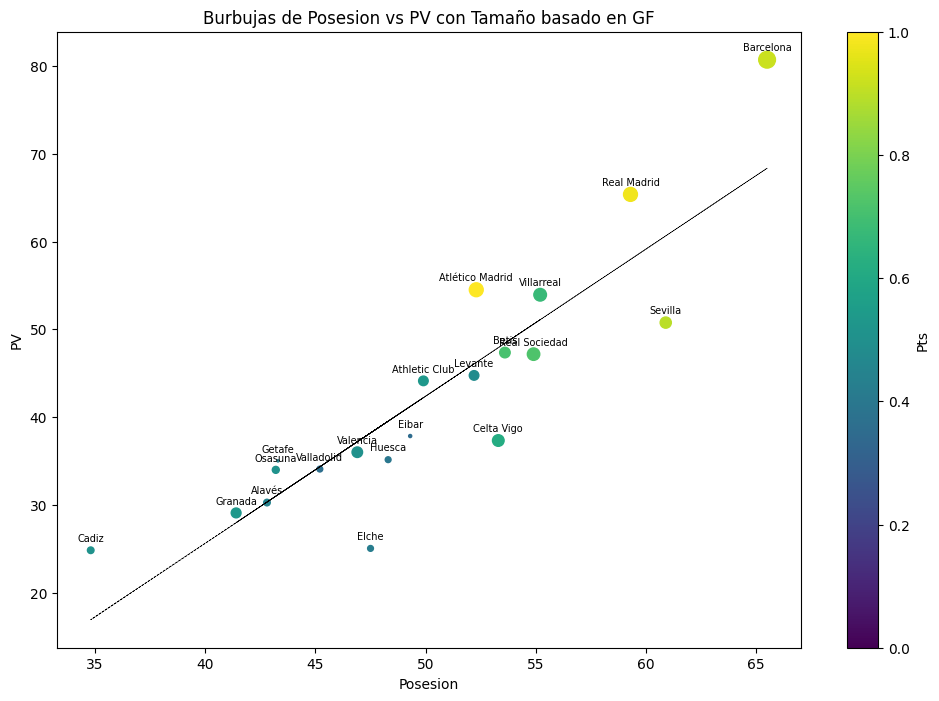

In [286]:
bubble_plot(df_liga20, 'Posesion', 'PV', 'GF', 'Equipo', 'Pts', scale=0.4, figsize=(12, 8), text_size=7)


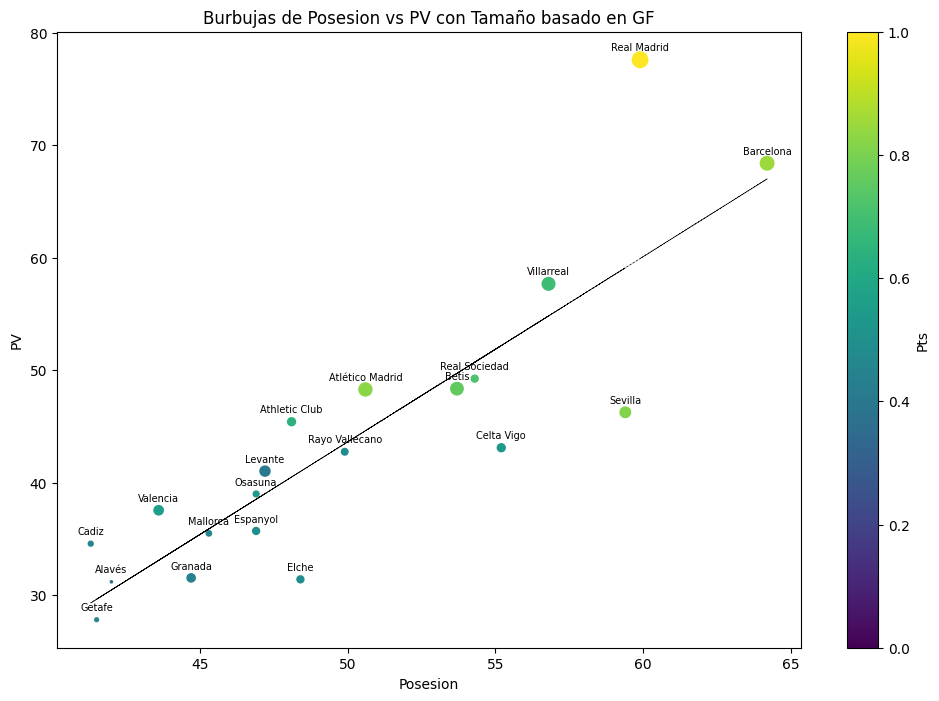

In [287]:
bubble_plot(df_liga21, 'Posesion', 'PV', 'GF', 'Equipo', 'Pts', scale=0.4, figsize=(12, 8), text_size=7)

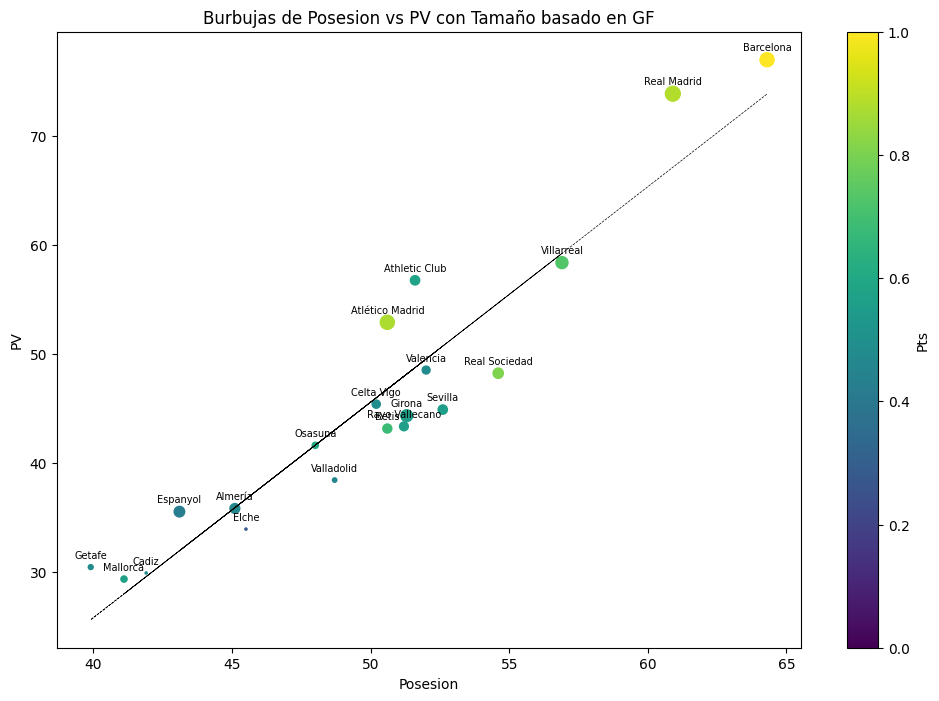

In [288]:
bubble_plot(df_liga22, 'Posesion', 'PV', 'GF', 'Equipo', 'Pts', scale=0.4, figsize=(12, 8), text_size=7)

In [289]:
df_liga20.sort_values(by='Clasificacion')

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
2               1  Atlético Madrid  67  25   86  52.8  37.1      52.3   
14              2      Real Madrid  67  28   84  61.5  37.6      59.3   
3               3        Barcelona  85  38   79  73.5  40.8      65.5   
16              4          Sevilla  53  33   77  54.4  34.8      60.9   
15              5    Real Sociedad  59  38   62  60.7  39.2      54.9   
4               6            Betis  50  50   61  49.1  46.8      53.6   
19              7       Villarreal  60  44   58  56.4  42.5      55.2   
6               8       Celta Vigo  55  57   53  50.4  51.0      53.3   
10              9          Granada  47  65   46  41.1  56.2      41.4   
1              10    Athletic Club  46  42   46  43.1  37.7      49.9   
13             11          Osasuna  37  48   44  38.7  47.8      43.2   
5              12            Cadiz  36  58   44  34.7  55.4      34.8   
17             13         Valencia  50  53   43  42.6  52.2      46.9   
12             14          Levante  46  57   41  40.4  53.4      52.2   
9              15           Getafe  28  43   38  34.4  40.3      43.3   
0              16           Alavés  36  57   38  42.6  49.9      42.8   
8              17            Elche  34  55   36  29.9  60.9      47.5   
11             18           Huesca  34  53   34  38.9  48.4      48.3   
18             19       Valladolid  34  57   31  40.1  52.9      45.2   
7              20            Eibar  29  52   30  45.2  45.7      49.3   

    Tiros a puerta  % Acierto pase  ACG     PV  Diferencia posesion  
2              178            81.0  120  54.51                 2.21  
14             167            85.6  114  65.36                 6.06  
3              231            88.4  136  80.69                15.19  
16             135            84.2   87  50.77               -10.13  
15             139            78.5  100  47.18                -7.72  
4              145            80.4   91  47.36                -6.24  
19             146            82.9   99  53.94                -1.26  
6              133            78.6   98  37.35               -15.95  
10             121            68.1   69  29.11               -12.29  
1              128            76.1   73  44.14                -5.76  
13             114            68.1   61  34.01                -9.19  
5               97            65.9   53  24.86                -9.94  
17             129            77.4   86  36.02               -10.88  
12             125            78.3   80  44.76                -7.44  
9               97            64.8   38  35.03                -8.27  
0               95            71.0   59  30.29               -12.51  
8               86            79.0   54  25.07               -22.43  
11             130            77.3   56  35.17               -13.13  
18             110            72.4   56  34.10               -11.10  
7              127            69.9   48  37.86               -11.44

In [290]:
df_liga21.sort_values(by='Clasificacion')

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
15              1      Real Madrid  80  31   86  71.7  43.9      59.9   
3               2        Barcelona  68  38   73  63.4  34.4      64.2   
2               3  Atlético Madrid  65  43   71  54.4  33.4      50.6   
17              4          Sevilla  53  30   70  42.4  36.9      59.4   
4               5            Betis  62  40   65  53.5  43.4      53.7   
16              6    Real Sociedad  40  37   62  51.5  38.7      54.3   
19              7       Villarreal  63  37   59  64.2  44.8      56.8   
1               8    Athletic Club  43  36   55  49.6  38.4      48.1   
18              9         Valencia  48  53   48  39.0  47.7      43.6   
13             10          Osasuna  37  51   47  36.7  46.3      46.9   
6              11       Celta Vigo  43  43   46  43.1  45.7      55.2   
14             12   Rayo Vallecano  39  50   42  42.8  48.4      49.9   
7              13            Elche  40  52   42  33.7  59.1      48.4   
8              14         Espanyol  40  53   42  36.7  51.2      46.9   
9              15           Getafe  33  41   39  29.3  38.6      41.5   
12             16         Mallorca  36  63   39  38.8  49.3      45.3   
5              17            Cadiz  35  51   39  39.5  48.3      41.3   
10             18          Granada  44  61   38  39.0  61.2      44.7   
11             19          Levante  51  76   35  55.1  55.0      47.2   
0              20           Alavés  31  65   31  37.3  57.0      42.0   

    Tiros a puerta  % Acierto pase  ACG     PV  Diferencia posesion  
15             243            87.2  139  77.60                17.70  
3              177            85.9  123  68.40                 4.20  
2              152            78.9  111  48.29                -2.31  
17             139            82.4   95  46.26               -13.14  
4              182            80.8   94  48.36                -5.34  
16             143            79.8   69  49.25                -5.05  
19             164            81.8  112  57.68                 0.88  
1              150            74.9   72  45.42                -2.68  
18             129            69.9   83  37.55                -6.05  
13             114            72.0   62  39.00                -7.90  
6              135            77.7   70  43.11               -12.09  
14             133            75.3   63  42.75                -7.15  
7              106            76.9   68  31.41               -16.99  
8              128            79.0   67  35.71               -11.19  
9              111            70.4   53  27.82               -13.68  
12             131            73.5   59  35.50                -9.80  
5              118            70.3   55  34.58                -6.72  
10             131            71.1   68  31.54               -13.16  
11             146            76.6   79  41.03                -6.17  
0              111            68.3   48  31.19               -10.81

In [291]:
df_liga22.sort_values(by='Clasificacion')

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
3               1        Barcelona  70  20   88  75.5  33.2      64.3   
14              2      Real Madrid  75  36   78  75.5  38.9      60.9   
2               3  Atlético Madrid  70  33   77  61.9  41.1      50.6   
15              4    Real Sociedad  51  35   71  52.9  33.0      54.6   
19              5       Villarreal  59  40   64  61.6  49.9      56.9   
4               6            Betis  46  41   60  51.3  50.0      50.6   
12              7          Osasuna  37  42   53  39.8  45.7      48.0   
1               8    Athletic Club  47  43   51  54.2  36.9      51.6   
11              9         Mallorca  37  43   50  35.2  46.4      41.1   
10             10           Girona  58  55   49  50.6  54.9      51.3   
13             11   Rayo Vallecano  45  53   49  43.9  50.3      51.2   
16             12          Sevilla  47  54   49  46.3  54.2      52.6   
6              13       Celta Vigo  43  53   43  42.6  45.4      50.2   
5              14            Cadiz  30  53   42  41.5  61.6      41.9   
9              15           Getafe  34  45   42  36.7  46.0      39.9   
17             16         Valencia  42  45   42  49.3  43.5      52.0   
0              17          Almería  49  65   41  45.5  62.5      45.1   
18             18       Valladolid  33  63   40  38.5  65.2      48.7   
8              19         Espanyol  52  69   37  48.3  59.8      43.1   
7              20            Elche  30  67   25  37.5  70.0      45.5   

    Tiros a puerta  % Acierto pase  ACG     PV  Diferencia posesion  
3              187            86.1  125  77.02                12.72  
14             206            88.3  134  73.90                13.00  
2              195            82.1  116  52.91                 2.31  
15             173            80.1   82  48.24                -6.36  
19             188            83.7   89  58.39                 1.49  
4              138            80.4   69  43.16                -7.44  
12             133            75.6   69  41.62                -6.38  
1              157            77.5   78  56.77                 5.17  
11             107            73.3   63  29.34               -11.76  
10             160            81.4  102  44.34                -6.96  
13             146            76.4   69  43.36                -7.84  
16             141            80.1   82  44.90                -7.70  
6              160            79.5   70  45.40                -4.80  
5              108            71.2   49  29.90               -12.00  
9              116            68.6   51  30.44                -9.46  
17             141            77.7   62  48.53                -3.47  
0              155            76.6   76  35.82                -9.28  
18             137            76.9   59  38.43               -10.27  
8              151            73.7   84  35.53                -7.57  
7              124            76.5   54  33.93               -11.57

In [292]:
df_liga20.to_csv('liga20.csv', index=False)

In [293]:
df_liga21.to_csv('liga21.csv', index=False)

In [294]:
df_liga22.to_csv('liga22.csv', index=False)

In [301]:
from mplsoccer.pitch import Pitch

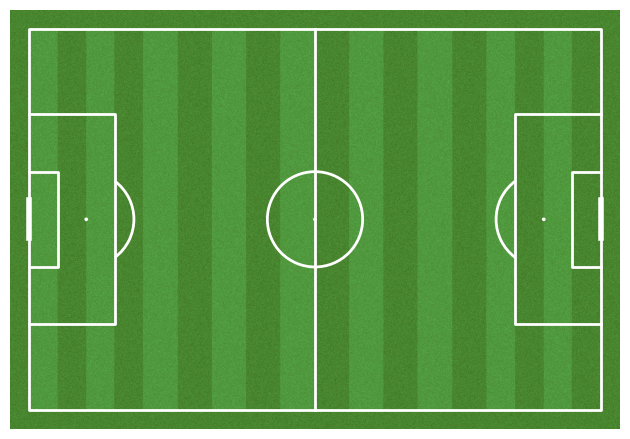

In [349]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()
plt.savefig('campo.png')

In [306]:
df_liga20.sort_values(by='Posesion', ascending=False)

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
3               3        Barcelona  85  38   79  73.5  40.8      65.5   
16              4          Sevilla  53  33   77  54.4  34.8      60.9   
14              2      Real Madrid  67  28   84  61.5  37.6      59.3   
19              7       Villarreal  60  44   58  56.4  42.5      55.2   
15              5    Real Sociedad  59  38   62  60.7  39.2      54.9   
4               6            Betis  50  50   61  49.1  46.8      53.6   
6               8       Celta Vigo  55  57   53  50.4  51.0      53.3   
2               1  Atlético Madrid  67  25   86  52.8  37.1      52.3   
12             14          Levante  46  57   41  40.4  53.4      52.2   
1              10    Athletic Club  46  42   46  43.1  37.7      49.9   
7              20            Eibar  29  52   30  45.2  45.7      49.3   
11             18           Huesca  34  53   34  38.9  48.4      48.3   
8              17            Elche  34  55   36  29.9  60.9      47.5   
17             13         Valencia  50  53   43  42.6  52.2      46.9   
18             19       Valladolid  34  57   31  40.1  52.9      45.2   
9              15           Getafe  28  43   38  34.4  40.3      43.3   
13             11          Osasuna  37  48   44  38.7  47.8      43.2   
0              16           Alavés  36  57   38  42.6  49.9      42.8   
10              9          Granada  47  65   46  41.1  56.2      41.4   
5              12            Cadiz  36  58   44  34.7  55.4      34.8   

    Tiros a puerta  % Acierto pase  ACG     PV  Diferencia posesion  
3              231            88.4  136  80.69                15.19  
16             135            84.2   87  50.77               -10.13  
14             167            85.6  114  65.36                 6.06  
19             146            82.9   99  53.94                -1.26  
15             139            78.5  100  47.18                -7.72  
4              145            80.4   91  47.36                -6.24  
6              133            78.6   98  37.35               -15.95  
2              178            81.0  120  54.51                 2.21  
12             125            78.3   80  44.76                -7.44  
1              128            76.1   73  44.14                -5.76  
7              127            69.9   48  37.86               -11.44  
11             130            77.3   56  35.17               -13.13  
8               86            79.0   54  25.07               -22.43  
17             129            77.4   86  36.02               -10.88  
18             110            72.4   56  34.10               -11.10  
9               97            64.8   38  35.03                -8.27  
13             114            68.1   61  34.01                -9.19  
0               95            71.0   59  30.29               -12.51  
10             121            68.1   69  29.11               -12.29  
5               97            65.9   53  24.86                -9.94

In [307]:
df_liga21.sort_values(by='Posesion', ascending=False)

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
3               2        Barcelona  68  38   73  63.4  34.4      64.2   
15              1      Real Madrid  80  31   86  71.7  43.9      59.9   
17              4          Sevilla  53  30   70  42.4  36.9      59.4   
19              7       Villarreal  63  37   59  64.2  44.8      56.8   
6              11       Celta Vigo  43  43   46  43.1  45.7      55.2   
16              6    Real Sociedad  40  37   62  51.5  38.7      54.3   
4               5            Betis  62  40   65  53.5  43.4      53.7   
2               3  Atlético Madrid  65  43   71  54.4  33.4      50.6   
14             12   Rayo Vallecano  39  50   42  42.8  48.4      49.9   
7              13            Elche  40  52   42  33.7  59.1      48.4   
1               8    Athletic Club  43  36   55  49.6  38.4      48.1   
11             19          Levante  51  76   35  55.1  55.0      47.2   
13             10          Osasuna  37  51   47  36.7  46.3      46.9   
8              14         Espanyol  40  53   42  36.7  51.2      46.9   
12             16         Mallorca  36  63   39  38.8  49.3      45.3   
10             18          Granada  44  61   38  39.0  61.2      44.7   
18              9         Valencia  48  53   48  39.0  47.7      43.6   
0              20           Alavés  31  65   31  37.3  57.0      42.0   
9              15           Getafe  33  41   39  29.3  38.6      41.5   
5              17            Cadiz  35  51   39  39.5  48.3      41.3   

    Tiros a puerta  % Acierto pase  ACG     PV  Diferencia posesion  
3              177            85.9  123  68.40                 4.20  
15             243            87.2  139  77.60                17.70  
17             139            82.4   95  46.26               -13.14  
19             164            81.8  112  57.68                 0.88  
6              135            77.7   70  43.11               -12.09  
16             143            79.8   69  49.25                -5.05  
4              182            80.8   94  48.36                -5.34  
2              152            78.9  111  48.29                -2.31  
14             133            75.3   63  42.75                -7.15  
7              106            76.9   68  31.41               -16.99  
1              150            74.9   72  45.42                -2.68  
11             146            76.6   79  41.03                -6.17  
13             114            72.0   62  39.00                -7.90  
8              128            79.0   67  35.71               -11.19  
12             131            73.5   59  35.50                -9.80  
10             131            71.1   68  31.54               -13.16  
18             129            69.9   83  37.55                -6.05  
0              111            68.3   48  31.19               -10.81  
9              111            70.4   53  27.82               -13.68  
5              118            70.3   55  34.58                -6.72

In [310]:
df_liga22.sort_values(by='PV', ascending=False)

Clasificacion           Equipo  GF  GC  Pts    xG   xGA  Posesion  \
3               1        Barcelona  70  20   88  75.5  33.2      64.3   
14              2      Real Madrid  75  36   78  75.5  38.9      60.9   
19              5       Villarreal  59  40   64  61.6  49.9      56.9   
1               8    Athletic Club  47  43   51  54.2  36.9      51.6   
2               3  Atlético Madrid  70  33   77  61.9  41.1      50.6   
17             16         Valencia  42  45   42  49.3  43.5      52.0   
15              4    Real Sociedad  51  35   71  52.9  33.0      54.6   
6              13       Celta Vigo  43  53   43  42.6  45.4      50.2   
16             12          Sevilla  47  54   49  46.3  54.2      52.6   
10             10           Girona  58  55   49  50.6  54.9      51.3   
13             11   Rayo Vallecano  45  53   49  43.9  50.3      51.2   
4               6            Betis  46  41   60  51.3  50.0      50.6   
12              7          Osasuna  37  42   53  39.8  45.7      48.0   
18             18       Valladolid  33  63   40  38.5  65.2      48.7   
0              17          Almería  49  65   41  45.5  62.5      45.1   
8              19         Espanyol  52  69   37  48.3  59.8      43.1   
7              20            Elche  30  67   25  37.5  70.0      45.5   
9              15           Getafe  34  45   42  36.7  46.0      39.9   
5              14            Cadiz  30  53   42  41.5  61.6      41.9   
11              9         Mallorca  37  43   50  35.2  46.4      41.1   

    Tiros a puerta  % Acierto pase  ACG     PV  Diferencia posesion  
3              187            86.1  125  77.02                12.72  
14             206            88.3  134  73.90                13.00  
19             188            83.7   89  58.39                 1.49  
1              157            77.5   78  56.77                 5.17  
2              195            82.1  116  52.91                 2.31  
17             141            77.7   62  48.53                -3.47  
15             173            80.1   82  48.24                -6.36  
6              160            79.5   70  45.40                -4.80  
16             141            80.1   82  44.90                -7.70  
10             160            81.4  102  44.34                -6.96  
13             146            76.4   69  43.36                -7.84  
4              138            80.4   69  43.16                -7.44  
12             133            75.6   69  41.62                -6.38  
18             137            76.9   59  38.43               -10.27  
0              155            76.6   76  35.82                -9.28  
8              151            73.7   84  35.53                -7.57  
7              124            76.5   54  33.93               -11.57  
9              116            68.6   51  30.44                -9.46  
5              108            71.2   49  29.90               -12.00  
11             107            73.3   63  29.34               -11.76

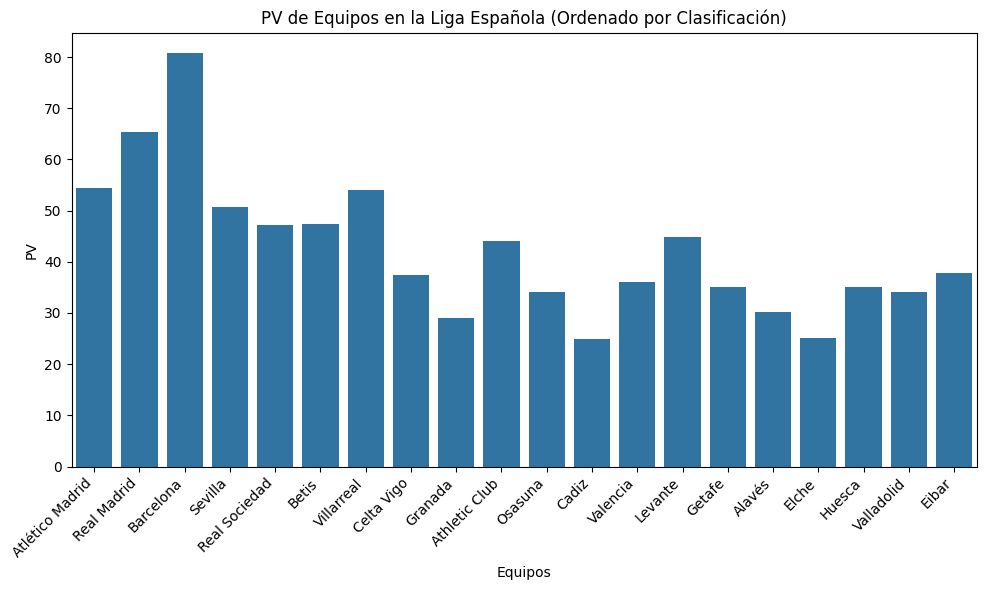

In [331]:
df_liga20_sorted = df_liga20.sort_values('Clasificacion')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Equipo', y='PV', data=df_liga20_sorted)
plt.ylabel('PV')
plt.xlabel('Equipos')
plt.title('PV de Equipos en la Liga Española (Ordenado por Clasificación)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.savefig('posesion_liga20.png')
plt.show()

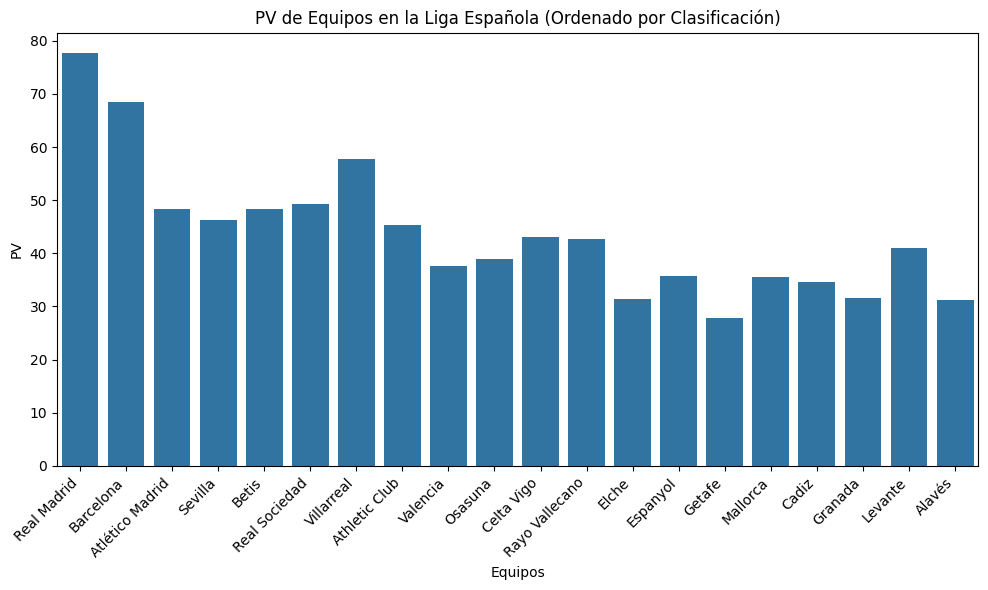

In [332]:
df_liga21_sorted = df_liga21.sort_values('Clasificacion')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Equipo', y='PV', data=df_liga21_sorted)
plt.xlabel('Equipos')
plt.ylabel('PV')
plt.title('PV de Equipos en la Liga Española (Ordenado por Clasificación)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.savefig('posesion_liga21.png')
plt.show()

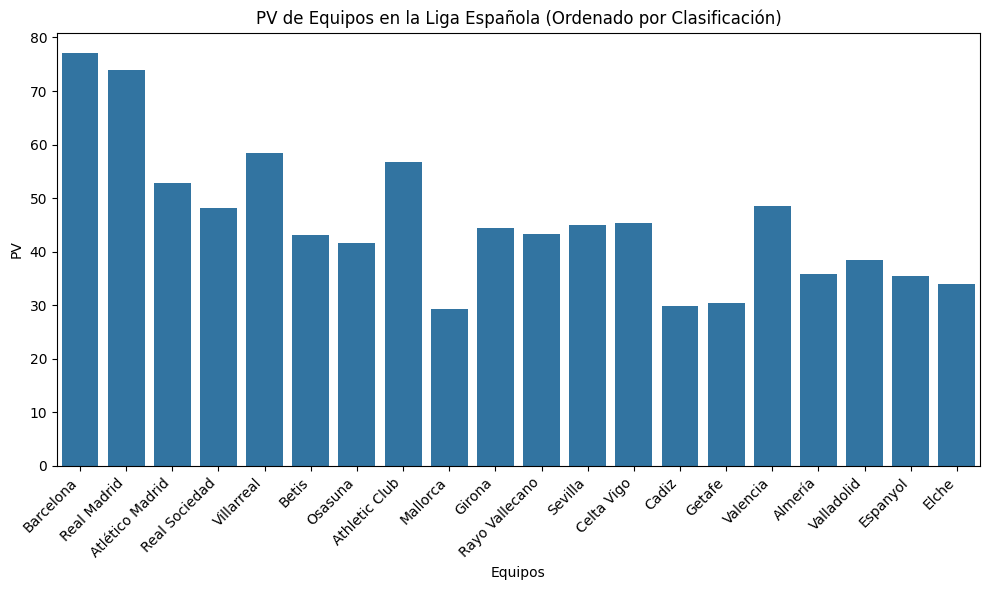

In [333]:
df_liga22_sorted = df_liga22.sort_values('Clasificacion')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Equipo', y='PV', data=df_liga22_sorted)
plt.xlabel('Equipos')
plt.ylabel('PV')
plt.title('PV de Equipos en la Liga Española (Ordenado por Clasificación)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.savefig('posesion_liga22.png')
plt.show()

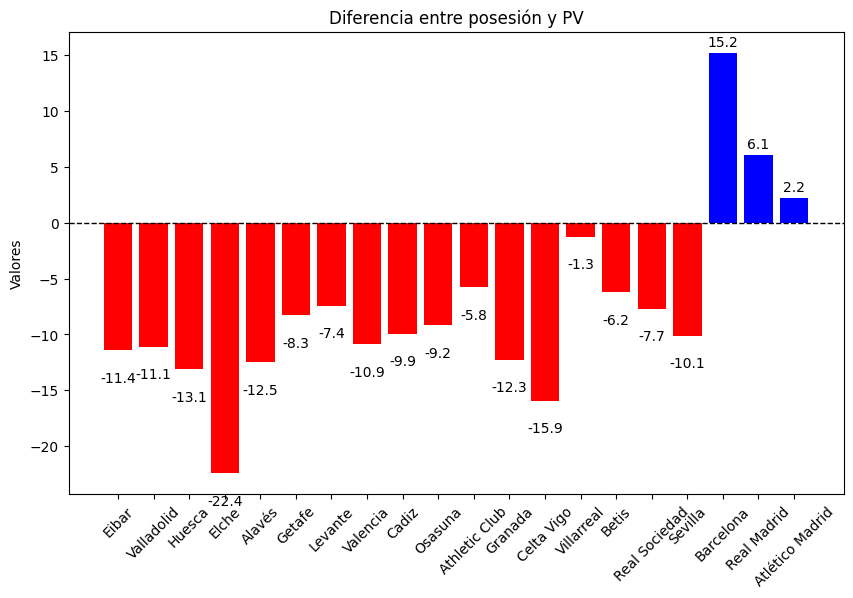

In [343]:
fig, ax = plt.subplots(figsize=(10, 6))

colores = ['red' if valor < 0 else 'blue' for valor in df_liga20['Diferencia posesion']]

bars = ax.bar(df_liga20.Equipo, df_liga20['Diferencia posesion'], color=colores)

ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

ax.set_ylabel('Valores')
ax.set_title('Diferencia entre posesión y PV')


for bar, valor in zip(bars, df_liga20['Diferencia posesion']):
    height = bar.get_height()
    ax.annotate(f'{valor:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3) if valor >= 0 else (0, -15),
                textcoords='offset points', ha='center', va='bottom' if valor >= 0 else 'top')
plt.xticks(rotation=45)
plt.savefig('diferencia_liga20.png')
plt.show()

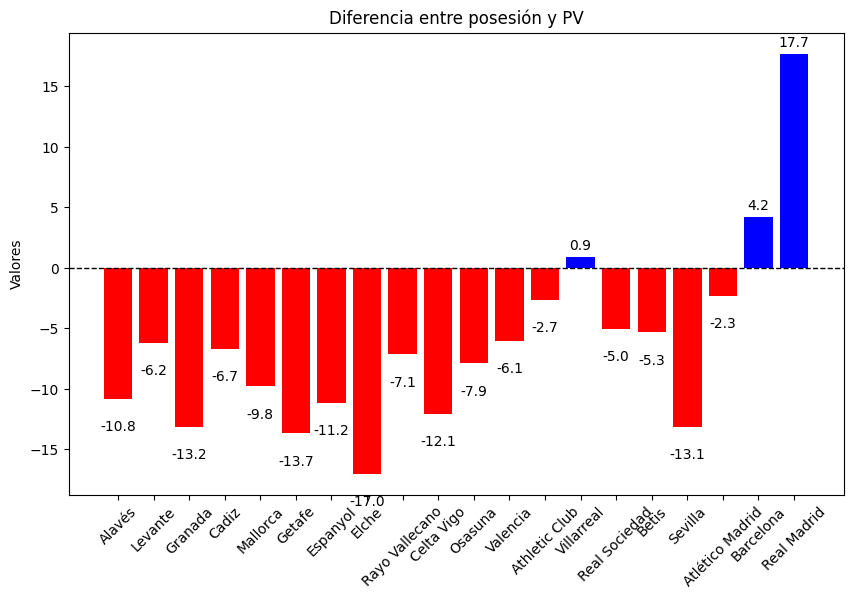

In [344]:
fig, ax = plt.subplots(figsize=(10, 6))

colores = ['red' if valor < 0 else 'blue' for valor in df_liga21['Diferencia posesion']]

bars = ax.bar(df_liga21.Equipo, df_liga21['Diferencia posesion'], color=colores)

ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

ax.set_ylabel('Valores')
ax.set_title('Diferencia entre posesión y PV')


for bar, valor in zip(bars, df_liga21['Diferencia posesion']):
    height = bar.get_height()
    ax.annotate(f'{valor:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3) if valor >= 0 else (0, -15),
                textcoords='offset points', ha='center', va='bottom' if valor >= 0 else 'top')
plt.xticks(rotation=45)
plt.savefig('diferencia_liga21.png')
plt.show()

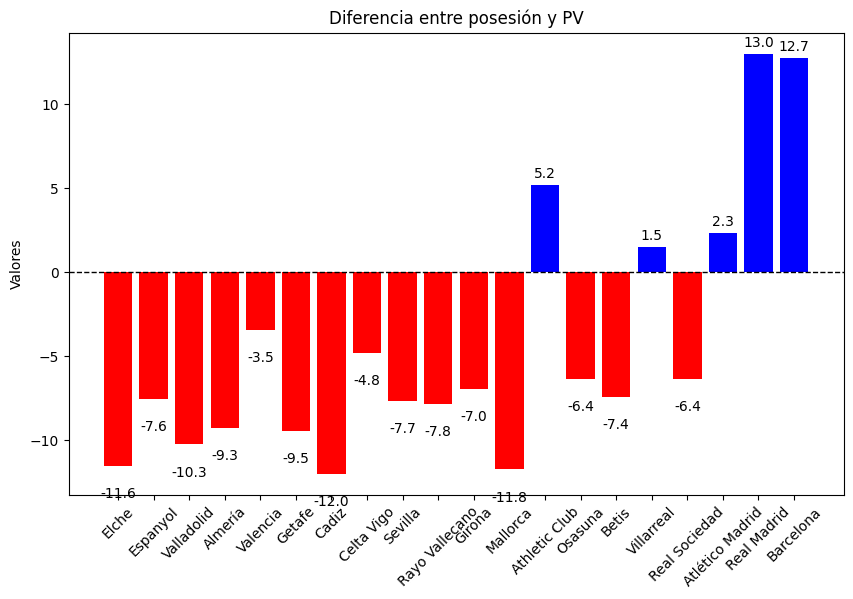

In [347]:
fig, ax = plt.subplots(figsize=(10, 6))

colores = ['red' if valor < 0 else 'blue' for valor in df_liga22['Diferencia posesion']]

bars = ax.bar(df_liga22.Equipo, df_liga22['Diferencia posesion'], color=colores)

ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

ax.set_ylabel('Valores')
ax.set_title('Diferencia entre posesión y PV')


for bar, valor in zip(bars, df_liga22['Diferencia posesion']):
    height = bar.get_height()
    ax.annotate(f'{valor:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3) if valor >= 0 else (0, -15),
                textcoords='offset points', ha='center', va='bottom' if valor >= 0 else 'top')
plt.xticks(rotation=45)
plt.savefig('diferencia_liga22.png')
plt.show()